# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
-  **The problem of customer segmentation is important to solve for marketers as it can lead to a significant growth in revenue by enabling personalized communication and offerings to individual customers.**

### **The objective:**

 - What is the intended goal?
- **The intended goal is to analyze customer engagement metrics and marketing activities data to create the best possible customer segments that optimize ROI.**

### **The key questions:**

- What are the key questions that need to be answered?
1. **What are the customer profiles and how can they be defined?**
2. **What metrics to use for customer segmentation?**
3. **How to determine the optimal number of segments?**

### **The problem formulation**:

- What is it that we are trying to solve using data science?
- **Using data science techniques, the objective is to segment customers based on their profiles and enable personalized communication and offerings to individual customers.**


Return on Investment (ROI) is a critical metric for evaluating the effectiveness of marketing campaigns and other business initiatives. By segmenting customers based on their engagement metrics and marketing activities data, businesses can optimize their ROI by targeting the right customers with tailored marketing strategies.

In this analysis, we compare various clustering methods for segmenting users based on their characteristics and purchasing behavior. We have considered the following clustering methods: K-means, t-SNE, K-medoids, and GMM.

**Main Findings**

Based on the comparison of all methods, we can observe that the clusters derived from each method have similar characteristics:

1. K-means and t-SNE produce almost identical cluster profiles.
2. K-medoids and GMM generate clusters with slightly different family structures.

However, the general trend among all methods is that they divide customers into three segments:

1. **High-income customers** with fewer kids and teens, high spending on products, and more accepted offers.
2. **Moderate-income customers** with more teens at home and lower spending on products.
3. **Low-income customers** with more kids at home, the lowest spending on products, and the least number of accepted offers.

The choice of the best method for this dataset would depend on the specific goals of the analysis and the preference for the characteristics of the resulting clusters. Overall, K-means and t-SNE provide very similar results, while K-medoids and GMM might offer a more nuanced view of the customers' family structures.

___________________________________________________________________________________________________________________

It is important to note that t-SNE is a stochastic method, which means that it can produce different results each time it is run. This variability can make it challenging to reproduce and validate the results consistently. Additionally, t-SNE is more computationally intensive than other methods like K-means, which can be a concern when working with larger datasets. Moreover, t-SNE is primarily a visualization technique and is not specifically designed for clustering, so it may not always yield the most accurate or meaningful groupings of data points.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [196]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
data = pd.read_csv("marketing_campaign+%284%29.csv")

In [3]:
learn = data.copy()

In [4]:
data.shape

(2240, 27)

In [5]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

**Since there are only 1% of rows with missing values, it makes sense to remove them.**

In [8]:
# Drop rows with missing values
data = data.dropna()

# Display the updated dataset
print(data.head())

# Check the remaining number of rows
print(f"Remaining rows: {data.shape[0]}")

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

In [9]:
data.duplicated().sum()

0

In [10]:
data.ID.nunique()

2216

#### Observations: 
- **The initial dataset contained 2240 rows and 27 columns, with missing values in the "Income" column. The missing values were dropped, resulting in a dataset with 2216 rows and 27 columns. There were no duplicated rows in the dataset. The "ID" column had 2216 unique values, indicating that each row corresponds to a unique customer.**

**All ID are unique.**
**As all entries are unique, it would not add value to our analysis. We can drop the "ID" column.**

In [11]:
# Dropping the "ID" column
data.drop(columns = "ID", inplace = True)

**To speed up the analysis, we create new variables that contain only numerical and categorical features from the original data. This will allow us to perform further data analysis more quickly, as we reduce the number of features that need to be considered.**

In [12]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)
print(cat_col)

['Education', 'Marital_Status', 'Dt_Customer']


In [13]:
# Making a list of all categorical variables
num_col = list(data.select_dtypes(include=["int64", "float64"]).columns)
print(num_col)

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


### Observations and Insights from the Data overview: 
- **The dataset contains 22 columns and 2240 rows.**
- **The dataset has some missing values in the "Income" column, with a total of 24 missing values.**
- **There are no duplicate records in the dataset.**
- **The "ID" column is unique for each record, indicating that it can be used as a primary key.**
- **The "Year_Birth" column contains the birth year of the customers, which can be used to calculate the age of the customers.**
- **The "Education" and "Marital_Status" columns contain categorical data, which can be used for further analysis.**
- **The "Income" column contains continuous data, which can be used for further analysis.**
- **The dataset contains columns that represent the customers' purchasing behavior, such as the amount spent on wines, fruits, meat products, fish products, sweet products, and gold products, as well as the number of purchases made through different channels (e.g., web, catalog, store).**
- **The dataset also contains columns that represent the customers' response to different marketing campaigns, such as the acceptance of offers for different campaigns and the number of complaints made.**
- **The dataset can be further analyzed to gain insights into the customers' behavior, preferences, and response to marketing campaigns, which can help the marketing team in optimizing the ROI.**

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

In [14]:
data.describe().T

count          mean           std     min      25%  \
Year_Birth           2216.0   1968.820397     11.985554  1893.0   1959.0   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.0   
Kidhome              2216.0      0.441787      0.536896     0.0      0.0   
Teenhome             2216.0      0.505415      0.544181     0.0      0.0   
Recency              2216.0     49.012635     28.948352     0.0     24.0   
MntWines             2216.0    305.091606    337.327920     0.0     24.0   
MntFruits            2216.0     26.356047     39.793917     0.0      2.0   
MntMeatProducts      2216.0    166.995939    224.283273     0.0     16.0   
MntFishProducts      2216.0     37.637635     54.752082     0.0      3.0   
MntSweetProducts     2216.0     27.028881     41.072046     0.0      1.0   
MntGoldProds         2216.0     43.965253     51.815414     0.0      9.0   
NumDealsPurchases    2216.0      2.323556      1.923716     0.0      1.0   
NumWebPurchases      2216.0      4.085289      2.740951     0.0      2.0   
NumCatalogPurchases  2216.0      2.671029      2.926734     0.0      0.0   
NumStorePurchases    2216.0      5.800993      3.250785     0.0      3.0   
NumWebVisitsMonth    2216.0      5.319043      2.425359     0.0      3.0   
AcceptedCmp3         2216.0      0.073556      0.261106     0.0      0.0   
AcceptedCmp4         2216.0      0.074007      0.261842     0.0      0.0   
AcceptedCmp5         2216.0      0.073105      0.260367     0.0      0.0   
AcceptedCmp1         2216.0      0.064079      0.244950     0.0      0.0   
AcceptedCmp2         2216.0      0.013087      0.113672     0.0      0.0   
Complain             2216.0      0.009477      0.096907     0.0      0.0   
Response             2216.0      0.150271      0.357417     0.0      0.0   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               174.5    505.00    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         68.0    232.25    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     262.0  
MntGoldProds            24.5     56.00     321.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0

- **The mean age of the customers in the dataset is 52 years with a standard deviation of 12 years. The average income of customers is 52,247 USD with a standard deviation of 25,173 USD.**

- **On average, customers have 0.44 children and 0.51 teenagers in the household. The customers made purchases recently with an average recency of 49 days. Customers have made purchases in all categories with the highest average spending on wines (305USD) and the lowest on fruits (26USD).**

- **Customers have made purchases through multiple channels with an average of 2.3 deals, 4.1 web purchases, 2.7 catalog purchases, and 5.8 store purchases. Customers visit the website an average of 5.3 times per month.**

- **Only a small percentage of customers responded to marketing campaigns (acceptedcmp1: 6.4%, acceptedcmp2: 1.3%, acceptedcmp3: 7.4%, acceptedcmp4: 7.4%, acceptedcmp5: 7.3%). Only 0.9% of customers made a complaint.**

# Univariate Analysis on Numerical and Categorical data

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables. 

## Plot histogram and box plot for different numerical features and understand how the data looks like.

Year_Birth
Skew : -0.35


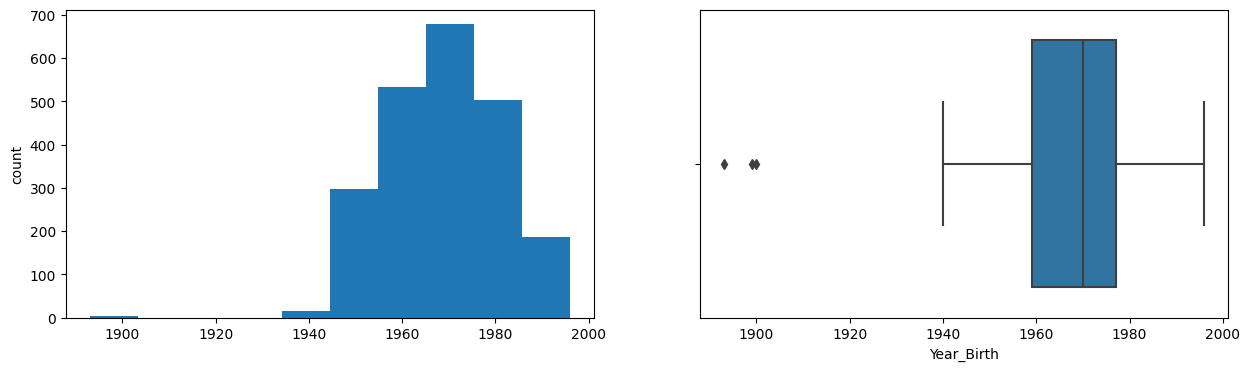

Income
Skew : 6.76


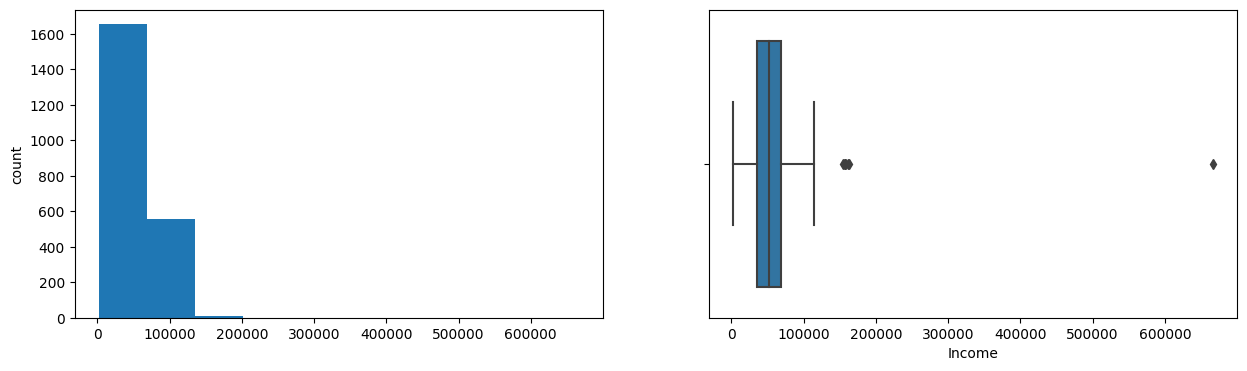

Kidhome
Skew : 0.64


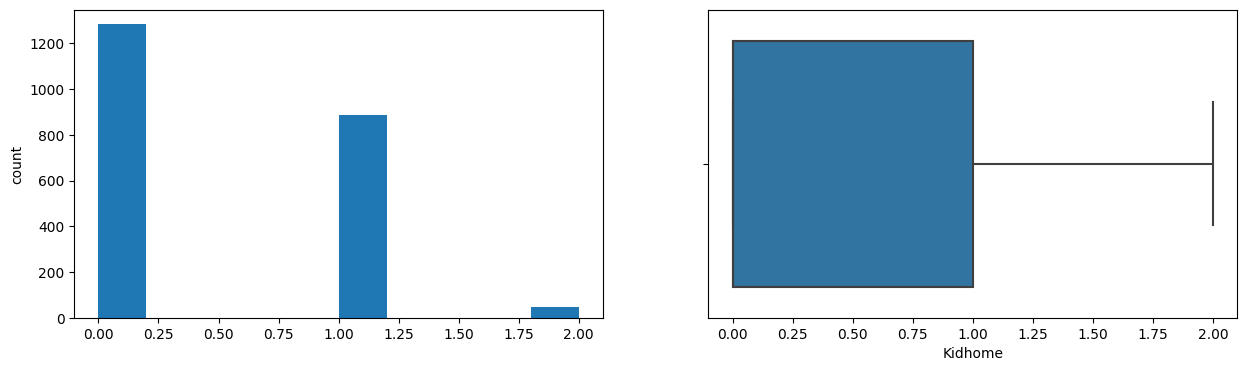

Teenhome
Skew : 0.41


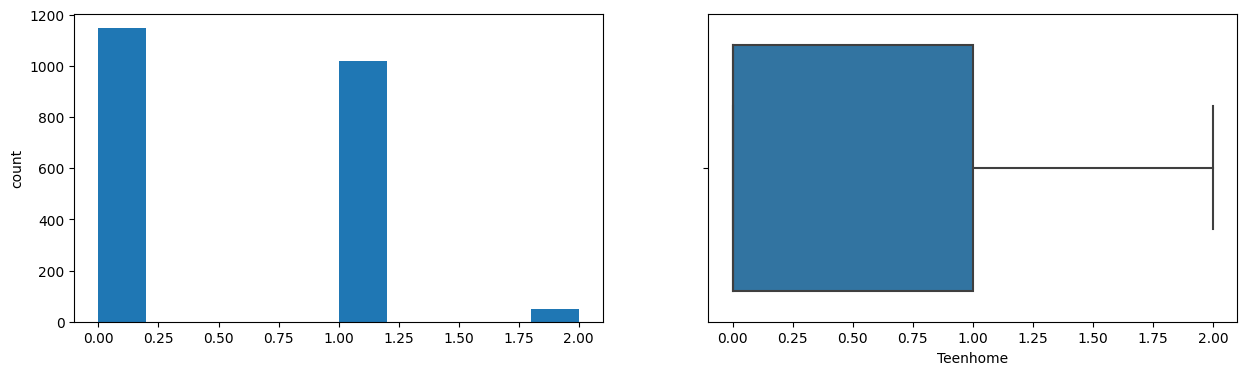

Recency
Skew : 0.0


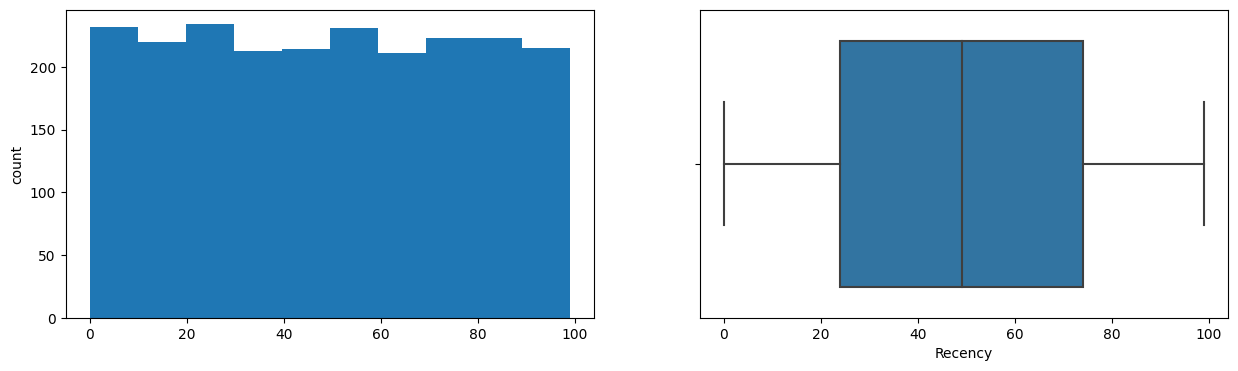

MntWines
Skew : 1.17


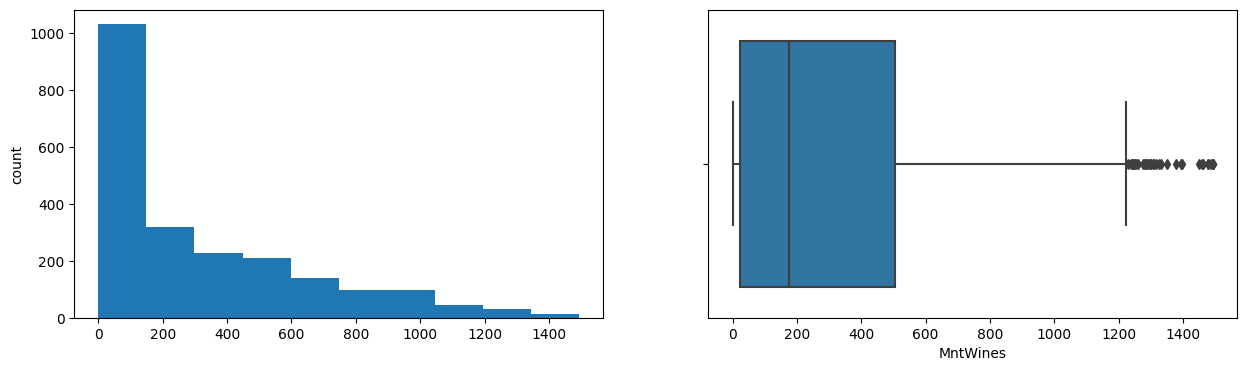

MntFruits
Skew : 2.1


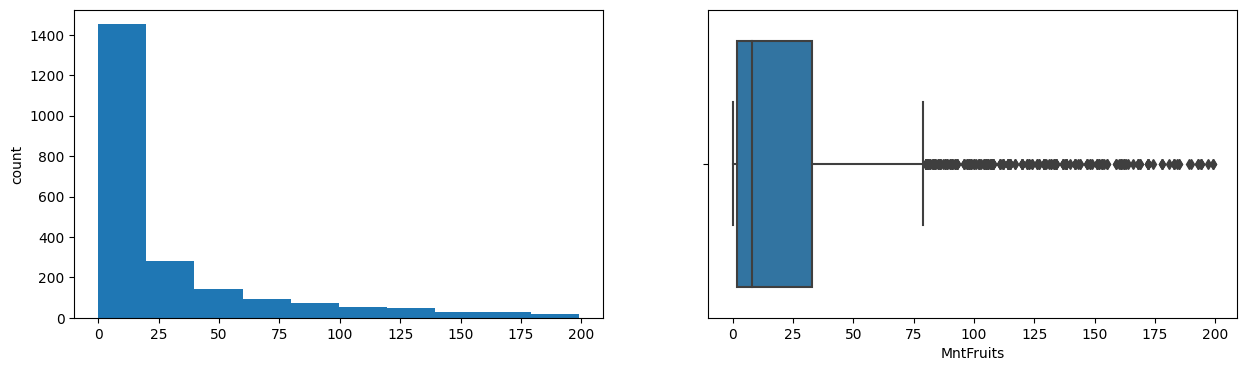

MntMeatProducts
Skew : 2.03


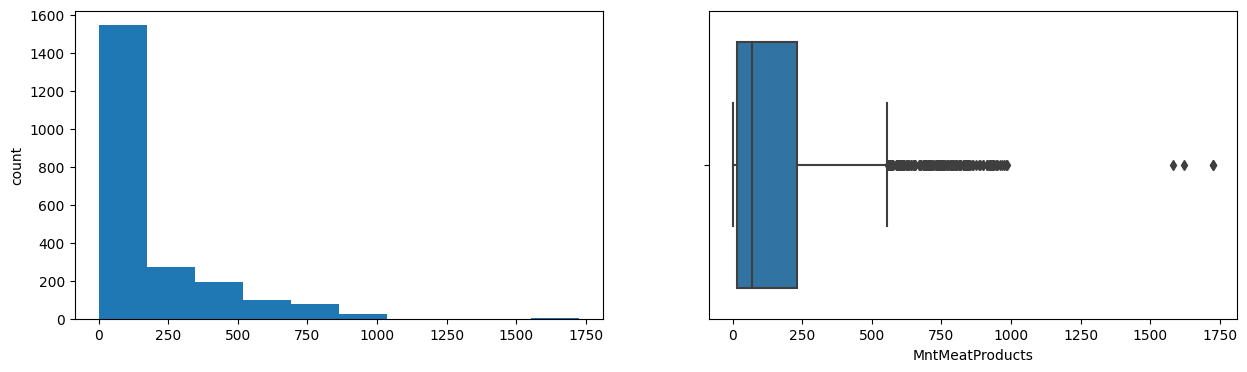

MntFishProducts
Skew : 1.92


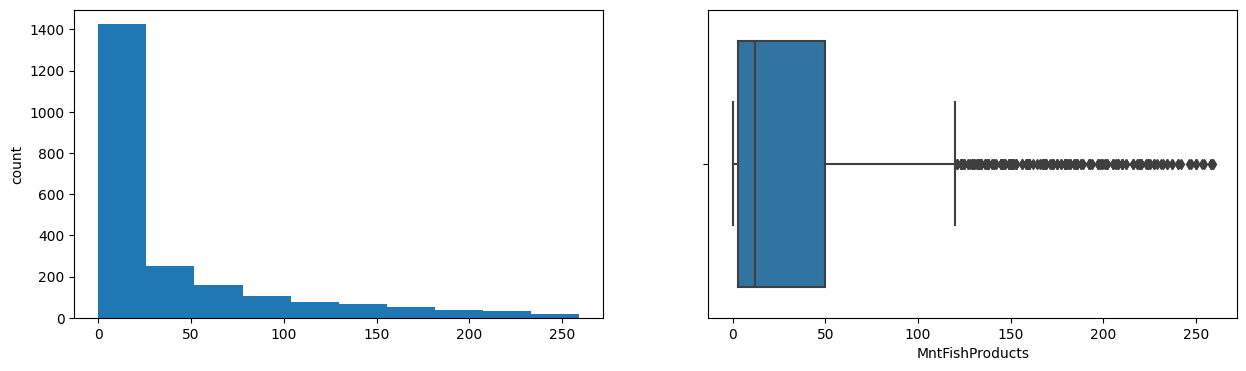

MntSweetProducts
Skew : 2.1


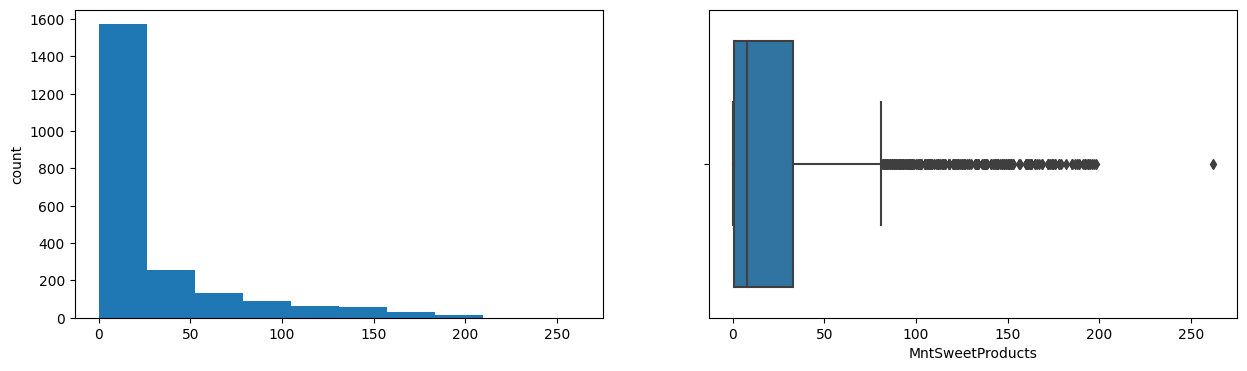

MntGoldProds
Skew : 1.84


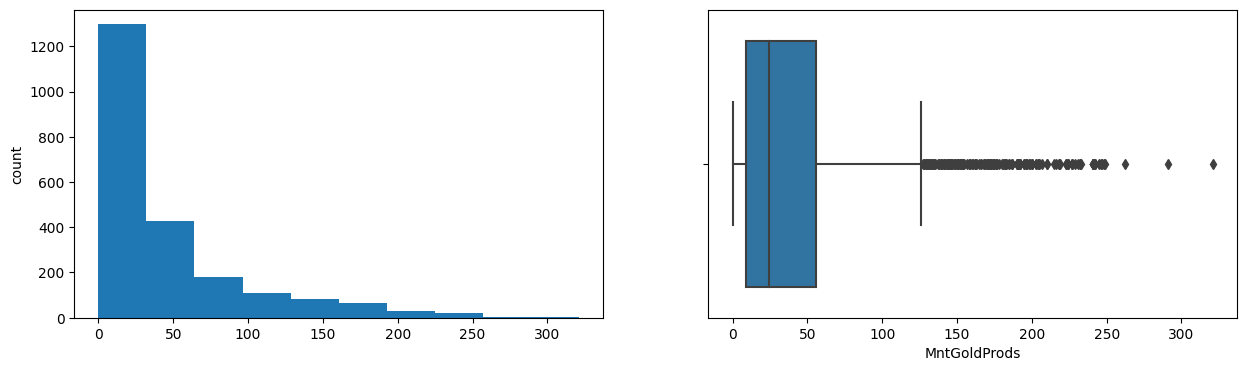

NumDealsPurchases
Skew : 2.42


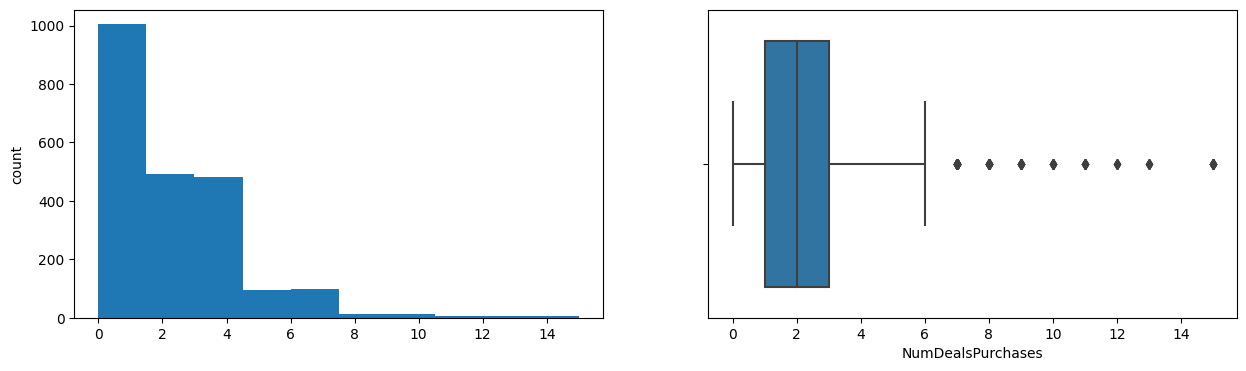

NumWebPurchases
Skew : 1.2


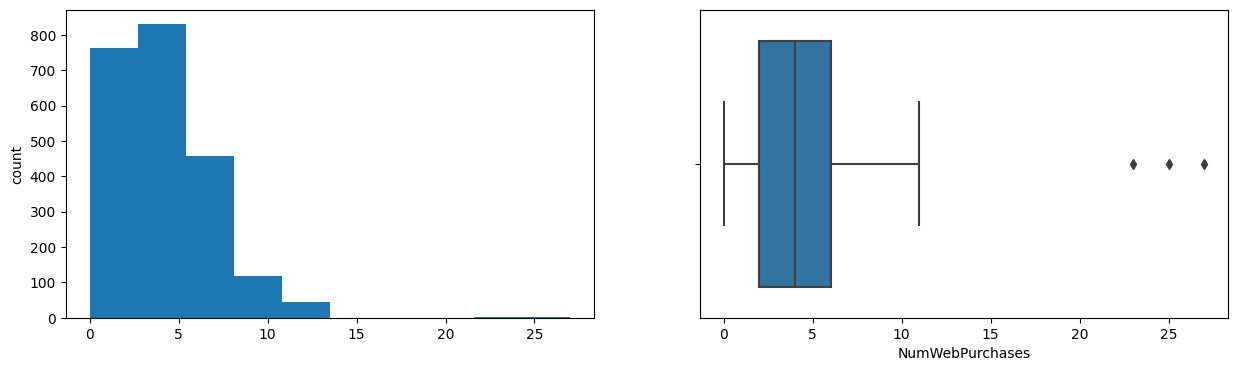

NumCatalogPurchases
Skew : 1.88


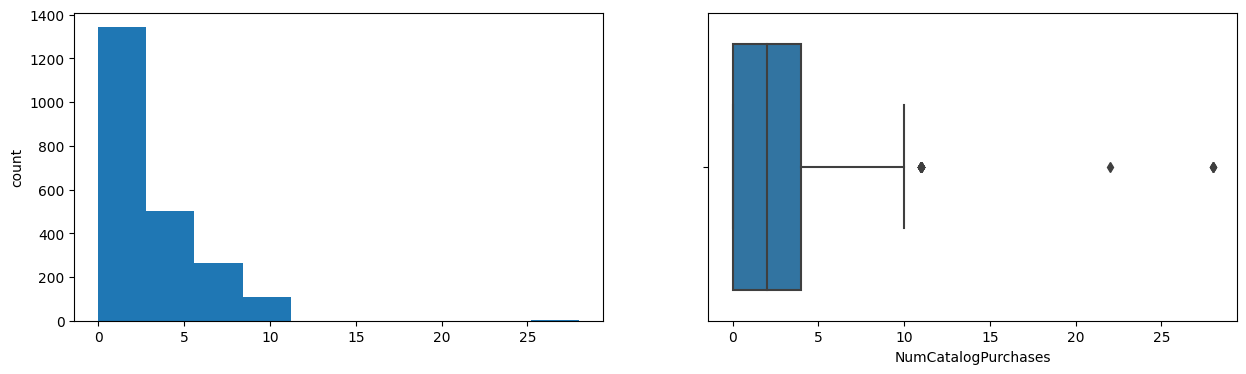

NumStorePurchases
Skew : 0.7


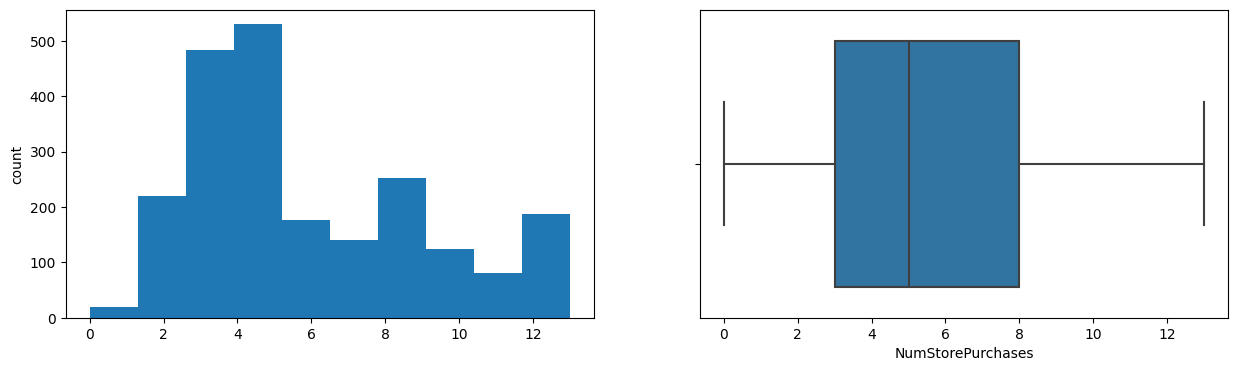

NumWebVisitsMonth
Skew : 0.22


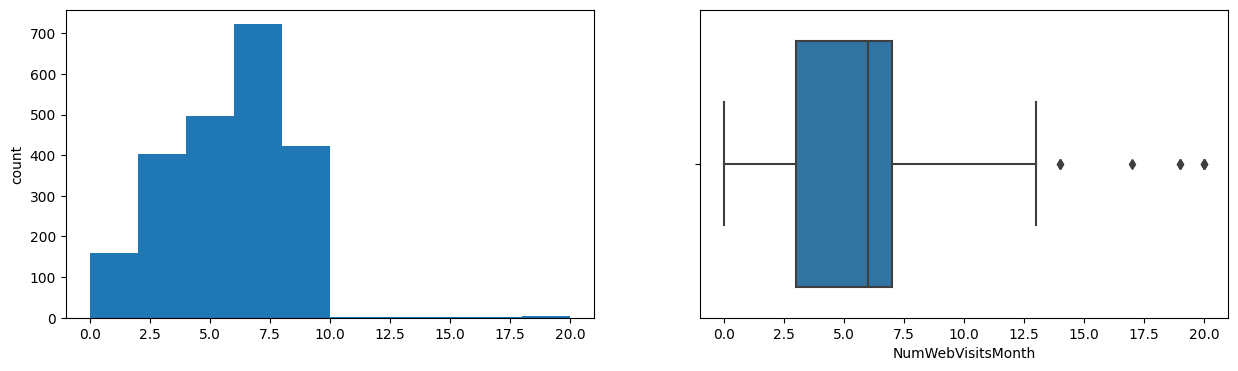

AcceptedCmp3
Skew : 3.27


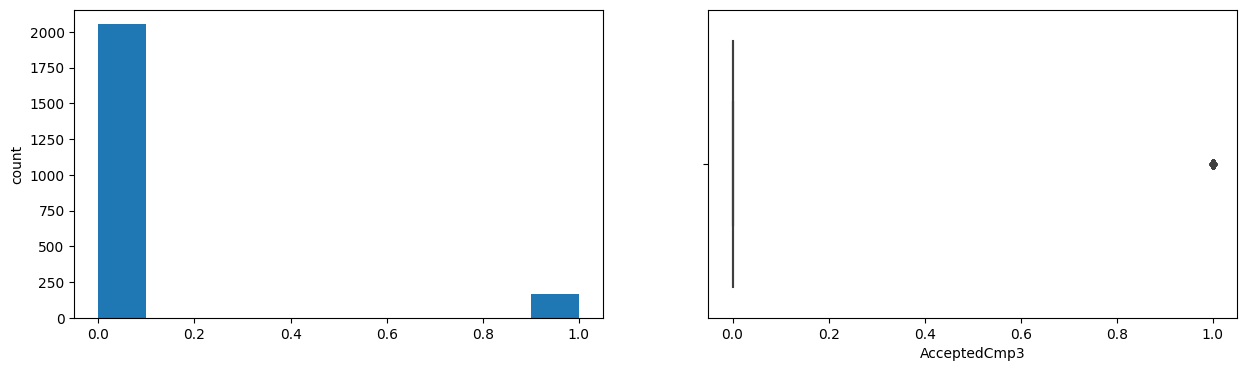

AcceptedCmp4
Skew : 3.26


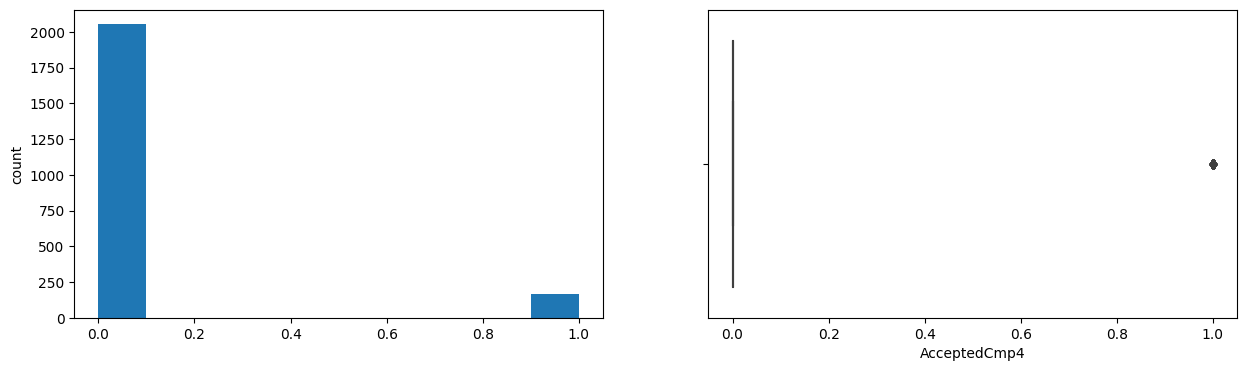

AcceptedCmp5
Skew : 3.28


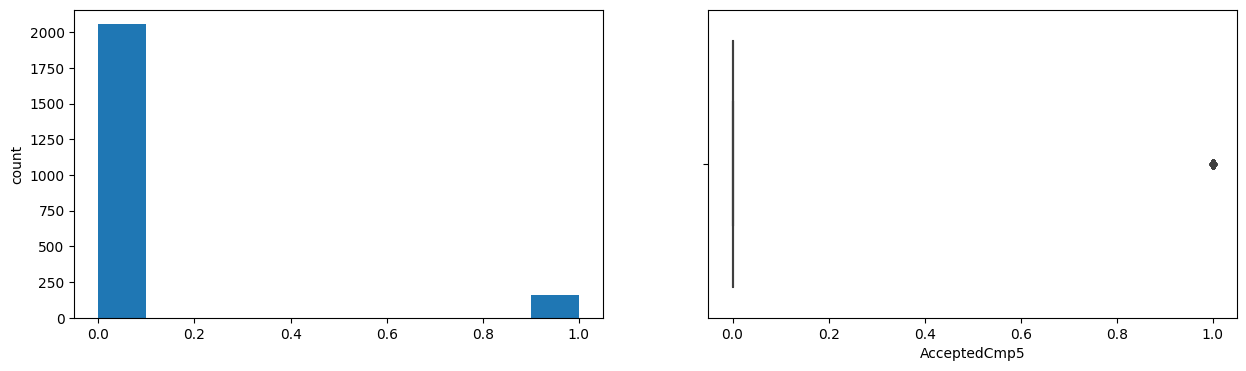

AcceptedCmp1
Skew : 3.56


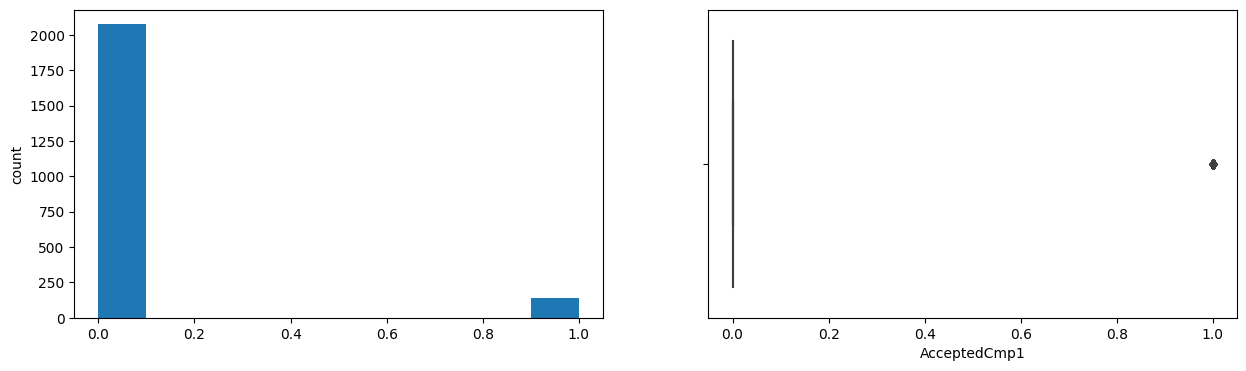

AcceptedCmp2
Skew : 8.57


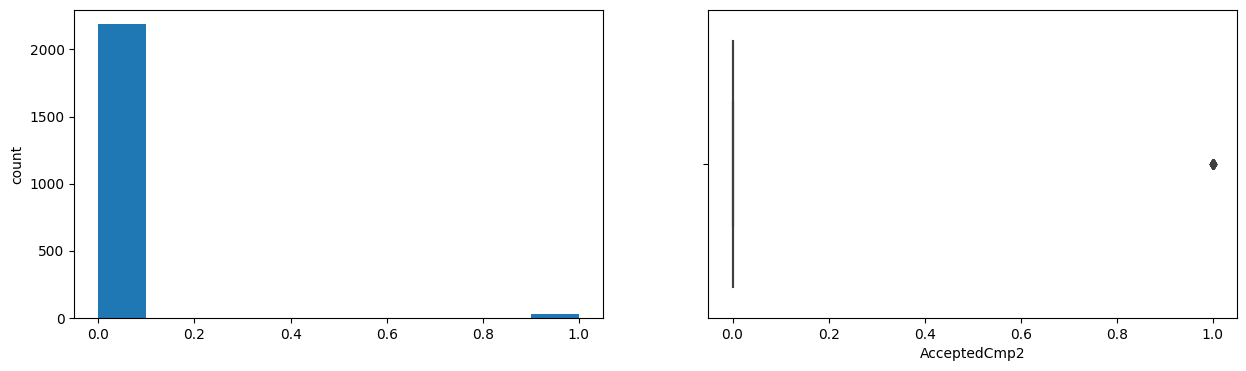

Complain
Skew : 10.13


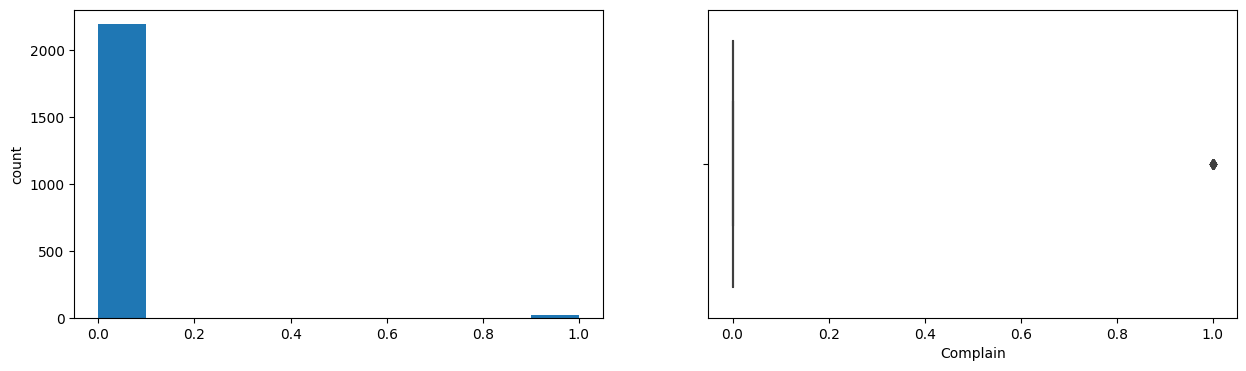

Response
Skew : 1.96


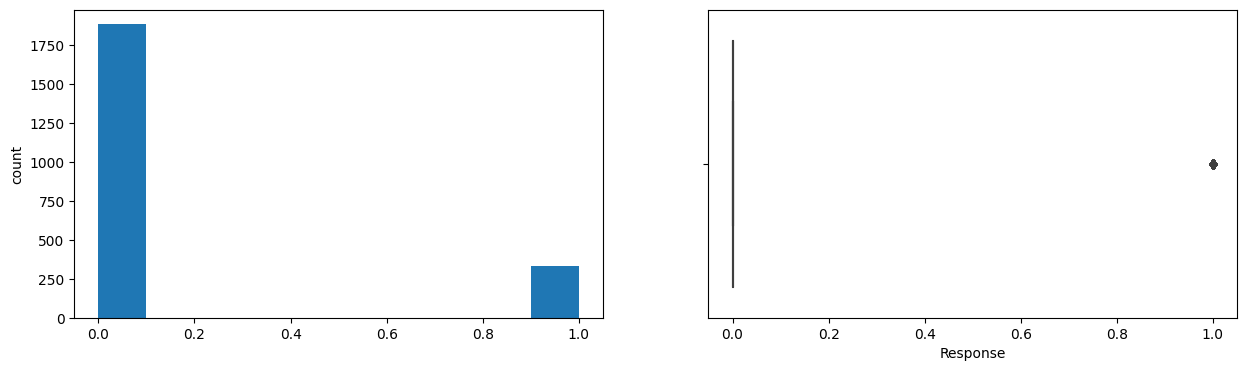

In [15]:
cont_cols = list(data[num_col].columns)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(data[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**After analyzing the 'Income' variable, it was found that it has a right-skewed distribution with some extreme values on the right side. The upper whisker in the box plot for the 'Income' variable lies at 122,308.5 USD, which means that any value above this value can be considered as an outlier. However, due to the lack of domain expertise and the fact that there are only a few rows with extreme values, it was decided to keep them in the dataset and analyze their impact on further analysis. The only exception was the value of 666,666 USD, which was removed as it was clearly an error or a dummy value. Therefore, we will proceed with the analysis with the extreme values included in the dataset except for the value of 666,666 USD.**

## Explore the categorical variables like Education, Kidhome, Teenhome, Complain.

In [16]:
for col in cat_col:
    print(data[col].value_counts())
    print(' ')

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
 
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
 
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64
 


**The distribution of the Income variable appears to be right-skewed, with most of the data points lying on the left side of the distribution. There are a few extreme values on the right side of the distribution that appear as outliers in both the histogram and the box plot.**

In [17]:
rows_with_outliers = data[(data.Income > 122308.5)] 
rows_with_outliers

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   01-03-2014       98        20          2  ...                   22   
617   03-06-2013       31        85          1  ...                    0   
655   07-02-2014       81         1          1  ...                    0   
687   04-08-2012       21        55         16  ...                   28   
1300  04-06-2013       37        39          1  ...                    0   
1653  29-04-2013       13         1          0  ...                   28   
2132  29-08-2013       85         2          1  ...                    0   
2233  02-06-2013       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

**After analyzing the 'Income' variable, it was found that it has a right-skewed distribution with some extreme values on the right side. The upper whisker in the box plot for the 'Income' variable lies at 122,308.5 USD, which means that any value above this value can be considered as an outlier. However, due to the lack of domain expertise and the fact that there are only a few rows with extreme values, it was decided to keep them in the dataset and analyze their impact on further analysis. The only exception was the value of 666,666 USD, which was removed as it was clearly an error or a dummy value. Therefore, we will proceed with the analysis with the extreme values included in the dataset except for the value of 666,666 USD.**

In [18]:
rows_with_outliers = data[(data.Income > 200000)] 

# Get index for rows witn outliers
index_of_rows_to_drop = rows_with_outliers.index

# Drop rows
data = data.drop(index_of_rows_to_drop)

#Check the result
data[(data.Income > 200000)] 

Empty DataFrame
Columns: [Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

[0 rows x 26 columns]

**We can create a new feature that represents the total number of members in each family by summing up the number of kids, teenagers, and adults in the household. This could be a useful variable for understanding household size and composition, and could potentially be used in segmentation and targeting strategies.**

In [19]:
# Find columns with unusual marital status values
unusual_categories = ['Alone', 'Absurd', 'YOLO']
data[data['Marital_Status'].isin(unusual_categories)]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
131         1958      Master          Alone  61331.0        1         1   
138         1973         PhD          Alone  35860.0        1         1   
153         1988  Graduation          Alone  34176.0        1         0   
2093        1993  Graduation         Absurd  79244.0        0         0   
2134        1957      Master         Absurd  65487.0        0         0   
2177        1973         PhD           YOLO  48432.0        0         1   
2202        1973         PhD           YOLO  48432.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
131   10-03-2013       42       534          5  ...                    1   
138   19-05-2014       37        15          0  ...                    1   
153   12-05-2014       12         5          7  ...                    0   
2093  19-12-2012       58       471        102  ...                   10   
2134  10-01-2014       48       240         67  ...                    5   
2177  18-10-2012        3       322          3  ...                    1   
2202  18-10-2012        3       322          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
131                   6                  8             0             0   
138                   2                  5             1             0   
153                   4                  6             0             0   
2093                  7                  1             0             0   
2134                  6                  2             0             0   
2177                  6                  8             0             0   
2202                  6                  8             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
131              0             0             0         0         0  
138              0             0             0         0         1  
153              0             0             0         0         0  
2093             1             1             0         0         1  
2134             0             0             0         0         0  
2177             0             0             0         0         0  
2202             0             0             0         0         1  

[7 rows x 26 columns]

In [20]:
# Replace 'Alone' with 'Single'
data['Marital_Status'] = data['Marital_Status'].replace('Alone', 'Single')

In [21]:
data[data['Marital_Status'].isin(unusual_categories)]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2093        1993  Graduation         Absurd  79244.0        0         0   
2134        1957      Master         Absurd  65487.0        0         0   
2177        1973         PhD           YOLO  48432.0        0         1   
2202        1973         PhD           YOLO  48432.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
2093  19-12-2012       58       471        102  ...                   10   
2134  10-01-2014       48       240         67  ...                    5   
2177  18-10-2012        3       322          3  ...                    1   
2202  18-10-2012        3       322          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2093                  7                  1             0             0   
2134                  6                  2             0             0   
2177                  6                  8             0             0   
2202                  6                  8             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2093             1             1             0         0         1  
2134             0             0             0         0         0  
2177             0             0             0         0         0  
2202             0             0             0         0         1  

[4 rows x 26 columns]

In [22]:
# Find columns with unusual marital status values
unusual_categories = ['Absurd', 'YOLO']
mask = data['Marital_Status'].isin(unusual_categories)
unusual_columns = data.loc[mask].index

# Remove columns with unusual marital status values
data.drop(unusual_columns, axis=0, inplace=True)


In [23]:
# Create a new column for total number of family members
data['Family_Size'] = data['Kidhome'] + data['Teenhome'] + 1

# Update the family size column for customers who are Married or Together
data.loc[data['Marital_Status'].isin(['Married', 'Together']), 'Family_Size'] += 1


In [24]:
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumStorePurchases  \
0  04-09-2012       58       635         88  ...                  4   
1  08-03-2014       38        11          1  ...                  2   
2  21-08-2013       26       426         49  ...                 10   
3  10-02-2014       26        11          4  ...                  4   
4  19-01-2014       94       173         43  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Family_Size  
0             0         0         1            1  
1             0         0         0            3  
2             0         0         0            2  
3             0         0         0            3  
4             0         0         0            3  

[5 rows x 27 columns]

### **Feature Engineering and Data Processing**

**To process the Dt_Customer feature, which is a date, we can extract useful information from this attribute by converting it to a numerical format and calculating the number of years since the customer's registration date up to July 1, 2016. Since we do not know the exact date, we will take the midpoint of the year.**

In [25]:
# Convert the 'Dt_Customer' column to datetime format with the specified format 'DD-MM-YYYY'
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Set the reference date to 2016
reference_date = pd.to_datetime('01-07-2016')

# Calculate the number of years since the reference date
data['Years_Since_Registration'] = (reference_date - data['Dt_Customer']).dt.days / 365

# Round the new column to one decimal place
data['Years_Since_Registration'] = data['Years_Since_Registration'].round(1)

# Display the updated dataset
print(data.head())

   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  2012-09-04       58       635         88  ...                  7   
1  2014-03-08       38        11          1  ...                  5   
2  2013-08-21       26       426         49  ...                  4   
3  2014-02-10       26        11          4  ...                  6   
4  2014-01-19       94       173         43  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0        

In [26]:
# Remove the 'Dt_Customer' column
data.drop('Dt_Customer', axis=1, inplace=True)

**To create a new feature for age, we can subtract the birth year of each customer from 2016. We can do this by first converting the 'Year_Birth' column to a datetime format, and then using the .apply() method to subtract the birth year from 2016 for each row. We will also need to filter out any rows with birth years earlier than 1940 as these values are likely to be errors.**

In [27]:
data[(data.Year_Birth < 1940)] 

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
192        1900  2n Cycle       Divorced  36640.0        1         0       99   
239        1893  2n Cycle         Single  60182.0        0         1       23   
339        1899       PhD       Together  83532.0        0         0       36   

     MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
192        15          6                8  ...                  5   
239         8          0                5  ...                  4   
339       755        144              562  ...                  1   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
192             0             0             0             0             0   
239             0             0             0             0             0   
339             0             0             1             0             0   

     Complain  Response  Family_Size  Years_Since_Registration  
192         1         0            2                       2.3  
239         0         0            2                       1.6  
339         0         0            2                       2.3  

[3 rows x 27 columns]

In [28]:
rows_with_outliers = data[(data.Year_Birth < 1940)] 

# Get index for rows witn outliers
index_of_rows_to_drop = rows_with_outliers.index

# Drop rows
data = data.drop(index_of_rows_to_drop)

#Check the result
data[(data.Year_Birth < 1940)] 

Empty DataFrame
Columns: [Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Family_Size, Years_Since_Registration]
Index: []

[0 rows x 27 columns]

In [29]:
data['Age'] = 2016 - data['Year_Birth']

In [30]:
data = data.drop('Year_Birth', axis=1)

- **Finding the total amount spent by customers on various products can help us understand the purchasing behavior of customers and identify which products are popular or less popular among customers. This information can be used to optimize the company's marketing strategies and improve its product offerings.**
- **We can find the total amount spent by the customers on various products. We can create a new feature that is the sum of all 'Mnt' features (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds).**

In [31]:
data['Total_Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

- **Knowing how many offers the customers have accepted can give us an idea of how receptive they are to marketing campaigns and offers. This information can be useful in developing targeted marketing strategies and campaigns to increase customer engagement and loyalty.**
- **We can find out how many offers the customers have accepted by summing up the values of the columns 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', and 'AcceptedCmp5'. Each of these columns represents a marketing campaign that the customer has either accepted (1) or not accepted (0).**

In [32]:
data['Total_Accepted_Offers'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response'] 

- **We can find out the amount spent per purchase by dividing the total amount spent on various products by the total number of purchases made by the customer. This can help us understand the average spending behavior of the customers and can also be used to identify high-value customers.**

- **We can create a new feature for the amount spent per purchase by dividing the total amount spent on all products by the sum of the number of purchases made from all channels. The resulting value will represent the average amount spent per purchase.**

In [33]:
data['AmountPerPurchase'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                             data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']) / (
                                    data['NumDealsPurchases'] + data['NumWebPurchases'] +
                                    data['NumCatalogPurchases'] + data['NumStorePurchases']).replace(0, 1)

**We can create a new feature to find the total number of kids and teens in the household by adding the 'Kidhome' and 'Teenhome' columns.**

In [34]:
data['Total_Kids_Teens'] = data['Kidhome'] + data['Teenhome']

In [35]:
data.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   
3  Graduation       Together  26646.0        1         0       26        11   
4         PhD        Married  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp2  Complain  \
0         88              546              172  ...             0         0   
1          1                6                2  ...             0         0   
2         49              127              111  ...             0         0   
3          4               20               10  ...             0         0   
4         43              118               46  ...             0         0   

   Response  Family_Size  Years_Since_Registration  Age  Total_Spent  \
0         1            1                       3.3   59         1617   
1         0            3                       1.8   62           27   
2         0            2                       2.4   51          776   
3         0            3                       1.9   32           53   
4         0            3                       2.0   35          422   

   Total_Accepted_Offers  AmountPerPurchase  Total_Kids_Teens  
0                      1          64.680000                 0  
1                      0           4.500000                 2  
2                      0          36.952381                 0  
3                      0           6.625000                 1  
4                      0          22.210526                 1  

[5 rows x 31 columns]

#### We have added the following columns to the dataset:

- **'Age': extracted from the 'Year_Birth' feature by subtracting the birth year from 2016 after removing rows with birth year earlier than 1940.**
- **'Total_Kids_Teens': calculated by adding the 'Kidhome' and 'Teenhome' features.**
- **'Family_Size': calculated by adding 2 to the 'NumChildren' feature and 1 to the 'Marital_Status' feature.**
- **'Total_Spent': calculated by summing up the amount spent on all products: 'MntWines', 'MntFruits', - **'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds'.**
- **'Years_Since_Registration': calculated by converting the 'Dt_Customer' feature to a numerical format and calculating the number of years since the customer's registration date up to July 1, 2016, which is the midpoint of the year.**
- **'Total_Offers_Accepted': calculated by summing up the number of offers accepted by the customer from the 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', and 'AcceptedCmp5' features.**
- **'Spent_per_Purchase': calculated by dividing the 'Total_Spent' feature by the sum of the 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', and 'NumStorePurchases' features.**

**These new columns can provide us with additional insights and help us better understand the behavior and preferences of customers.**

### **Bivariate Analysis**

1.  Analyze different categorical and numerical variables and check how different variables are related to each other.
2.  Check the relationship of numerical variables with categorical variables.

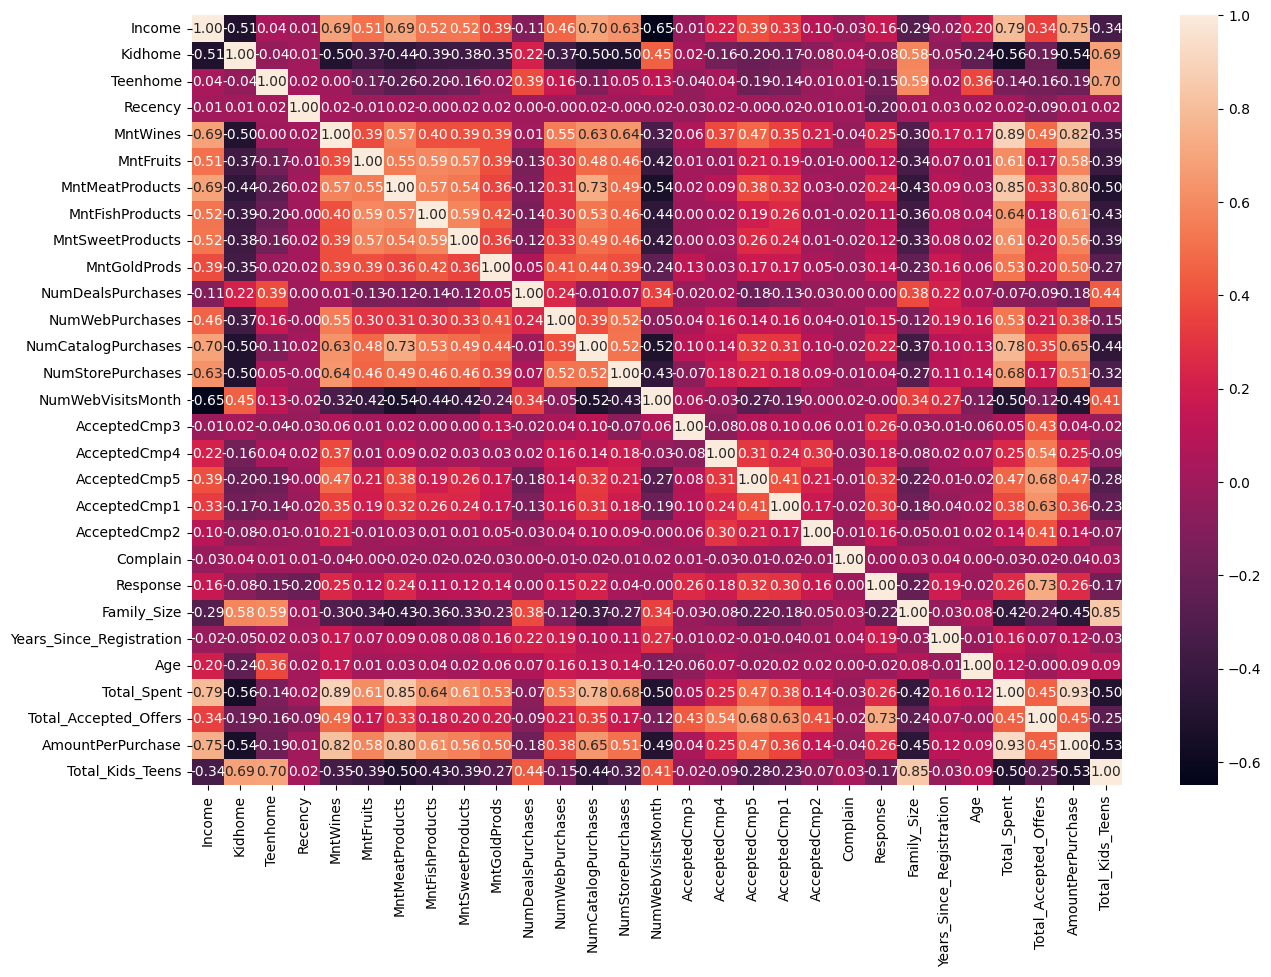

In [36]:
plt.figure(figsize = (15, 10))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**The analysis shows that there are some strong positive correlations between variables , such as Total_Spent and AmountPerPurchase with a correlation coefficient of 0.93, and Total_Spent and MntWines with a correlation coefficient of 0.89. This suggests that customers who spend more money on purchases also tend to make larger purchases in terms of amount and buy more wines. There are also strong positive correlations between Family_Size and Total_Kids_Teens with a correlation coefficient of 0.85, which is expected as having more kids or teenagers in a family will increase the family size.**

**Moreover, there are moderate positive correlations between variables, such as Income and Total_Spent with a correlation coefficient of 0.79, and Income and AmountPerPurchase with a correlation coefficient of 0.76. This indicates that customers with higher income tend to spend more money on purchases and make larger purchases in terms of amount.**

**There are also some weak to moderate correlations between variables, such as NumCatalogPurchases and MntMeatProducts with a correlation coefficient of 0.73, and Total_Accepted_Offers and AcceptedCmp5 with a correlation coefficient of 0.72. This suggests that customers who make more catalog purchases tend to buy more meat products, and customers who accept more offers tend to accept offers from campaign 5.**

**We can see that there are several pairs of variables that are strongly negatively correlated, such as NumWebVisitsMonth and Income, Total_Spent and Kidhome, and AmountPerPurchase and Kidhome. This suggests that as one variable increases, the other decreases.**

**On the other hand, there are several pairs of variables that are strongly positively correlated, such as Total_Spent and MntWines, Total_Kids_Teens and Family_Size, and Total_Spent and MntMeatProducts. This suggests that as one variable increases, the other also tends to increase.**

<AxesSubplot:xlabel='Marital_Status', ylabel='Total_Spent'>

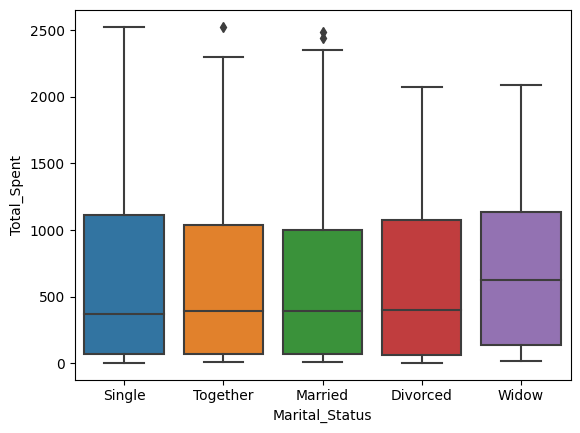

In [37]:
sns.boxplot(x='Marital_Status', y='Total_Spent', data=data)

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

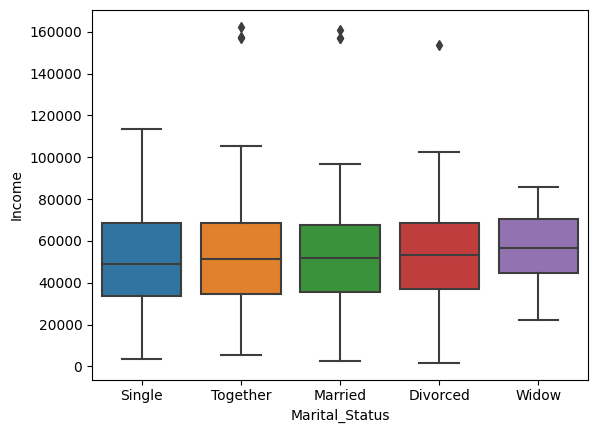

In [38]:
sns.boxplot(x='Marital_Status', y='Income', data=data)

<AxesSubplot:xlabel='Family_Size', ylabel='Total_Spent'>

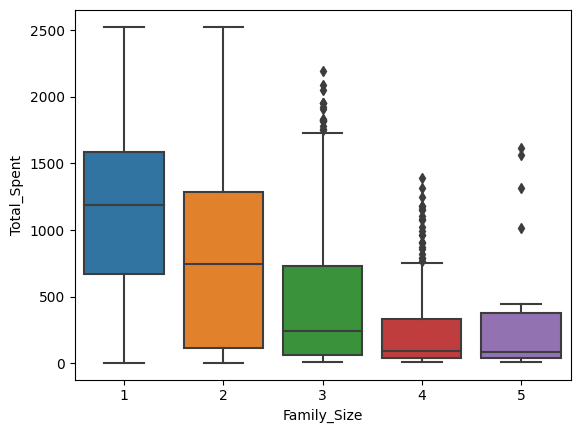

In [361]:
sns.boxplot(x='Family_Size', y='Total_Spent', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='Total_Spent'>

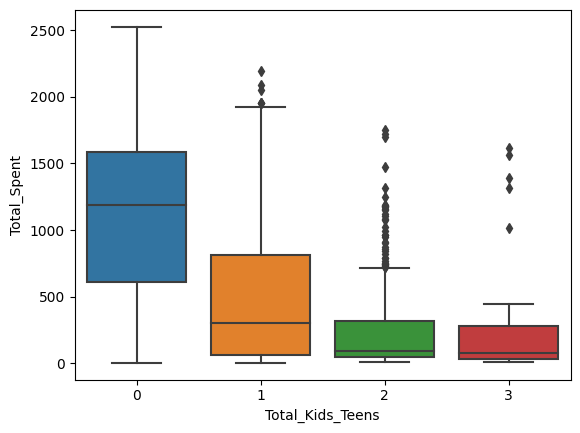

In [362]:
sns.boxplot(x='Total_Kids_Teens', y='Total_Spent', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='AmountPerPurchase'>

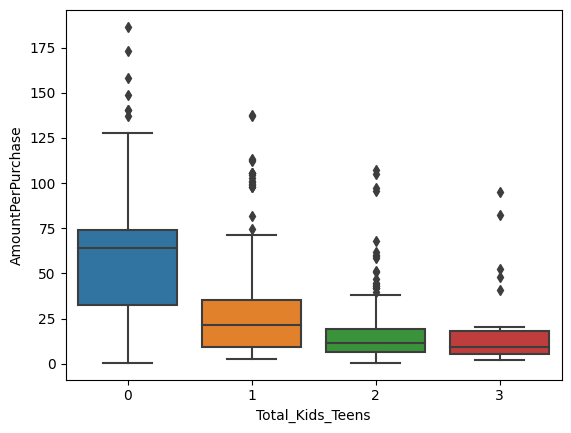

In [395]:
sns.boxplot(x='Total_Kids_Teens', y='AmountPerPurchase', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='AmountPerPurchase'>

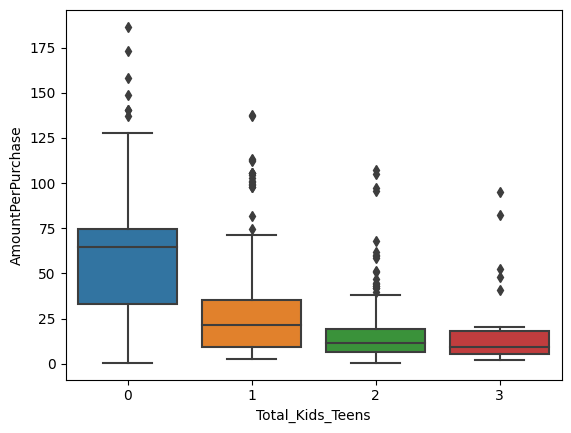

In [364]:
sns.boxplot(x='Total_Kids_Teens', y='AmountPerPurchase', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='Income'>

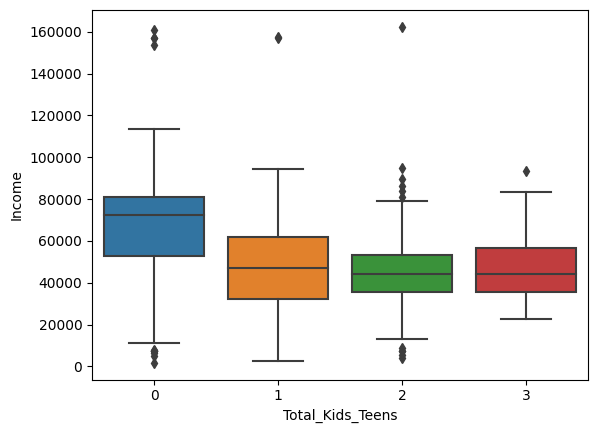

In [365]:
sns.boxplot(x='Total_Kids_Teens', y='Income', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='MntWines'>

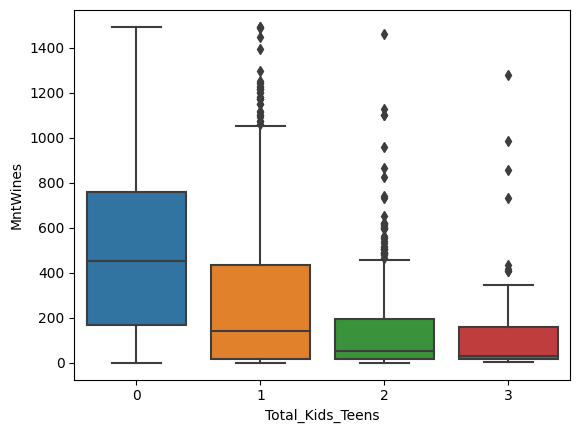

In [366]:
sns.boxplot(x='Total_Kids_Teens', y='MntWines', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='MntFishProducts'>

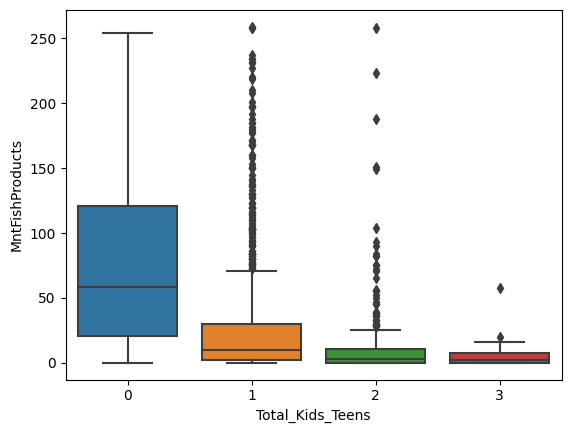

In [367]:
sns.boxplot(x='Total_Kids_Teens', y='MntFishProducts', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='MntFruits'>

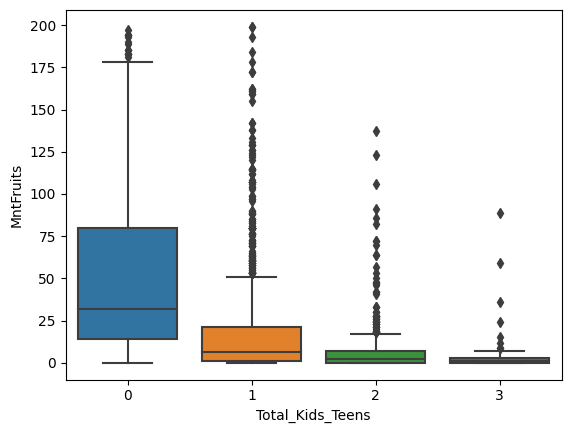

In [368]:
sns.boxplot(x='Total_Kids_Teens', y='MntFruits', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='MntSweetProducts'>

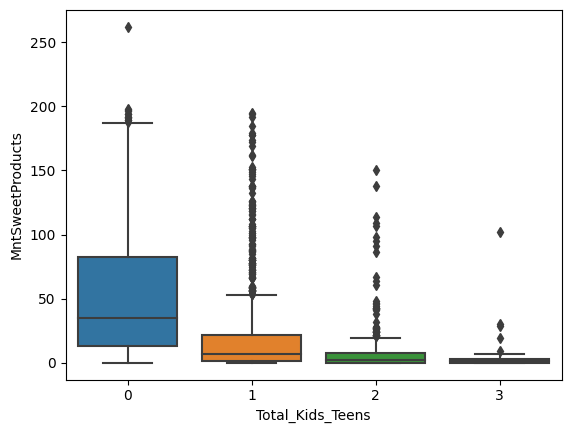

In [369]:
sns.boxplot(x='Total_Kids_Teens', y='MntSweetProducts', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='NumWebPurchases'>

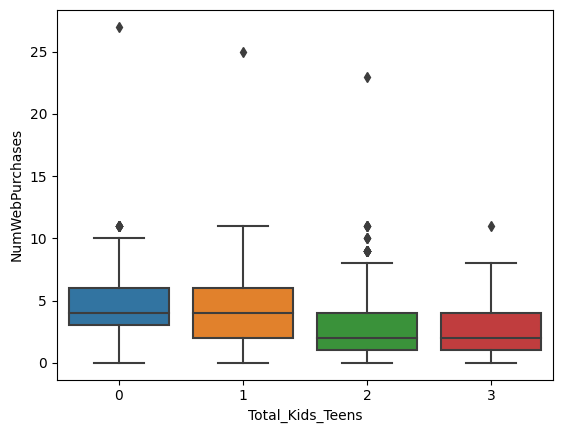

In [370]:
sns.boxplot(x='Total_Kids_Teens', y='NumWebPurchases', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='NumStorePurchases'>

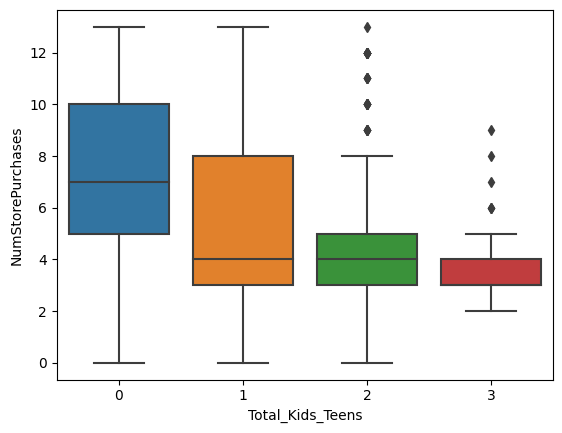

In [371]:
sns.boxplot(x='Total_Kids_Teens', y='NumStorePurchases', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='NumStorePurchases'>

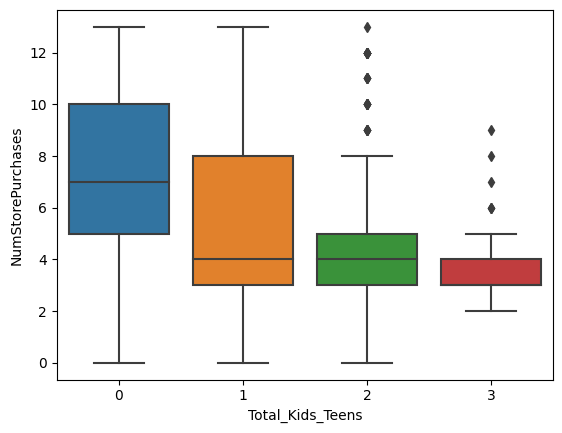

In [372]:
sns.boxplot(x='Total_Kids_Teens', y='NumStorePurchases', data=data)

<AxesSubplot:xlabel='Total_Accepted_Offers', ylabel='Years_Since_Registration'>

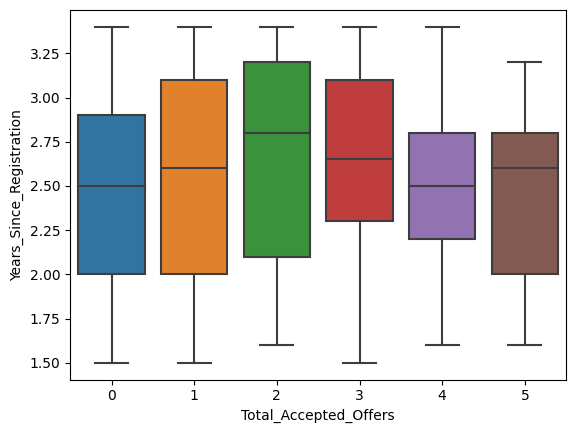

In [373]:
sns.boxplot(x='Total_Accepted_Offers', y='Years_Since_Registration', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='MntGoldProds'>

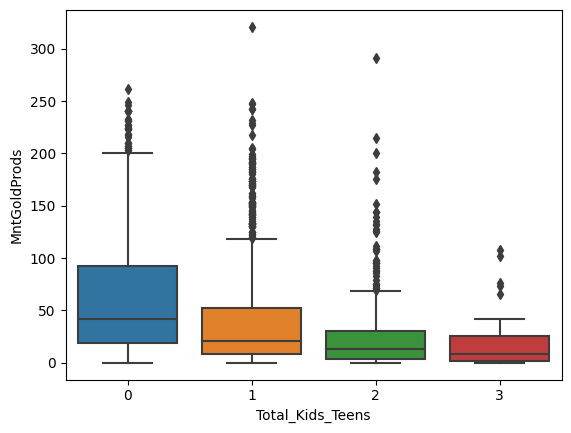

In [374]:
sns.boxplot(x='Total_Kids_Teens', y='MntGoldProds', data=data)

<AxesSubplot:xlabel='Total_Kids_Teens', ylabel='NumDealsPurchases'>

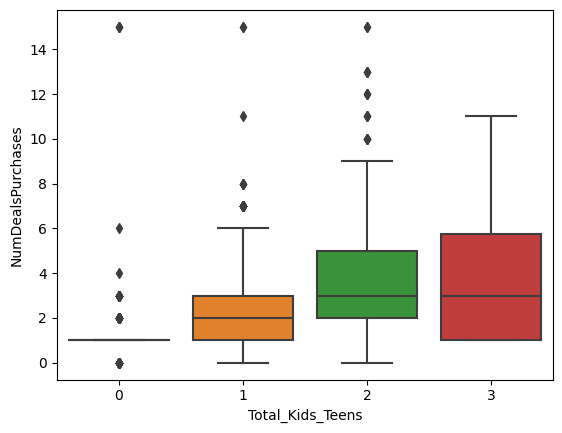

In [375]:
sns.boxplot(x='Total_Kids_Teens', y='NumDealsPurchases', data=data)

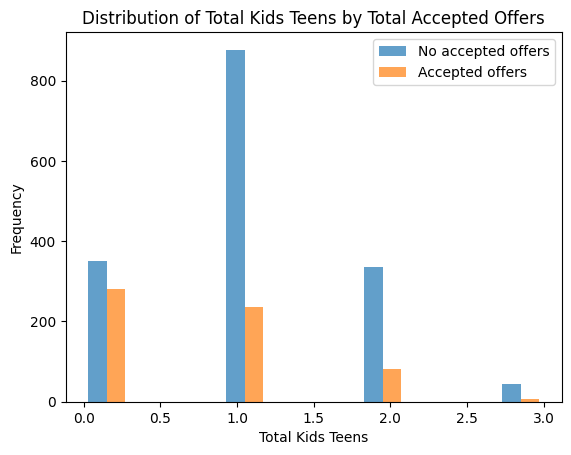

In [376]:
plt.hist([data[data['Total_Accepted_Offers'] == 0]['Total_Kids_Teens'], 
          data[data['Total_Accepted_Offers'] > 0]['Total_Kids_Teens']],
          bins=10, alpha=0.7, label=['No accepted offers', 'Accepted offers'])

plt.legend(loc='upper right')
plt.xlabel('Total Kids Teens')
plt.ylabel('Frequency')
plt.title('Distribution of Total Kids Teens by Total Accepted Offers')
plt.show()

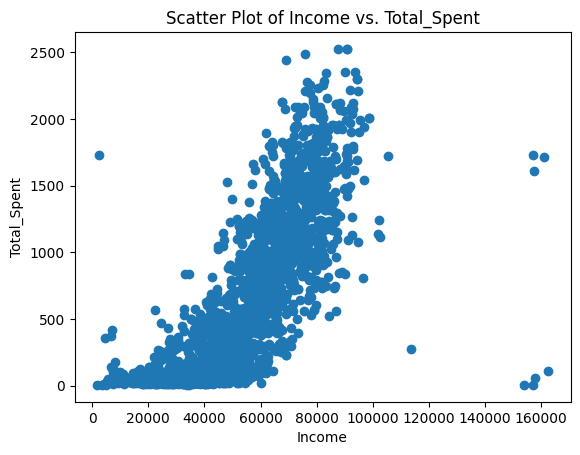

In [377]:
import matplotlib.pyplot as plt

plt.scatter(data['Income'], data['Total_Spent'])
plt.title('Scatter Plot of Income vs. Total_Spent')
plt.xlabel('Income')
plt.ylabel('Total_Spent')
plt.show()

## **Important Insights from EDA and Data Preprocessing**

### Based on the analysis, the most important feature is the number of children in the household. People without children are more willing to spend money on purchases and accept more offers.

## **Data Preparation for Segmentation**

In [102]:
dataI = data.copy()

In [103]:
# Dropping the "ID" column
dataI.drop(columns = "Marital_Status", inplace = True)

In [105]:
# Dropping the "ID" column
dataI.drop(columns = "Education", inplace = True)

In [106]:
dataI[(dataI.MntSweetProducts > 200)] 

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1898  113734.0        0         0        9         6          2   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1898                3                1               262             3  ...   

      AcceptedCmp2  Complain  Response  Family_Size  Years_Since_Registration  \
1898             0         0         0            1                       1.6   

      Age  Total_Spent  Total_Accepted_Offers  AmountPerPurchase  \
1898   71          277                      0          10.259259   

      Total_Kids_Teens  
1898                 0  

[1 rows x 29 columns]

In [41]:
rows_with_outliers = dataI[(dataI.MntSweetProducts > 200)] 

# Get index for rows witn outliers
index_of_rows_to_drop = rows_with_outliers.index

# Drop rows
dataI = dataI.drop(index_of_rows_to_drop)

#Check the result
dataI[(dataI.MntSweetProducts > 200)] 

Empty DataFrame
Columns: [Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Family_Size, Years_Since_Registration, Age, Total_Spent, Total_Accepted_Offers, AmountPerPurchase, Total_Kids_Teens]
Index: []

[0 rows x 31 columns]

In [79]:
dataI[(dataI.NumDealsPurchases > 13)] 

Education Marital_Status    Income  Kidhome  Teenhome  Recency  \
21    Graduation        Married    2447.0        1         0       42   
164          PhD        Married  157243.0        0         1       98   
432     2n Cycle       Together   67309.0        1         1       76   
687          PhD        Married  160803.0        0         0       21   
1042  Graduation         Single    8028.0        0         0       62   
1245  Graduation       Divorced    1730.0        0         0       65   
1846         PhD        Married    4023.0        1         1       29   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
21           1          1             1725                1  ...   
164         20          2             1582                1  ...   
432        515         47              181              149  ...   
687         55         16             1622               17  ...   
1042        73         18               66                7  ...   
1245         1          1                3                1  ...   
1846         5          0                1                1  ...   

      AcceptedCmp2  Complain  Response  Family_Size  Years_Since_Registration  \
21               0         0         0            3                       3.0   
164              0         0         0            3                       1.9   
432              0         0         0            4                       3.0   
687              0         0         0            2                       3.4   
1042             0         0         0            1                       3.3   
1245             0         0         0            1                       1.6   
1846             0         0         0            4                       1.5   

      Age  Total_Spent  Total_Accepted_Offers  AmountPerPurchase  \
21     37         1730                      0          40.232558   
164    43         1608                      0          43.459459   
432    49         1082                      0          27.743590   
687    34         1717                      0          39.022727   
1042   25          178                      0          11.125000   
1245   45            8                      0           0.533333   
1846   53            9                      0           0.600000   

      Total_Kids_Teens  
21                   1  
164                  1  
432                  2  
687                  0  
1042                 0  
1245                 0  
1846                 2  

[7 rows x 31 columns]

In [80]:
dataI[(dataI.MntGoldProds > 250)] 

Education Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
1328      Master         Single  6560.0        0         0        2        67   
1806         PhD         Single  7144.0        0         2       92        81   
1975  Graduation        Married  4428.0        0         1        0        16   

      MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp2  \
1328         11               26                4  ...             0   
1806          4               33                5  ...             0   
1975          4               12                2  ...             0   

      Complain  Response  Family_Size  Years_Since_Registration  Age  \
1328         0         0            1                       2.1   34   
1806         0         0            3                       2.1   50   
1975         0         0            3                       2.3   47   

      Total_Spent  Total_Accepted_Offers  AmountPerPurchase  Total_Kids_Teens  
1328          373                      0             186.50                 0  
1806          416                      0              16.64                 2  
1975          359                      0              14.36                 1  

[3 rows x 31 columns]

In [44]:
rows_with_outliers = dataI[(dataI.MntGoldProds > 250)] 

# Get index for rows witn outliers
index_of_rows_to_drop = rows_with_outliers.index

# Drop rows
dataI = dataI.drop(index_of_rows_to_drop)

#Check the result
dataI[(dataI.MntGoldProds > 250)] 

Empty DataFrame
Columns: [Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Family_Size, Years_Since_Registration, Age, Total_Spent, Total_Accepted_Offers, AmountPerPurchase, Total_Kids_Teens]
Index: []

[0 rows x 31 columns]

In [81]:
dataI[(dataI.NumWebPurchases > 20)] 

Education Marital_Status    Income  Kidhome  Teenhome  Recency  \
1806         PhD         Single    7144.0        0         2       92   
1898         PhD         Single  113734.0        0         0        9   
1975  Graduation        Married    4428.0        0         1        0   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
1806        81          4               33                5  ...   
1898         6          2                3                1  ...   
1975        16          4               12                2  ...   

      AcceptedCmp2  Complain  Response  Family_Size  Years_Since_Registration  \
1806             0         0         0            3                       2.1   
1898             0         0         0            1                       1.6   
1975             0         0         0            3                       2.3   

      Age  Total_Spent  Total_Accepted_Offers  AmountPerPurchase  \
1806   50          416                      0          16.640000   
1898   71          277                      0          10.259259   
1975   47          359                      0          14.360000   

      Total_Kids_Teens  
1806                 2  
1898                 0  
1975                 1  

[3 rows x 31 columns]

In [46]:
rows_with_outliers = dataI[(dataI.NumWebPurchases > 20) & (dataI.Income < 800)]

# Get index for rows witn outliers
index_of_rows_to_drop = rows_with_outliers.index

# Drop rows
dataI = dataI.drop(index_of_rows_to_drop)

# Check the result
dataI[dataI.NumWebPurchases > 20]

Empty DataFrame
Columns: [Education, Marital_Status, Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response, Family_Size, Years_Since_Registration, Age, Total_Spent, Total_Accepted_Offers, AmountPerPurchase, Total_Kids_Teens]
Index: []

[0 rows x 31 columns]

In [82]:
# Apply one-hot encoding to 'Marital_Status' column using get_dummies()
dataI = pd.get_dummies(dataI, columns=['Marital_Status'], drop_first=True)

# Display the updated dataset
print(dataI.head())

# Check the new columns created
print(dataI.columns)

# Apply one-hot encoding to 'Marital_Status' column using get_dummies()
dataI = pd.get_dummies(dataI, columns=['Education'], drop_first=True)

# Display the updated dataset
print(dataI.head())

# Check the new columns created
print(dataI.columns)

    Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduation  58138.0        0         0       58       635         88   
1  Graduation  46344.0        1         1       38        11          1   
2  Graduation  71613.0        0         0       26       426         49   
3  Graduation  26646.0        1         0       26        11          4   
4         PhD  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0              546              172                88  ...   
1                6                2                 1  ...   
2              127              111                21  ...   
3               20               10                 3  ...   
4              118               46                27  ...   

   Years_Since_Registration  Age  Total_Spent  Total_Accepted_Offers  \
0                       3.3   59         1617                      1   
1                       1.8   62

In [401]:
#dataS = dataI.copy()
dataS.head()


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  AcceptedCmp2  \
0              172                88            88  ...             0   
1                2                 1             6  ...             0   
2              111                21            42  ...             0   
3               10                 3             5  ...             0   
4               46                27            15  ...             0   

   Complain  Response  Family_Size  Years_Since_Registration  Age  \
0         0         1            1                       3.3   59   
1         0         0            3                       1.8   62   
2         0         0            2                       2.4   51   
3         0         0            3                       1.9   32   
4         0         0            3                       2.0   35   

   Total_Spent  Total_Accepted_Offers  AmountPerPurchase  Total_Kids_Teens  
0         1617                      1          64.680000                 0  
1           27                      0           4.500000                 2  
2          776                      0          36.952381                 0  
3           53                      0           6.625000                 1  
4          422                      0          22.210526                 1  

[5 rows x 29 columns]

In [402]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(dataS), columns = dataS.columns)

In [403]:
data_scaled.head()

Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.351086      0.0       0.0  0.585859  0.425318   0.442211   
1  0.277680      0.5       0.5  0.383838  0.007368   0.005025   
2  0.434956      0.0       0.0  0.262626  0.285332   0.246231   
3  0.155079      0.5       0.0  0.262626  0.007368   0.020101   
4  0.352051      0.5       0.0  0.949495  0.115874   0.216080   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0         0.316522         0.664093          0.335878      0.274143  ...   
1         0.003478         0.007722          0.003817      0.018692  ...   
2         0.073623         0.428571          0.080153      0.130841  ...   
3         0.011594         0.038610          0.011450      0.015576  ...   
4         0.068406         0.177606          0.103053      0.046729  ...   

   AcceptedCmp2  Complain  Response  Family_Size  Years_Since_Registration  \
0           0.0       0.0       1.0         0.00                  0.947368   
1           0.0       0.0       0.0         0.50                  0.157895   
2           0.0       0.0       0.0         0.25                  0.473684   
3           0.0       0.0       0.0         0.50                  0.210526   
4           0.0       0.0       0.0         0.50                  0.263158   

        Age  Total_Spent  Total_Accepted_Offers  AmountPerPurchase  \
0  0.696429     0.639683                    0.2           0.344936   
1  0.750000     0.008730                    0.0           0.021330   
2  0.553571     0.305952                    0.0           0.195836   
3  0.214286     0.019048                    0.0           0.032757   
4  0.267857     0.165476                    0.0           0.116565   

   Total_Kids_Teens  
0          0.000000  
1          0.666667  
2          0.000000  
3          0.333333  
4          0.333333  

[5 rows x 29 columns]

# Principal Component Analysis

In [160]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
data_pca = pd.DataFrame(pca1.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_

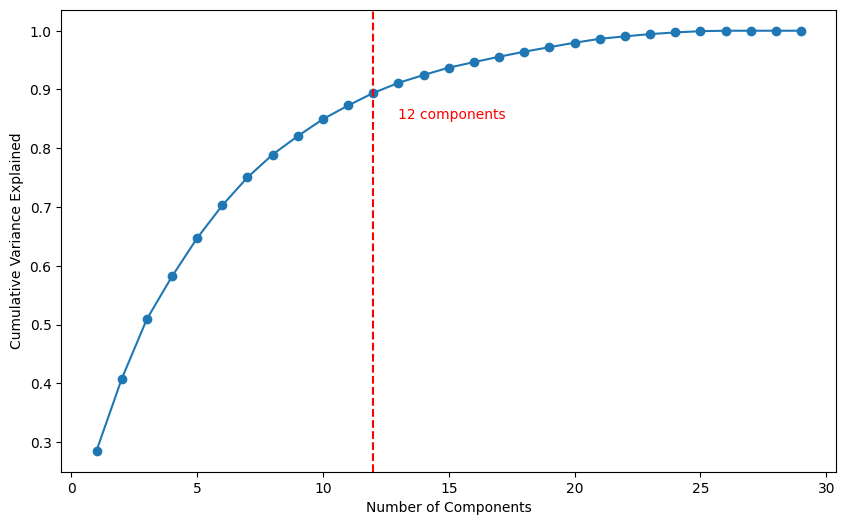

In [165]:
X = data_pca
# Set up the PCA object with maximum number of components
pca = PCA(n_components=X.shape[1])

# Fit and transform the data
pca.fit_transform(X)

# Create a table to display cumulative variance explained by number of components
table = pd.DataFrame({'Components': range(1, X.shape[1]+1),
                      'Cumulative Variance Explained': np.cumsum(pca.explained_variance_ratio_)})

# Find the number of components needed to explain 80% of the variance
n_components = len(table[table['Cumulative Variance Explained'] <= 0.90])


# Plot the cumulative variance explained by number of components
plt.figure(figsize=(10, 6))
plt.plot(table['Components'], table['Cumulative Variance Explained'], '-o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axvline(x=n_components, color='r', linestyle='--')
plt.text(n_components+1, 0.85, f'{n_components} components', color='r')
plt.show()


In [168]:
## # Create a new dataframe with the first 12 principal components as columns
cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"]

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:12], 2), index = data_scaled.columns, columns = cols)
pc1

PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8  \
Income                    0.16 -0.08  0.10  0.05  0.05  0.05  0.06 -0.05   
Kidhome                  -0.29  0.25 -0.01  0.04 -0.16  0.09  0.56 -0.01   
Teenhome                 -0.14 -0.07  0.62  0.01  0.17  0.10 -0.22 -0.09   
Recency                  -0.02 -0.21  0.04  0.17 -0.84  0.27 -0.22 -0.29   
MntWines                  0.29 -0.05  0.23  0.04 -0.04 -0.02  0.05  0.14   
MntFruits                 0.20 -0.13 -0.01 -0.10  0.05  0.15  0.20 -0.11   
MntMeatProducts           0.16 -0.05 -0.00 -0.02 -0.00  0.06  0.11 -0.06   
MntFishProducts           0.22 -0.14 -0.02 -0.10  0.05  0.15  0.22 -0.12   
MntSweetProducts          0.15 -0.09 -0.00 -0.05  0.01  0.10  0.14 -0.07   
MntGoldProds              0.13 -0.06  0.06 -0.10  0.01  0.13  0.03  0.03   
NumDealsPurchases        -0.04  0.02  0.17 -0.10 -0.02  0.00  0.05  0.01   
NumWebPurchases           0.08 -0.03  0.10 -0.05  0.01  0.02 -0.01  0.02   
NumCatalogPurchases       0.12 -0.04  0.04 -0.02  0.01  0.06  0.02 -0.01   
NumStorePurchases         0.26 -0.23  0.21 -0.07  0.09  0.00  0.09  0.06   
NumWebVisitsMonth        -0.10  0.10  0.03 -0.09 -0.08 -0.07 -0.02  0.10   
AcceptedCmp3              0.05  0.26 -0.03 -0.03  0.01  0.66 -0.27  0.58   
AcceptedCmp4              0.14  0.13  0.22  0.36 -0.16 -0.51 -0.13  0.27   
AcceptedCmp5              0.24  0.18  0.04  0.31 -0.13 -0.06  0.21  0.11   
AcceptedCmp1              0.20  0.16  0.04  0.27 -0.05  0.05  0.20 -0.02   
AcceptedCmp2              0.04  0.05  0.04  0.07 -0.03 -0.05 -0.03  0.06   
Complain                 -0.01  0.00  0.00 -0.01 -0.01  0.00  0.00  0.00   
Response                  0.26  0.69  0.03 -0.20  0.05  0.03 -0.16 -0.53   
Family_Size              -0.23  0.07  0.35  0.05  0.00  0.11  0.25  0.01   
Years_Since_Registration  0.07  0.09  0.18 -0.73 -0.39 -0.27  0.05  0.26   
Age                       0.02 -0.08  0.25  0.03  0.13  0.00 -0.32 -0.22   
Total_Spent               0.35 -0.11  0.14 -0.03 -0.01  0.08  0.16  0.02   
Total_Accepted_Offers     0.18  0.30  0.07  0.16 -0.06  0.02 -0.04  0.09   
AmountPerPurchase         0.22 -0.05  0.04  0.00 -0.01  0.04  0.08 -0.00   
Total_Kids_Teens         -0.29  0.12  0.41  0.03  0.00  0.13  0.22 -0.06   

                           PC9  PC10  PC11  PC12  
Income                   -0.03 -0.04  0.01 -0.03  
Kidhome                  -0.19  0.03  0.22 -0.30  
Teenhome                  0.11 -0.03 -0.18  0.35  
Recency                  -0.08  0.02 -0.06 -0.00  
MntWines                 -0.09 -0.12 -0.07 -0.32  
MntFruits                -0.11  0.09  0.21  0.33  
MntMeatProducts          -0.02 -0.04  0.06 -0.03  
MntFishProducts          -0.03  0.23  0.30  0.27  
MntSweetProducts         -0.01  0.06  0.09  0.19  
MntGoldProds             -0.02  0.04  0.00  0.10  
NumDealsPurchases        -0.09  0.05 -0.10 -0.10  
NumWebPurchases          -0.05  0.03 -0.07 -0.06  
NumCatalogPurchases      -0.02  0.00  0.02 -0.03  
NumStorePurchases        -0.26  0.04 -0.40 -0.36  
NumWebVisitsMonth         0.01  0.06 -0.03 -0.04  
AcceptedCmp3             -0.08  0.05  0.11 -0.02  
AcceptedCmp4             -0.38  0.31  0.27  0.18  
AcceptedCmp5              0.29 -0.69  0.01  0.19  
AcceptedCmp1              0.62  0.57 -0.23 -0.10  
AcceptedCmp2             -0.03  0.01 -0.00 -0.00  
Complain                  0.01 -0.01  0.01 -0.00  
Response                 -0.21 -0.02 -0.10 -0.01  
Family_Size              -0.00 -0.02  0.03  0.04  
Years_Since_Registration  0.28  0.00  0.08  0.05  
Age                       0.29 -0.05  0.65 -0.45  
Total_Spent              -0.09 -0.05  0.05 -0.12  
Total_Accepted_Offers     0.04  0.05  0.01  0.05  
AmountPerPurchase        -0.02 -0.06  0.11  0.01  
Total_Kids_Teens         -0.06 -0.00  0.02  0.03

#### Principal Component Analysis (PCA) is a powerful technique for analyzing multivariate data, and in this analysis we have applied PCA to a dataset containing customer purchase behavior and demographics. The results of the PCA are presented in the table above, which shows the loadings of the first 12 principal components.

- **PC1 represents a contrast between total spending (especially on wines), the number of store purchases, and the presence of kids at home and the total number of kids and teens in the household.**
   - **Highest positive weights: 'Total_Spent' (0.35), 'MntWines' (0.29), and 'NumStorePurchases' (0.26).**
   - **Highest negative weights: 'Kidhome' (-0.29) and 'Total_Kids_Teens' (-0.29).**
- **PC2 is associated with the response to marketing campaigns, particularly campaign 3, and the total number of accepted offers, while being inversely related to the number of store purchases and recency.**
   - **Highest positive weights: 'Response' (0.69), 'AcceptedCmp3' (0.26), and 'Total_Accepted_Offers' (0.30).**
   - **Highest negative weights: 'NumStorePurchases' (-0.23) and 'Recency' (-0.21).**
- **PC3 focuses on the presence of teenagers at home, family size, and the total number of kids and teens, with other variables having negligible impact.**
   - **Highest positive weights: 'Teenhome' (0.62), 'Family_Size' (0.35), and 'Total_Kids_Teens' (0.41).**
   - **Highest negative weights: 'Kidhome' (-0.01) and 'MntFruits' (-0.01).**
- **PC4 is related to the acceptance of marketing campaigns 4 and 5 and is inversely related to the number of years since registration and recency.**
   - **Highest positive weights: 'AcceptedCmp4' (0.36) and 'AcceptedCmp5' (0.31).**
   - **Highest negative weights: 'Years_Since_Registration' (-0.73) and 'Recency' (-0.17).**
- **PC5 captures the presence of teenagers at home and spending on fruits, while being inversely related to recency and years since registration.**
   - **Highest positive weights: 'Teenhome' (0.17) and 'MntFruits' (0.05).**
   - **Highest negative weights: 'Recency' (-0.84) and 'Years_Since_Registration' (-0.39).**
- **PC6 highlights the acceptance of marketing campaign 3 and recency, with an inverse relationship to the acceptance of marketing campaign 4 and years since registration.**
   - **Highest positive weights: 'AcceptedCmp3' (0.66) and 'Recency' (0.27).**
   - **Highest negative weights: 'AcceptedCmp4' (-0.51) and 'Years_Since_Registration' (-0.27).**

***Using this information, we can develop targeted marketing strategies to encourage customers to make larger purchases and to retain their loyalty over time.***

## **K-Means** 

C:\Users\dvmes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dvmes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dvmes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dvmes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dvmes\anaconda3\lib\site-packages\sklearn\clust

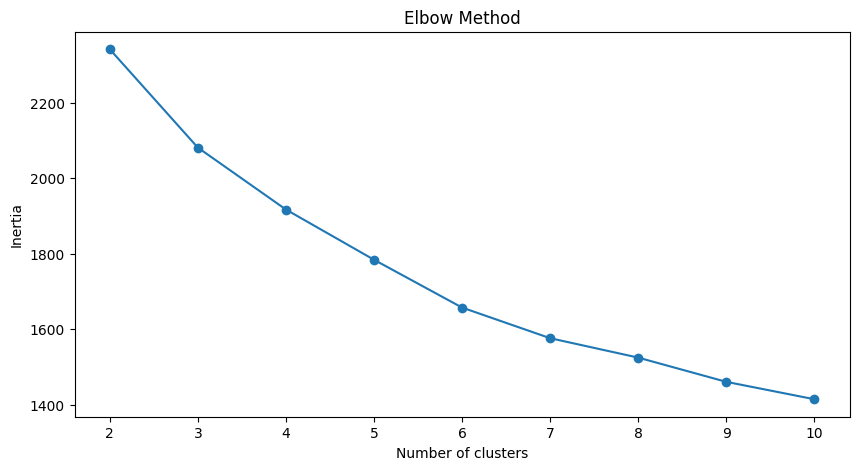

In [406]:

from sklearn.metrics import silhouette_score
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans_labels))

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [187]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans.fit(data_scaled)

# Adding predicted labels to the original data and the scaled data 
data_scaled['KMeans_Labels'] = kmeans.predict(data_scaled)
data_scaled['KMeans_Labels'].value_counts()
# Add the cluster labels as a new column to the original dataset

data_with_labels['KMeans_Labels'] = kmeans.predict(data_scaled)

C:\Users\dvmes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [188]:
data_with_labels.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Response  \
0              172                88            88  ...         1   
1                2                 1             6  ...         0   
2              111                21            42  ...         0   
3               10                 3             5  ...         0   
4               46                27            15  ...         0   

   Family_Size  Years_Since_Registration  Age  Total_Spent  \
0            1                       3.3   59         1617   
1            3                       1.8   62           27   
2            2                       2.4   51          776   
3            3                       1.9   32           53   
4            3                       2.0   35          422   

   Total_Accepted_Offers  AmountPerPurchase  Total_Kids_Teens  KMeans_Labels  \
0                      1          64.680000                 0              2   
1                      0           4.500000                 2              0   
2                      0          36.952381                 0              1   
3                      0           6.625000                 1              0   
4                      0          22.210526                 1              0   

   ClusterLabels  
0              1  
1              0  
2              1  
3              0  
4              0  

[5 rows x 31 columns]

In [214]:
scaler = MinMaxScaler()
dataS_norm = scaler.fit_transform(dataS)

# Применяем KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(dataS_norm)

# Добавление меток кластеров в DataFrame
data_with_labels['KMeans_Labels'] = kmeans.labels_

# Группировка данных по меткам кластеров и расчет средних значений для каждого столбца
cluster_means = data_with_labels.groupby('KMeans_Labels').mean()



# Группировка данных по меткам кластеров и расчет средних значений для каждого столбца
cluster_means = data_with_labels.groupby('KMeans_Labels').mean()
# Add the cluster labels as a new column to the original dataset
#data_with_labels = dataS.copy()
#data_with_labels['ClusterLabels'] = kmeans_labels

C:\Users\dvmes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [215]:
data_with_labels.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Family_Size  \
0              172                88            88  ...            1   
1                2                 1             6  ...            3   
2              111                21            42  ...            2   
3               10                 3             5  ...            3   
4               46                27            15  ...            3   

   Years_Since_Registration  Age  Total_Spent  Total_Accepted_Offers  \
0                       3.3   59         1617                      1   
1                       1.8   62           27                      0   
2                       2.4   51          776                      0   
3                       1.9   32           53                      0   
4                       2.0   35          422                      0   

   AmountPerPurchase  Total_Kids_Teens  KMeans_Labels  ClusterLabels  \
0          64.680000                 0              2              1   
1           4.500000                 2              1              0   
2          36.952381                 0              0              1   
3           6.625000                 1              1              0   
4          22.210526                 1              1              0   

   kmedoLabels  
0            2  
1            1  
2            2  
3            0  
4            0  

[5 rows x 32 columns]

In [216]:
data_with_labels['KMeans_Labels'].value_counts()

1    1202
0     756
2     250
Name: KMeans_Labels, dtype: int64

In [217]:
# Calculating the mean and the median of the original data for each label
mean = data_with_labels.groupby('KMeans_Labels').mean()

median = data_with_labels.groupby('KMeans_Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

#df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

KMeans_Labels                        0             1             2  \
Income                    67475.526455  37438.415141  74715.284000   
Kidhome                       0.052910      0.769551      0.048000   
Teenhome                      0.537037      0.547421      0.212000   
Recency                      51.685185     48.996672     41.404000   
MntWines                    514.887566     80.591514    751.260000   
MntFruits                    48.722222      6.133943     55.436000   
MntMeatProducts             287.375661     35.958403    433.068000   
MntFishProducts              70.567460      8.465058     77.344000   
MntSweetProducts             49.940476      6.308652     57.688000   
MntGoldProds                 70.124339     20.754576     74.844000   
NumDealsPurchases             2.160053      2.566556      1.640000   
NumWebPurchases               5.603175      2.786190      5.748000   
NumCatalogPurchases           4.619048      0.791181      5.804000   
NumStorePurchases             8.621693      3.651414      7.648000   
NumWebVisitsMonth             3.957672      6.467554      3.944000   
AcceptedCmp3                  0.031746      0.068220      0.228000   
AcceptedCmp4                  0.085979      0.017471      0.312000   
AcceptedCmp5                  0.050265      0.000000      0.488000   
AcceptedCmp1                  0.054233      0.002496      0.388000   
AcceptedCmp2                  0.006614      0.001664      0.088000   
Complain                      0.007937      0.010815      0.004000   
Response                      0.005291      0.094010      0.856000   
Family_Size                   2.256614      2.979201      1.772000   
Years_Since_Registration      2.514947      2.448003      2.662800   
Age                          49.880952     45.283694     47.384000   
Total_Spent                1041.617725    158.212146   1449.640000   
Total_Accepted_Offers         0.234127      0.183860      2.360000   
AmountPerPurchase            50.815040     12.940770     72.116445   
Total_Kids_Teens              0.589947      1.316972      0.260000   
ClusterLabels                 1.113757      0.020799      1.540000   
kmedoLabels                   1.968254      0.516639      2.000000   

KMeans_Labels                        0          1            2  
Income                    67432.500000  37070.000  78211.00000  
Kidhome                       0.000000      1.000      0.00000  
Teenhome                      1.000000      1.000      0.00000  
Recency                      54.000000     49.000     36.00000  
MntWines                    483.000000     29.000    769.50000  
MntFruits                    33.000000      3.000     37.50000  
MntMeatProducts             220.000000     18.000    417.00000  
MntFishProducts              51.500000      4.000     59.00000  
MntSweetProducts             35.000000      3.000     42.00000  
MntGoldProds                 53.000000     12.000     49.00000  
NumDealsPurchases             2.000000      2.000      1.00000  
NumWebPurchases               5.000000      2.000      5.00000  
NumCatalogPurchases           4.000000      1.000      6.00000  
NumStorePurchases             9.000000      3.000      7.00000  
NumWebVisitsMonth             4.000000      7.000      3.50000  
AcceptedCmp3                  0.000000      0.000      0.00000  
AcceptedCmp4                  0.000000      0.000      0.00000  
AcceptedCmp5                  0.000000      0.000      0.00000  
AcceptedCmp1                  0.000000      0.000      0.00000  
AcceptedCmp2                  0.000000      0.000      0.00000  
Complain                      0.000000      0.000      0.00000  
Response                      0.000000      0.000      1.00000  
Family_Size                   2.000000      3.000      2.00000  
Years_Since_Registration      2.500000      2.400      2.80000  
Age                          50.000000     44.000     46.50000  
Total_Spent                1005.500000     77.000   1490.00000  
Tota

### **Cluster Profiling**

#### Cluster 0:

- **Moderate income, with an average of 67,475.53.**
- **Very few kids at home (0.05) and a higher number of teenagers at home (0.54).**
- **High spending on all product categories, with a total spent of 1,041.62.**
- **High amount per purchase (50.82).**
- **Low number of web visits per month (3.96).**
- **Moderate acceptance rates for marketing campaigns.**
- **Smaller family size (2.26) and a moderate total of kids and teens (0.59).**
- **Oldest age group, with an average age of 49.88.**

#### Cluster 1:

- **Lowest income, with an average of 37,438.42.**
- **Higher number of kids at home (0.77) and a similar number of teenagers at home (0.55) compared to Cluster 0.**
- **Less spending on all product categories, with the lowest total spent (158.21) among the clusters.**
- **Lowest amount per purchase (12.94).**
- **Highest number of web visits per month (6.47).**
- **Lowest acceptance rates for marketing campaigns.**
- **Largest family size (2.98) and highest total kids and teens (1.32) among the clusters.**
- **Middle-aged group, with an average age of 45.28.**

#### Cluster 2:

- **Highest income, with an average of 74,715.28.**
- **Very few kids at home (0.05) and the lowest number of teenagers at home (0.21) among the clusters.**
- **Highest spending on all product categories, with the highest total spent (1,449.64) among the clusters.**
- **Highest amount per purchase (72.12).**
- **Low number of web visits per month (3.94).**
- **Highest acceptance rates for marketing campaigns.**
- **Smallest family size (1.77) and lowest total kids and teens (0.26) among the clusters.**
- **Youngest age group, with an average age of 47.38.**

#### Summary:

- ***Cluster 0 represents moderate-income families with very few children at home, more teenagers, higher spending on products, and a moderate acceptance rate for marketing campaigns. This group also has the oldest age group.***
- ***Cluster 1 represents low-income families with more children at home, a balanced number of teenagers, lower spending on products, and the lowest acceptance rate for marketing campaigns. This group also has the largest family size and the highest total kids and teens.***
- ***Cluster 2 represents high-income families with the smallest family size, very few kids at home, and the lowest number of teenagers, spending the most on products, and having the highest acceptance rate for marketing campaigns. This group also has the youngest age group.***

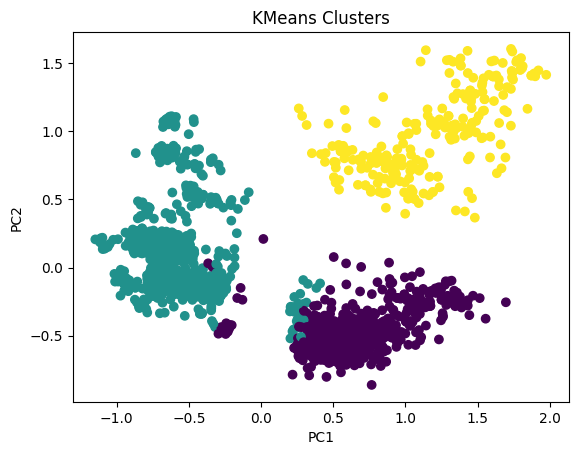

In [218]:
# Apply PCA
pca = PCA(n_components=2)
scaler = MinMaxScaler()
data_scaled_N = pd.DataFrame(scaler.fit_transform(data_with_labels), columns = data_with_labels.columns)

pca.fit(data_scaled_N)
pca_df = pd.DataFrame(pca.transform(data_scaled_N), columns=['PC1', 'PC2'])

# Plot the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data_with_labels['KMeans_Labels'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

C:\Users\dvmes\AppData\Local\Temp\ipykernel_5196\3908337906.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

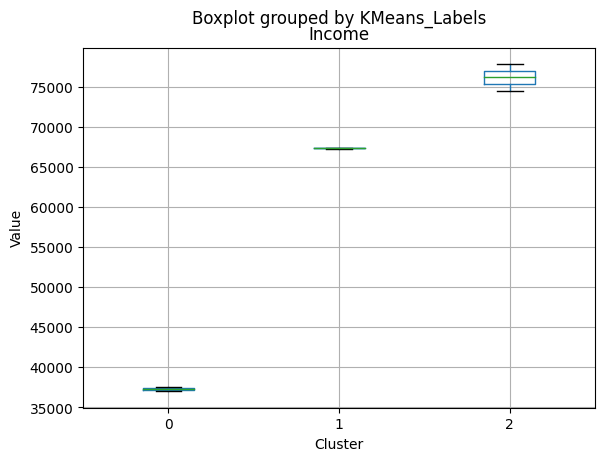

<Figure size 640x480 with 0 Axes>

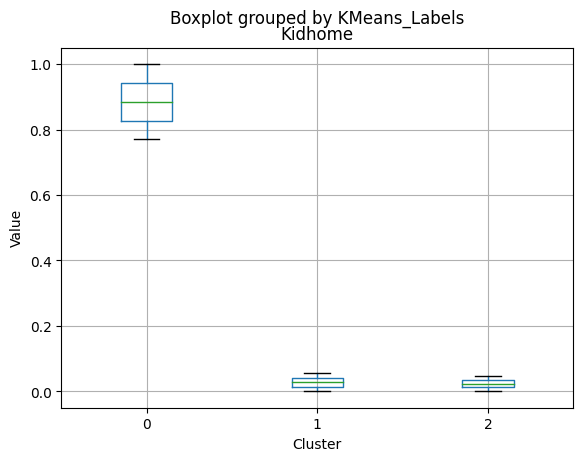

<Figure size 640x480 with 0 Axes>

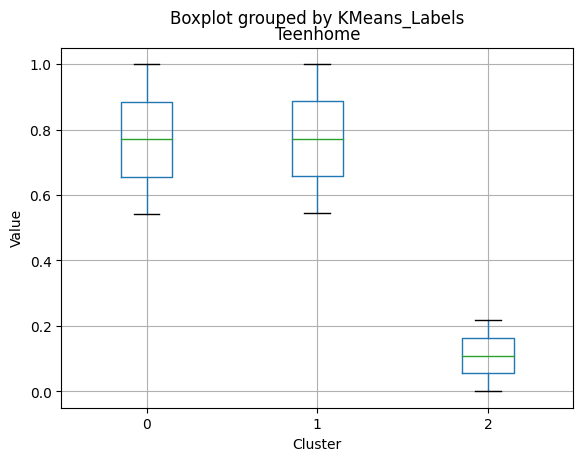

<Figure size 640x480 with 0 Axes>

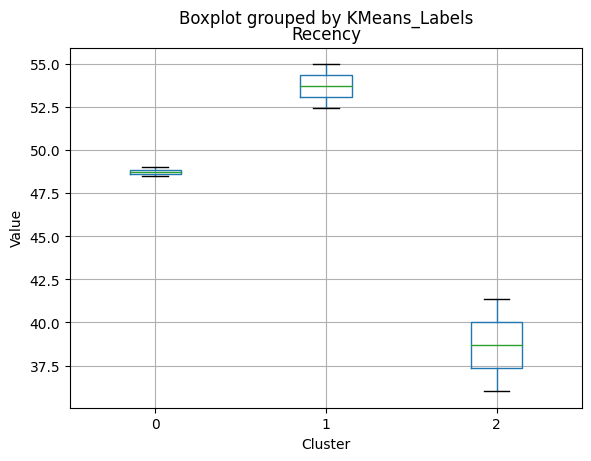

<Figure size 640x480 with 0 Axes>

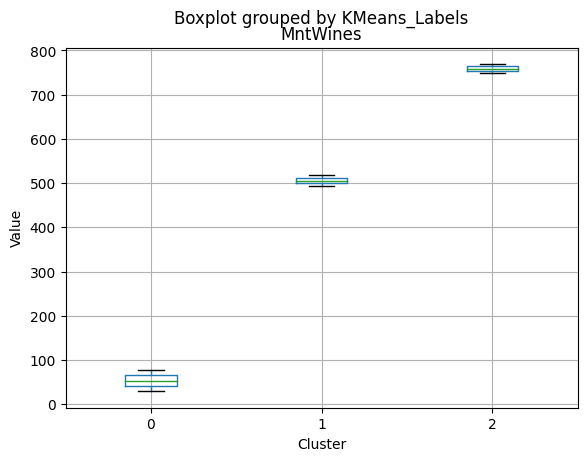

<Figure size 640x480 with 0 Axes>

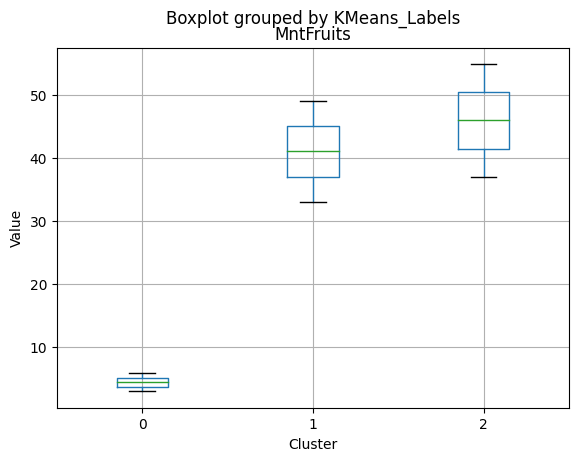

<Figure size 640x480 with 0 Axes>

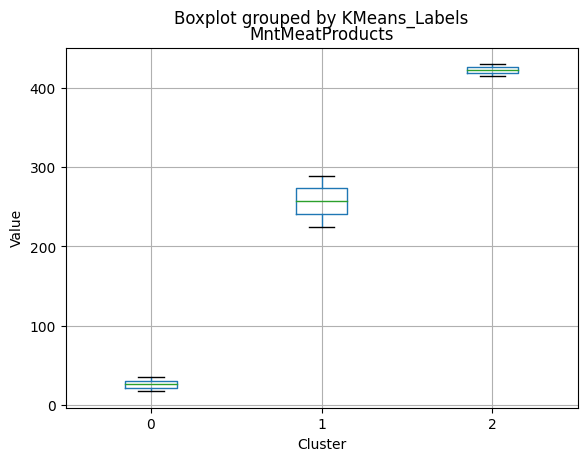

<Figure size 640x480 with 0 Axes>

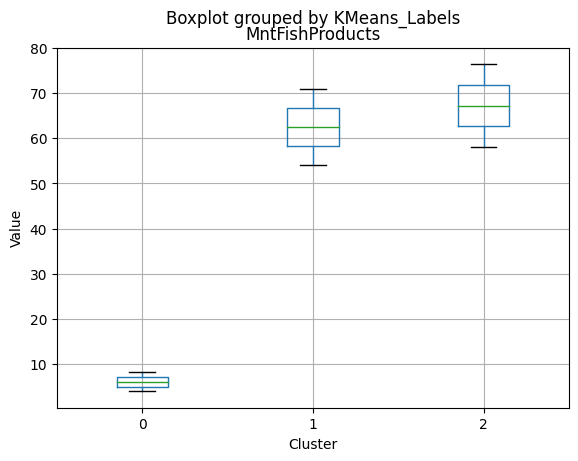

<Figure size 640x480 with 0 Axes>

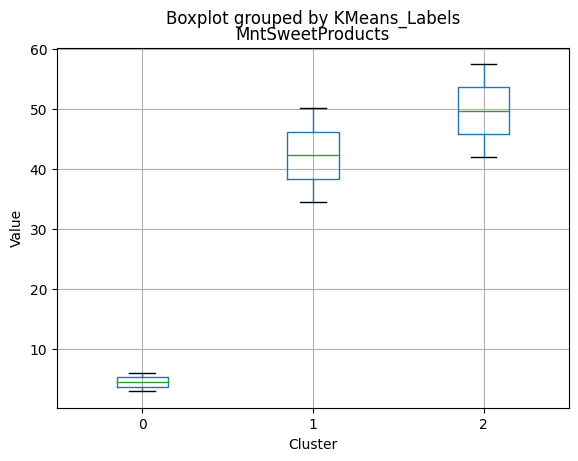

<Figure size 640x480 with 0 Axes>

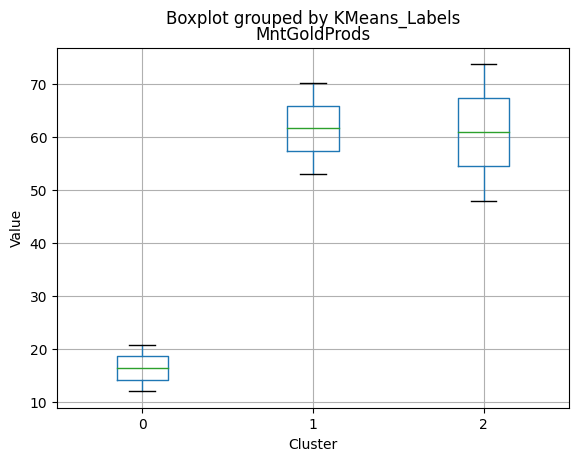

<Figure size 640x480 with 0 Axes>

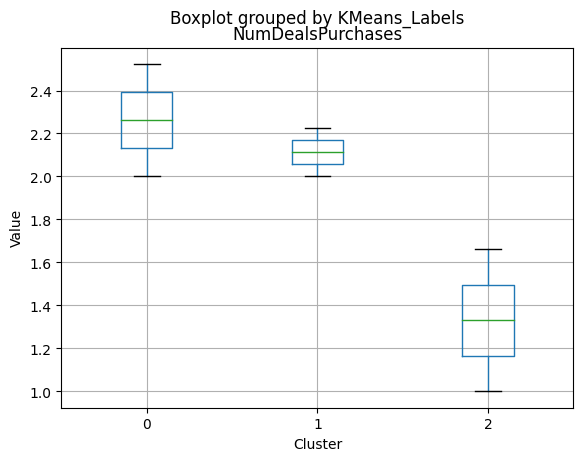

<Figure size 640x480 with 0 Axes>

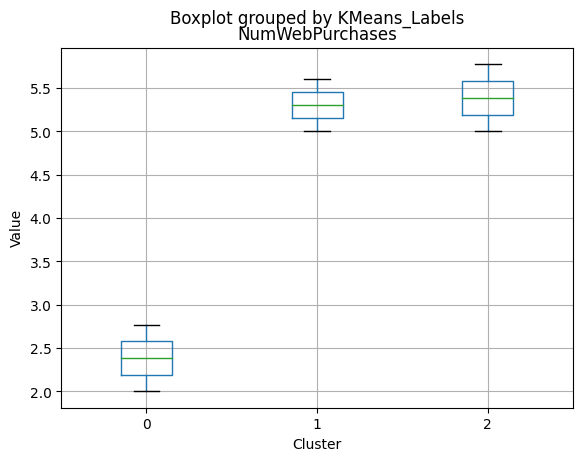

<Figure size 640x480 with 0 Axes>

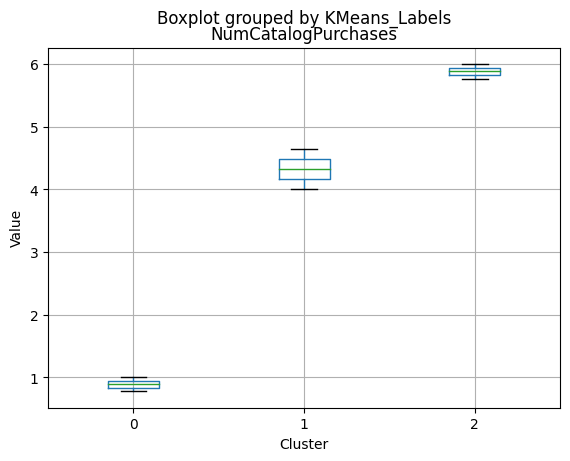

<Figure size 640x480 with 0 Axes>

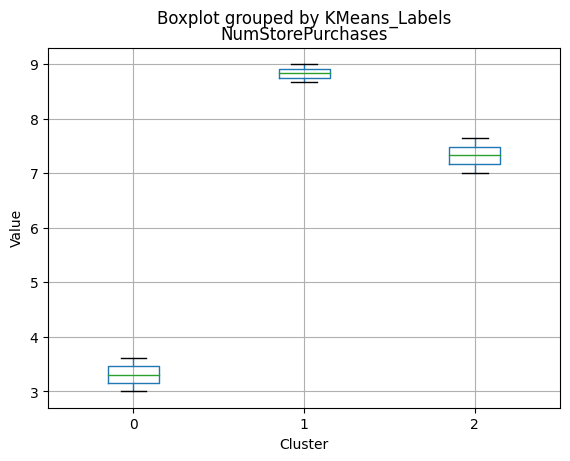

<Figure size 640x480 with 0 Axes>

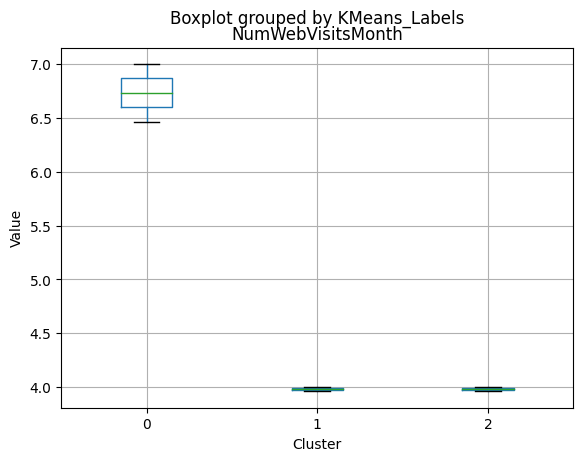

<Figure size 640x480 with 0 Axes>

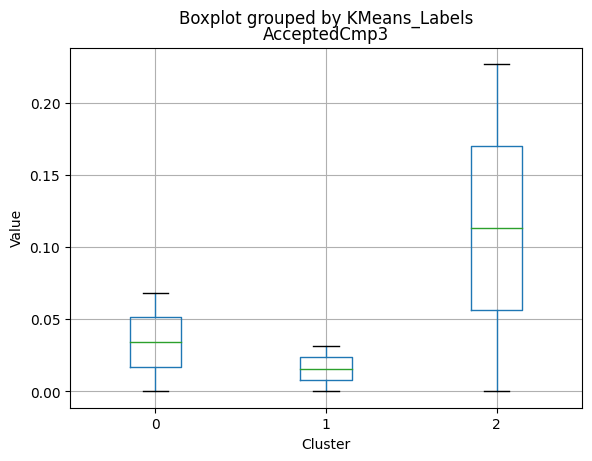

<Figure size 640x480 with 0 Axes>

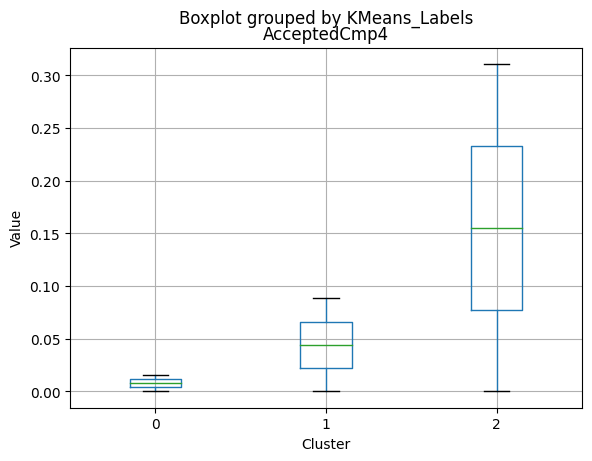

<Figure size 640x480 with 0 Axes>

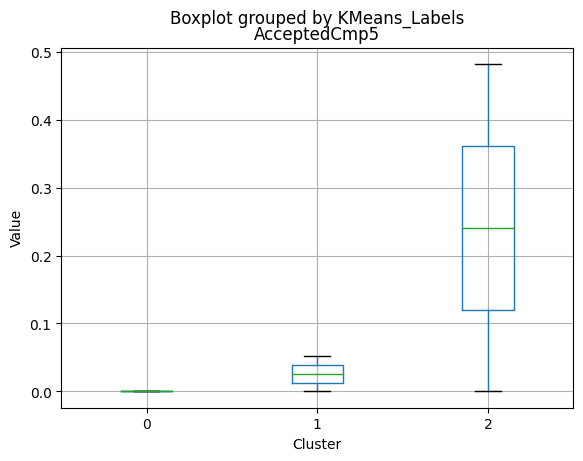

<Figure size 640x480 with 0 Axes>

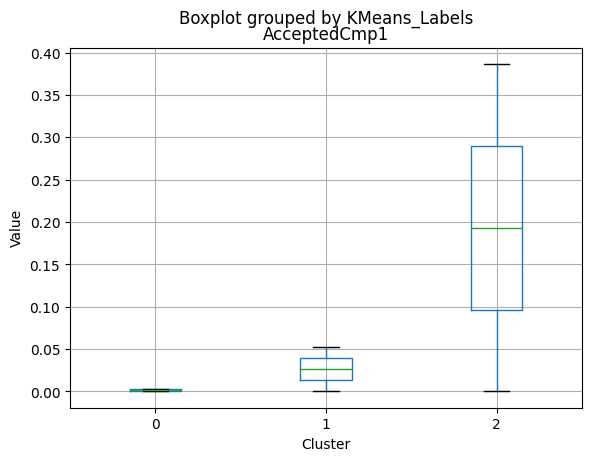

<Figure size 640x480 with 0 Axes>

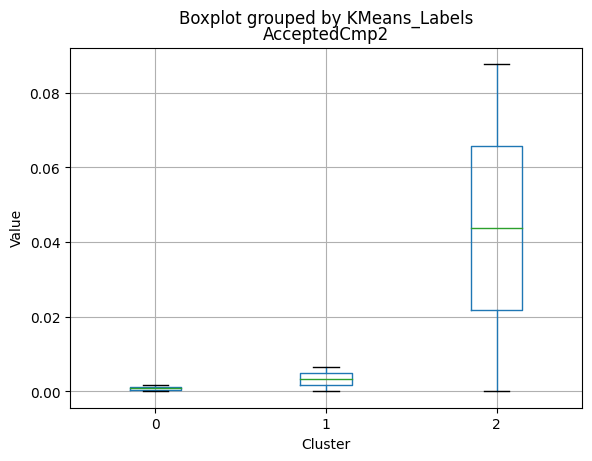

<Figure size 640x480 with 0 Axes>

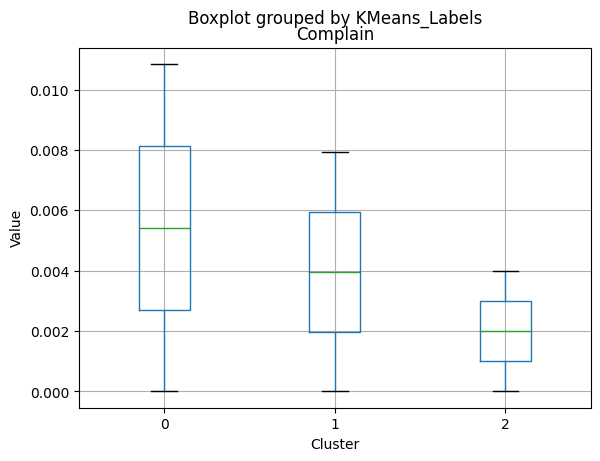

<Figure size 640x480 with 0 Axes>

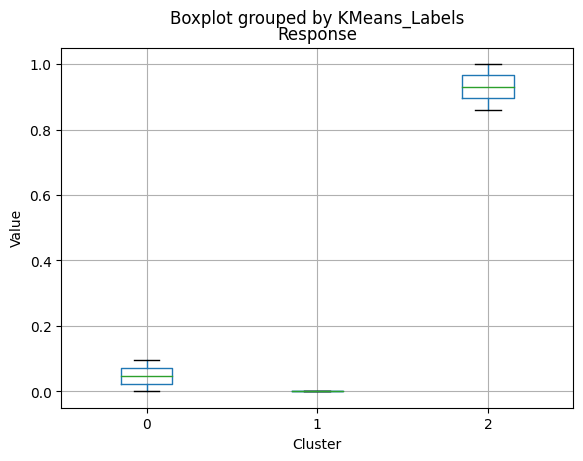

<Figure size 640x480 with 0 Axes>

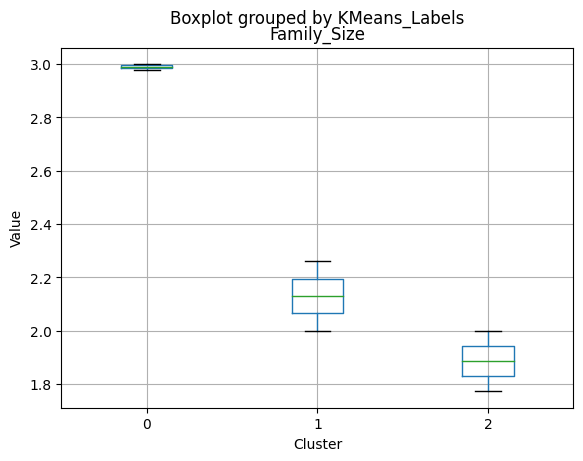

<Figure size 640x480 with 0 Axes>

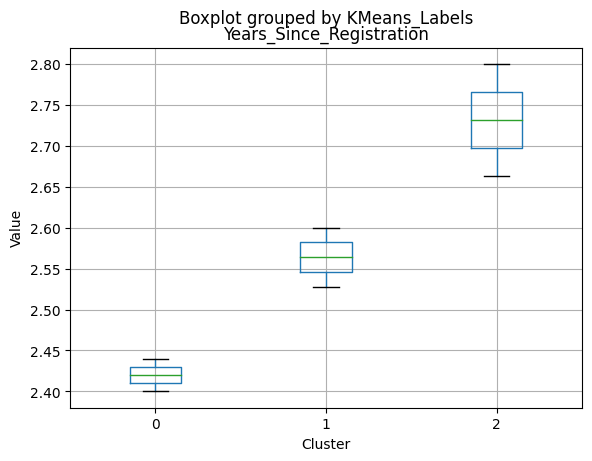

<Figure size 640x480 with 0 Axes>

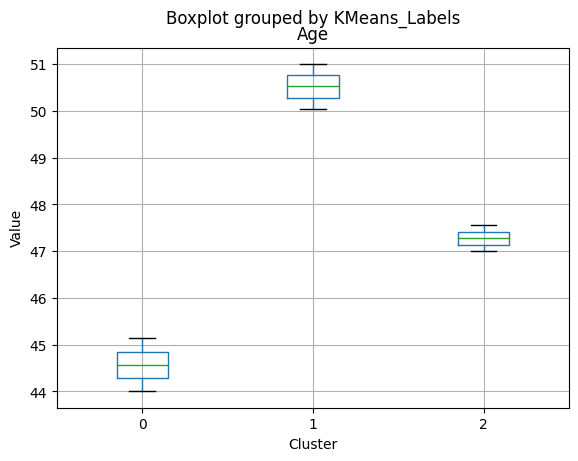

<Figure size 640x480 with 0 Axes>

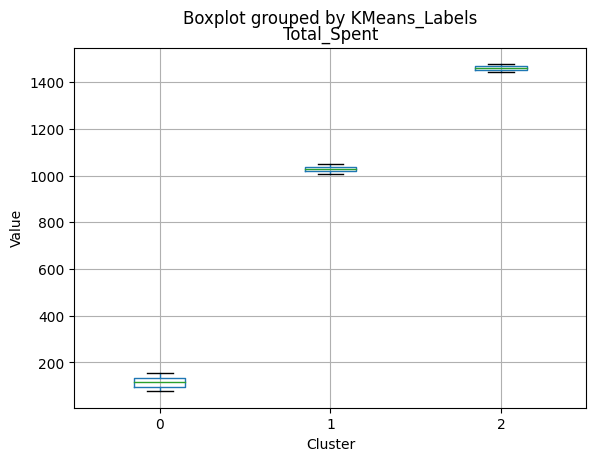

<Figure size 640x480 with 0 Axes>

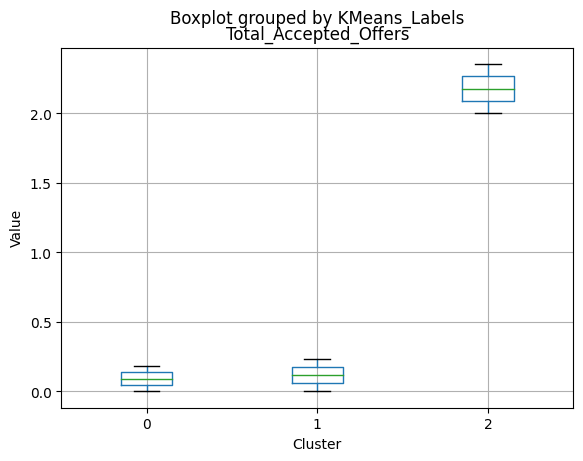

<Figure size 640x480 with 0 Axes>

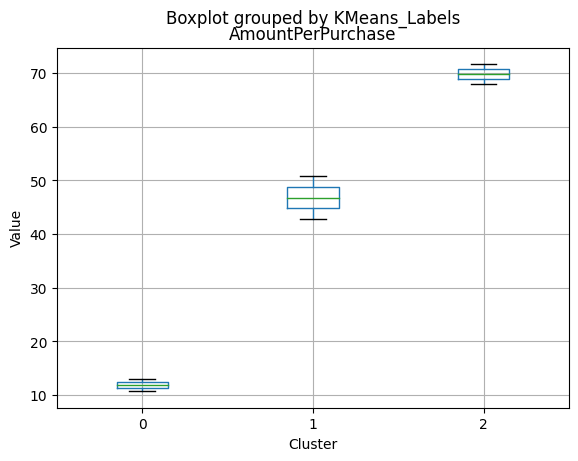

<Figure size 640x480 with 0 Axes>

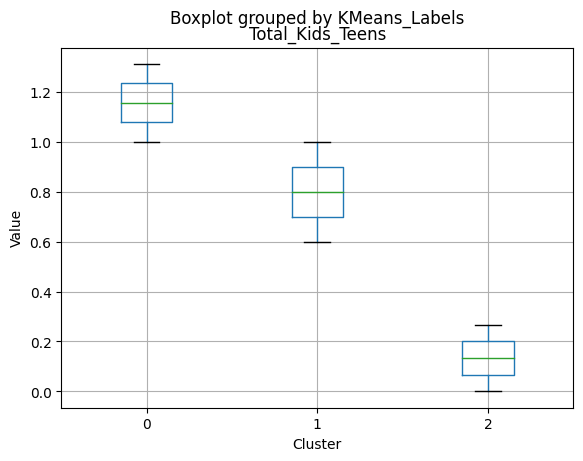

<Figure size 640x480 with 0 Axes>

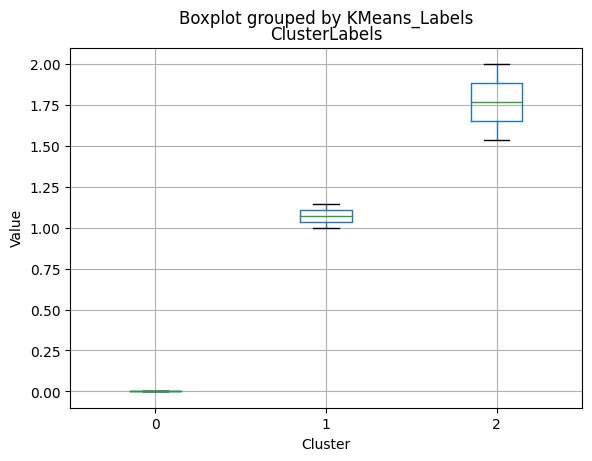

In [191]:
# For each variable
for col in df_kmeans.columns:
    # Create a plot for each cluster
    plt.figure()
    df_kmeans.boxplot(column=[col], by='KMeans_Labels')
    plt.title(col)
    plt.xlabel('Cluster')
    plt.ylabel('Value')

## **K-Medoids**

In [244]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)

kmedo.fit(data_scaled)

data_with_labels['kmedoLabels'] = kmedo.predict(data_scaled)

#data['kmedoLabels'] = kmedo.predict(data_scaled)

In [245]:
data_with_labels.kmedoLabels.value_counts()

2    1009
0     608
1     591
Name: kmedoLabels, dtype: int64

In [246]:
# Calculating the mean and the median of the original data for each label
mean = data_with_labels.groupby('kmedoLabels').mean()

median = data_with_labels.groupby('kmedoLabels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

#df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

kmedoLabels                          0             1             2        0  \
Income                    31127.623355  44047.563452  69111.584737  30324.5   
Kidhome                       0.809211      0.729272      0.053518      1.0   
Teenhome                      0.044408      1.052453      0.463826      0.0   
Recency                      48.883224     48.133672     49.703667     48.0   
MntWines                     39.486842    117.236887    575.466799     14.0   
MntFruits                     6.702303      5.121827     50.509415      3.0   
MntMeatProducts              30.861842     38.477157    324.322101     15.0   
MntFishProducts               8.949013      7.563452     72.298315      4.0   
MntSweetProducts              6.735197      5.461929     51.969277      4.0   
MntGoldProds                 18.108553     23.521151     71.120912     11.0   
NumDealsPurchases             1.960526      3.101523      2.084242      1.0   
NumWebPurchases               2.328947      3.223350      5.650149      2.0   
NumCatalogPurchases           0.578947      0.979695      4.918731      0.0   
NumStorePurchases             3.180921      4.050761      8.415263      3.0   
NumWebVisitsMonth             6.791118      6.131980      3.963330      7.0   
AcceptedCmp3                  0.082237      0.054146      0.080278      0.0   
AcceptedCmp4                  0.001645      0.030457      0.143707      0.0   
AcceptedCmp5                  0.000000      0.000000      0.158573      0.0   
AcceptedCmp1                  0.000000      0.006768      0.135778      0.0   
AcceptedCmp2                  0.000000      0.003384      0.026759      0.0   
Complain                      0.011513      0.010152      0.006938      0.0   
Response                      0.111842      0.077834      0.215064      0.0   
Family_Size                   2.493421      3.478849      2.138751      3.0   
Years_Since_Registration      2.433882      2.445008      2.561645      2.4   
Age                          38.899671     51.546531     49.427156     38.0   
Total_Spent                 110.843750    197.382403   1145.686819     63.0   
Total_Accepted_Offers         0.195724      0.172589      0.760159      0.0   
AmountPerPurchase            11.447391     14.526143     55.951559      9.0   
Total_Kids_Teens              0.853618      1.781726      0.517344      1.0   
KMeans_Labels                 0.996711      0.966159      0.520317      1.0   
ClusterLabels                 0.000000      0.000000      1.240833      0.0   
HCLabels                      2.996711      3.000000      0.753221      3.0   

kmedoLabels                        1            2  
Income                    44421.0000  69661.00000  
Kidhome                       1.0000      0.00000  
Teenhome                      1.0000      0.00000  
Recency                      49.0000     51.00000  
MntWines                     64.0000    529.00000  
MntFruits                     2.0000     34.00000  
MntMeatProducts              22.0000    255.00000  
MntFishProducts               3.0000     54.00000  
MntSweetProducts              2.0000     35.00000  
MntGoldProds                 12.0000     51.00000  
NumDealsPurchases             2.0000      1.00000  
NumWebPurchases               3.0000      5.00000  
NumCatalogPurchases           1.0000      4.00000  
NumStorePurchases             4.0000      8.00000  
NumWebVisitsMonth             6.0000      4.00000  
AcceptedCmp3                  0.0000      0.00000  
AcceptedCmp4                  0.0000      0.00000  
AcceptedCmp5                  0.0000      0.00000  
AcceptedCmp1                  0.0000      0.00000  
AcceptedCmp2                  0.0000      0.00000  
Complain                      0.0000      0.00000  
Response                      0.0000      0.00000  
Family_Size                   3.0000      2.00000  
Years_Since_Registration      2.4000      2.60000  
Age                          51.0000     50.00000  
Total_Spent                 122.0000   1

### **Cluster Profiling**

#### Cluster 0:

- **Lowest income, with an average of 31,127.62..**
- **Higher number of kids at home (0.81) and very few teenagers at home (0.04)..**
- **Less spending on all product categories, with the lowest total spent (110.84) among the clusters..**
- **Lowest amount per purchase (11.45)..**
- **Highest number of web visits per month (6.79)..**
- **Lowest acceptance rates for marketing campaigns..**
- **Largest family size (2.49) and higher total kids and teens (0.85)..**
- **Youngest age group, with an average age of 38.90.**

#### Cluster 1:

- **Middle income, with an average of 44,047.56.**
- **Similar number of kids at home (0.73) compared to Cluster 0, but a higher number of teenagers at home (1.05).**
- **Moderate spending on all product categories, with a total spent of 197.38.**
- **Moderate amount per purchase (14.53).**
- **Moderate number of web visits per month (6.13).**
- **Moderate acceptance rates for marketing campaigns.**
- **Oldest age group, with an average age of 51.55.**
- **Larger family size (3.48) and highest total kids and teens (1.78) among the clusters.**
- **Oldest age group, with an average age of 51.55.**

#### Cluster 2:

- **Highest income, with an average of 69,111.58.**
- **Very few kids at home (0.05) and a moderate number of teenagers at home (0.46).**
- **Highest spending on all product categories, with the highest total spent (1,145.69) among the clusters.**
- **Highest amount per purchase (55.95).**
- **Lowest number of web visits per month (3.96).**
- **Highest acceptance rates for marketing campaigns.**
- **Smallest family size (2.14) and lowest total kids and teens (0.52) among the clusters.**
- **Middle-aged group, with an average age of 49.43.**

#### Summary
- ***Cluster 0 represents lower-income families with more children at home, fewer teenagers, spending less on products, and having a lower acceptance rate for marketing campaigns.***
- ***Cluster 1 represents middle-income families with a balanced number of kids and teenagers at home, moderate spending on products, and a moderate acceptance rate for marketing campaigns. This group also has the largest family size and the oldest age group.***
- ***Cluster 2 represents high-income families with the smallest family size and very few kids at home, spending the most on products, and having the highest acceptance rate for marketing campaigns.***

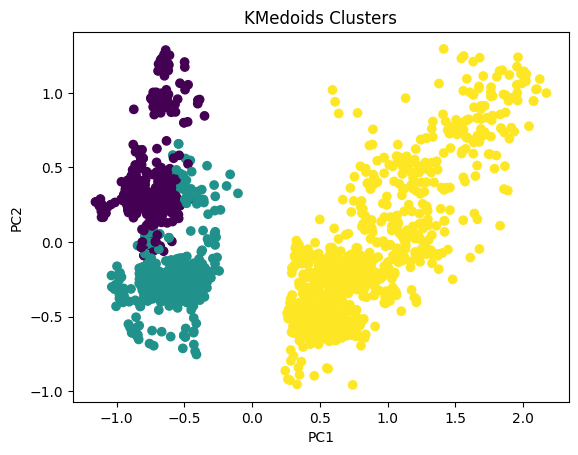

In [208]:
# Apply PCA
pca = PCA(n_components=2)
scaler = MinMaxScaler()
data_scaled_N = pd.DataFrame(scaler.fit_transform(data_with_labels), columns = data_with_labels.columns)

pca.fit(data_scaled_N)
pca_df = pd.DataFrame(pca.transform(data_scaled_N), columns=['PC1', 'PC2'])

# Plot the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data_with_labels['kmedoLabels'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMedoids Clusters')
plt.show()

C:\Users\dvmes\AppData\Local\Temp\ipykernel_5196\4071859610.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

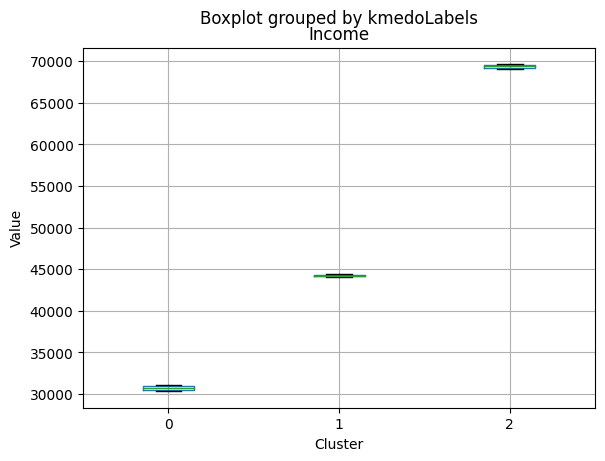

<Figure size 640x480 with 0 Axes>

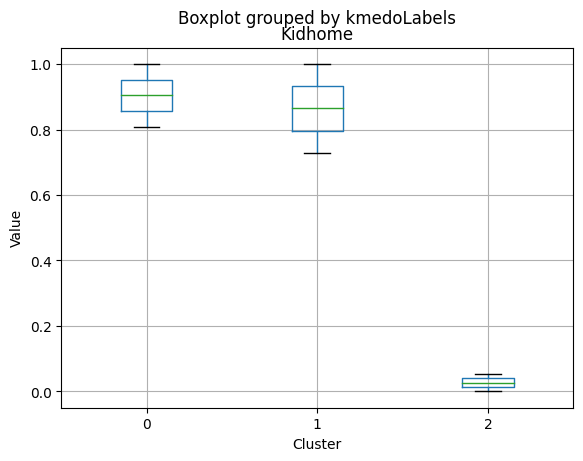

<Figure size 640x480 with 0 Axes>

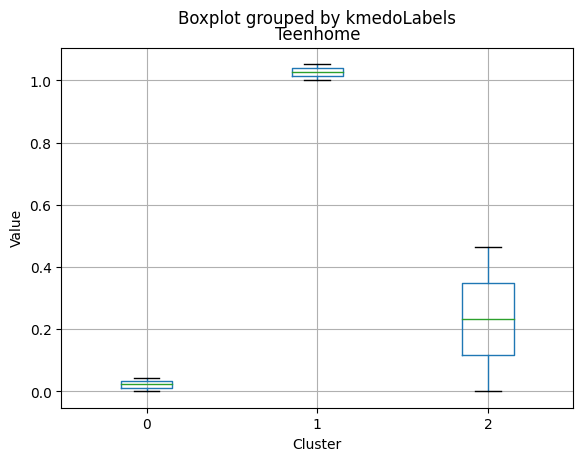

<Figure size 640x480 with 0 Axes>

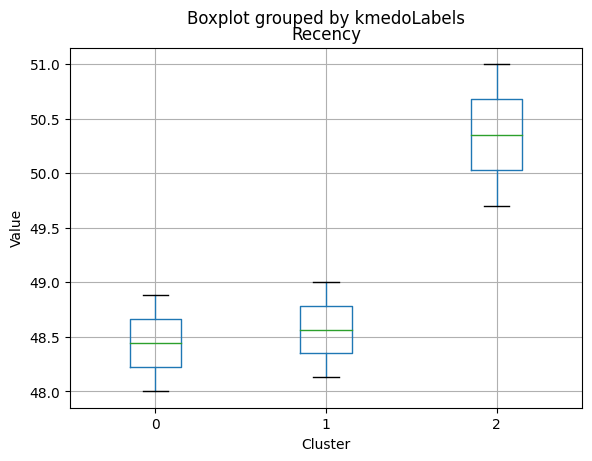

<Figure size 640x480 with 0 Axes>

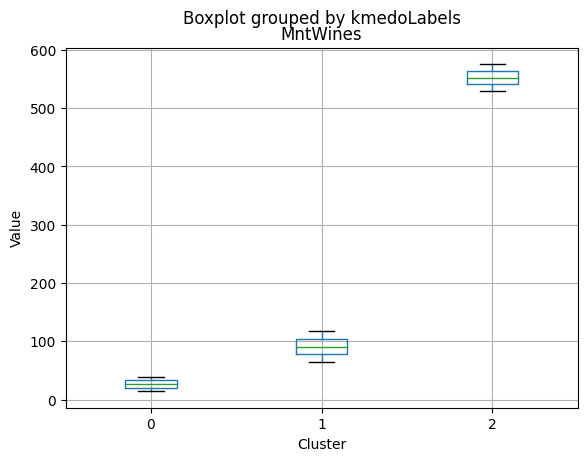

<Figure size 640x480 with 0 Axes>

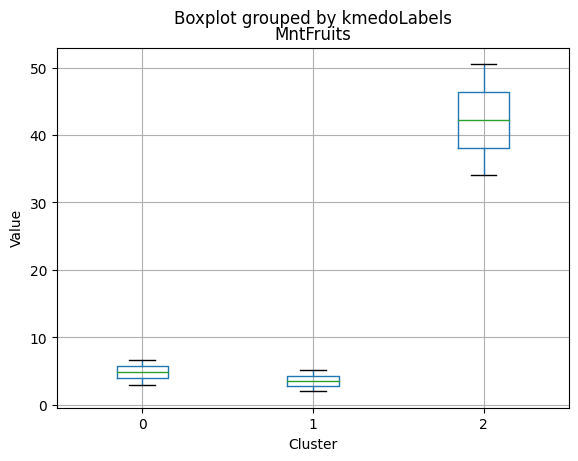

<Figure size 640x480 with 0 Axes>

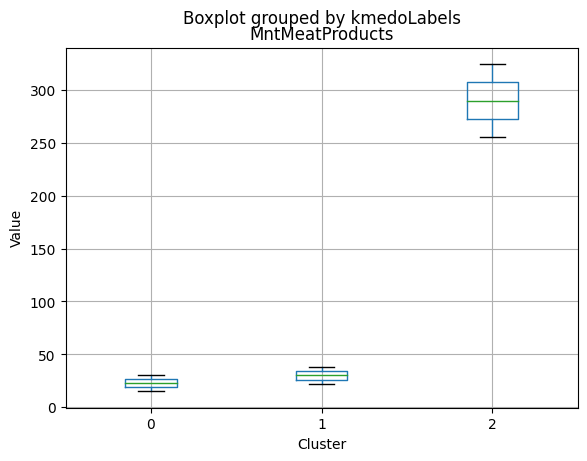

<Figure size 640x480 with 0 Axes>

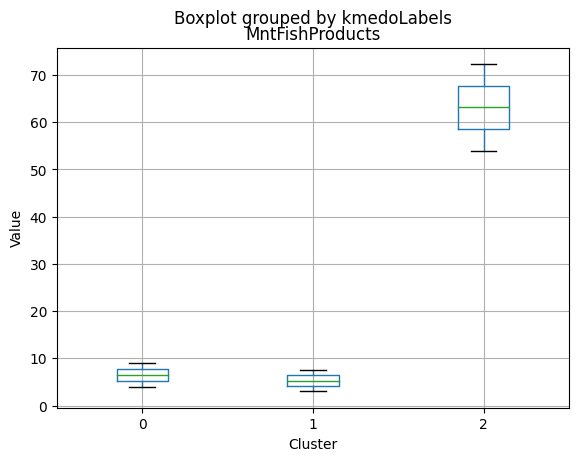

<Figure size 640x480 with 0 Axes>

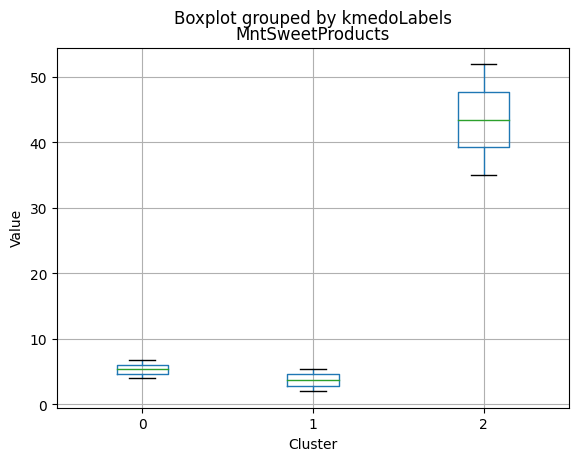

<Figure size 640x480 with 0 Axes>

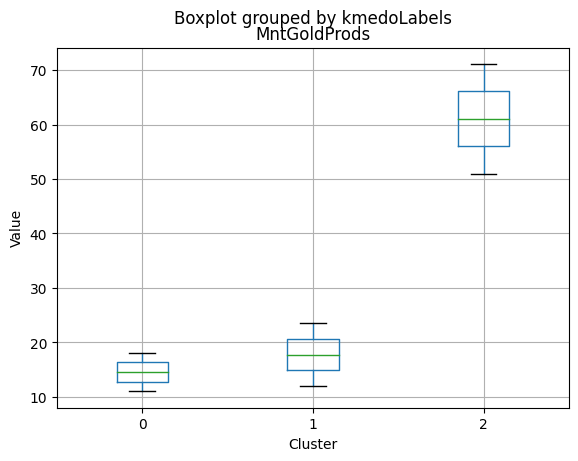

<Figure size 640x480 with 0 Axes>

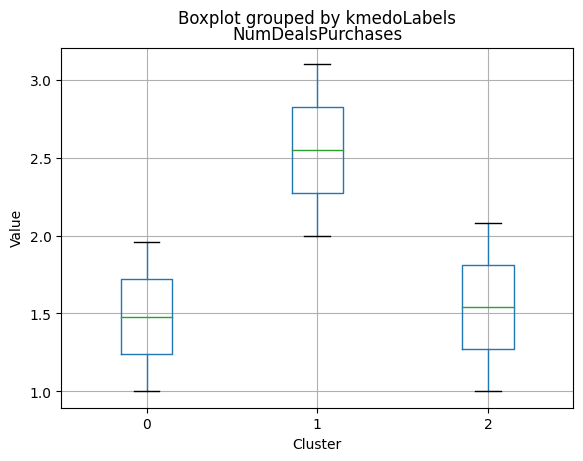

<Figure size 640x480 with 0 Axes>

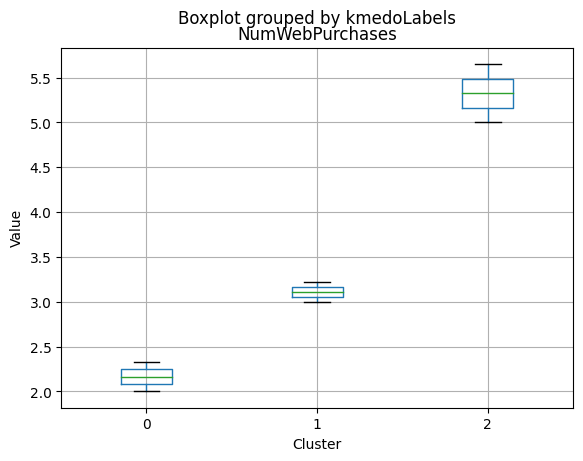

<Figure size 640x480 with 0 Axes>

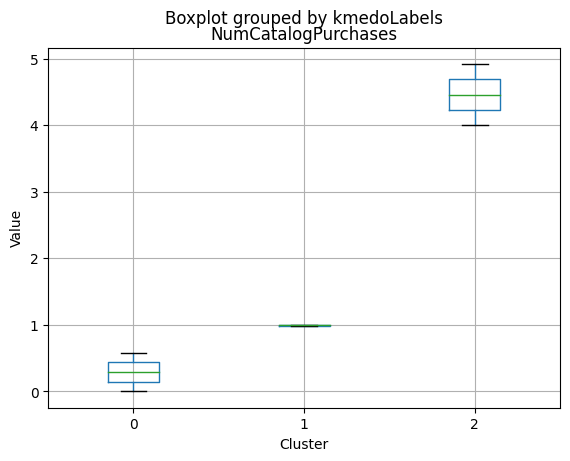

<Figure size 640x480 with 0 Axes>

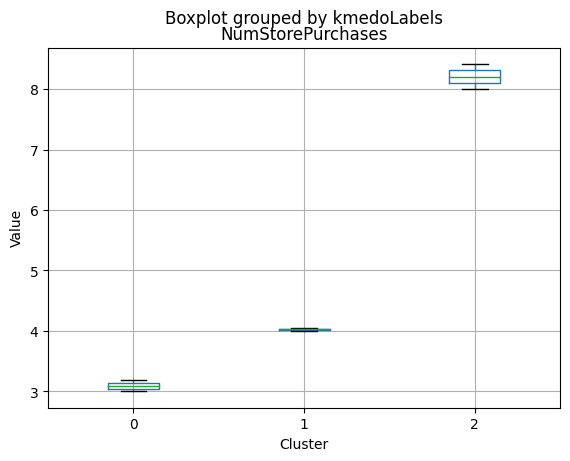

<Figure size 640x480 with 0 Axes>

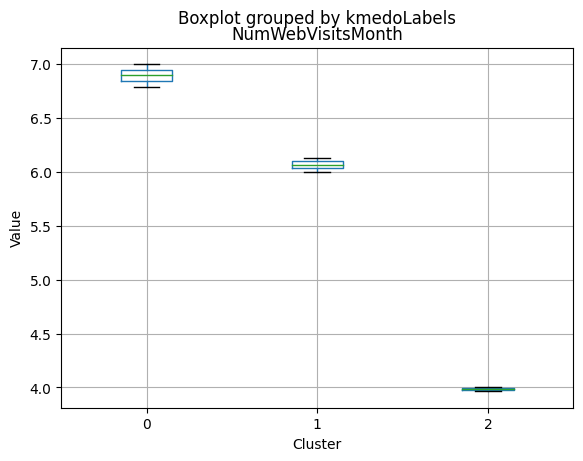

<Figure size 640x480 with 0 Axes>

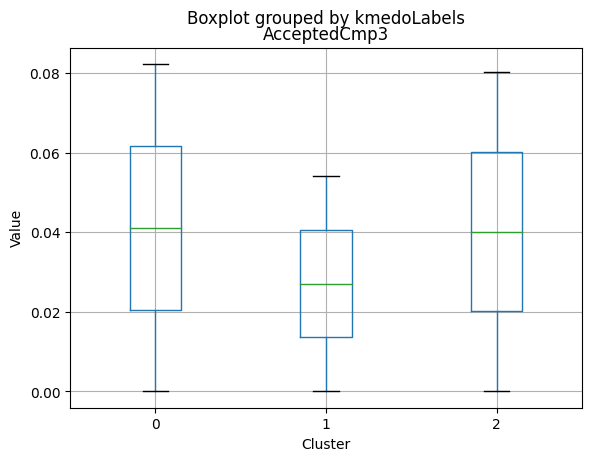

<Figure size 640x480 with 0 Axes>

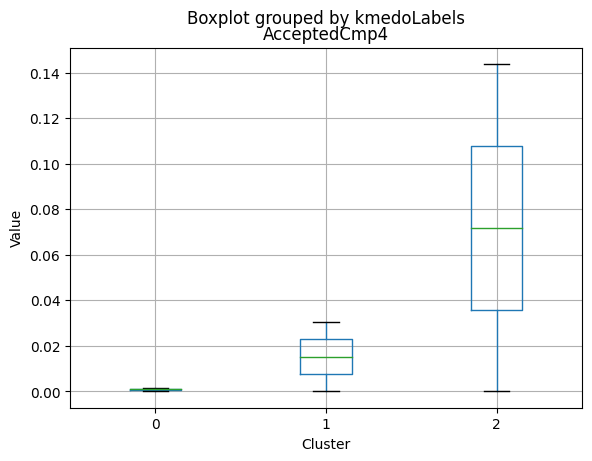

<Figure size 640x480 with 0 Axes>

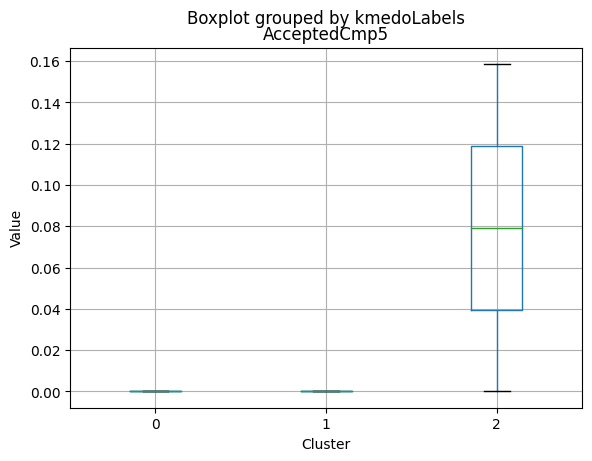

<Figure size 640x480 with 0 Axes>

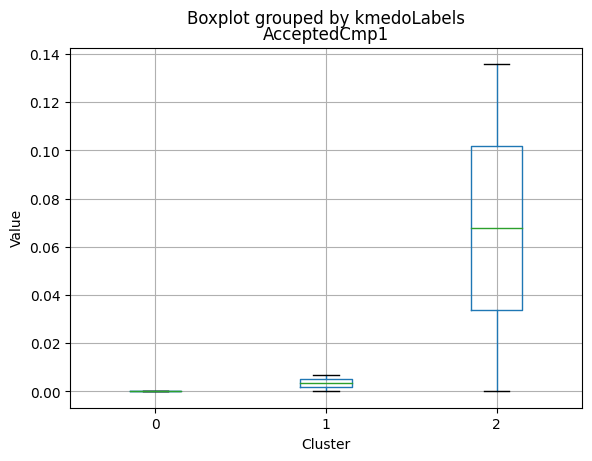

<Figure size 640x480 with 0 Axes>

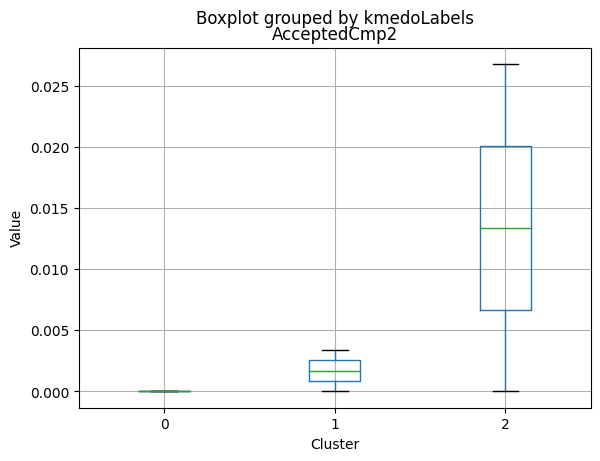

<Figure size 640x480 with 0 Axes>

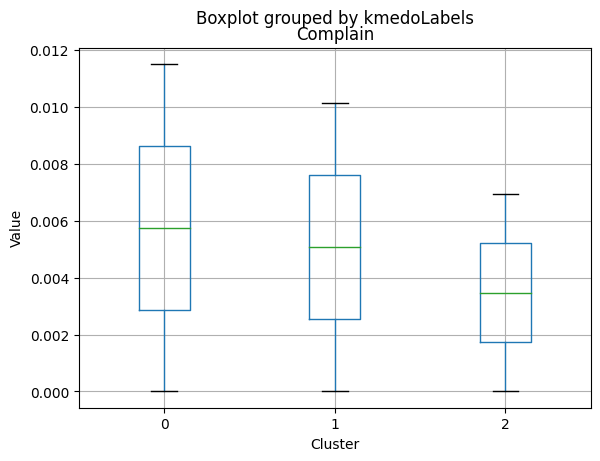

<Figure size 640x480 with 0 Axes>

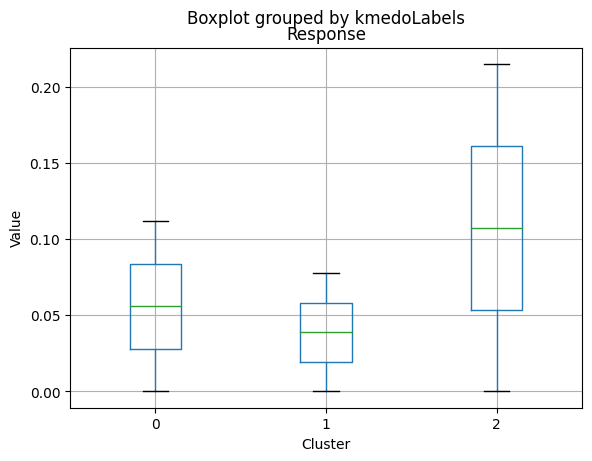

<Figure size 640x480 with 0 Axes>

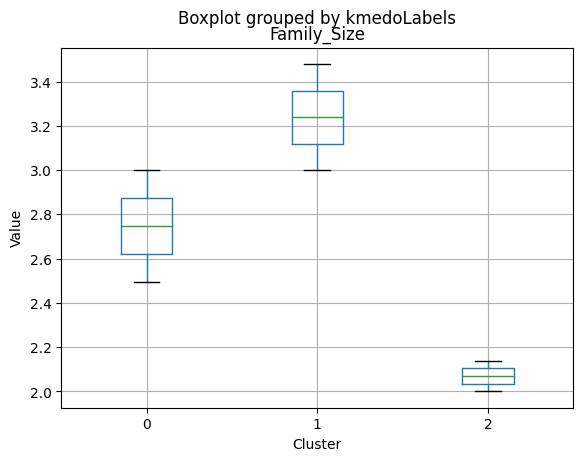

<Figure size 640x480 with 0 Axes>

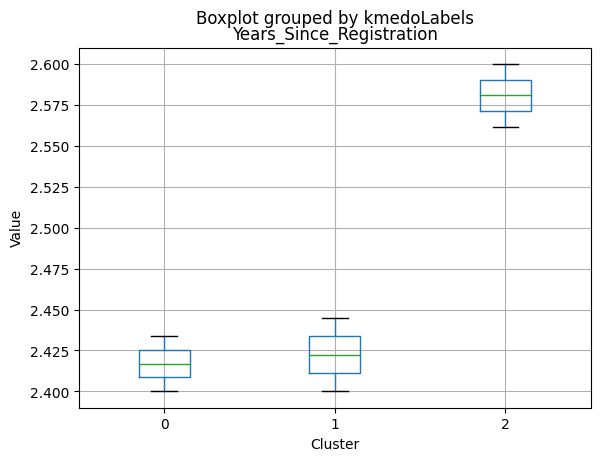

<Figure size 640x480 with 0 Axes>

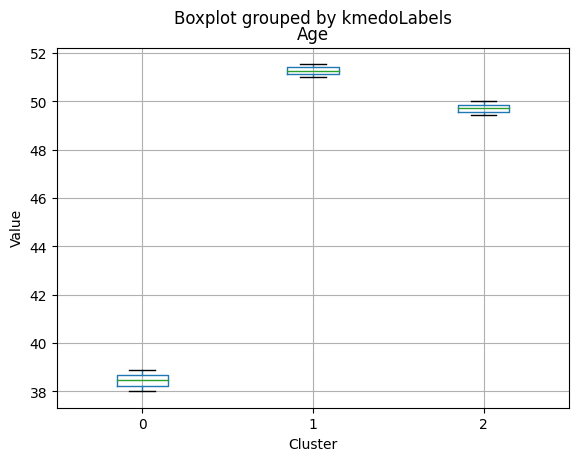

<Figure size 640x480 with 0 Axes>

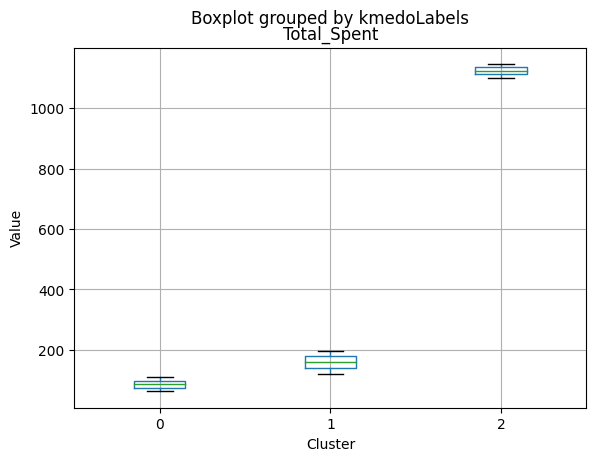

<Figure size 640x480 with 0 Axes>

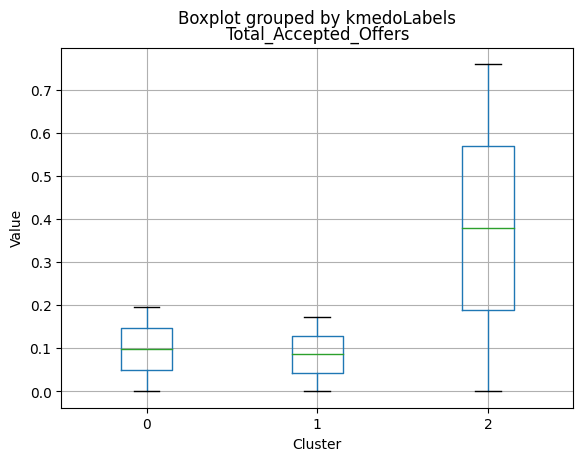

<Figure size 640x480 with 0 Axes>

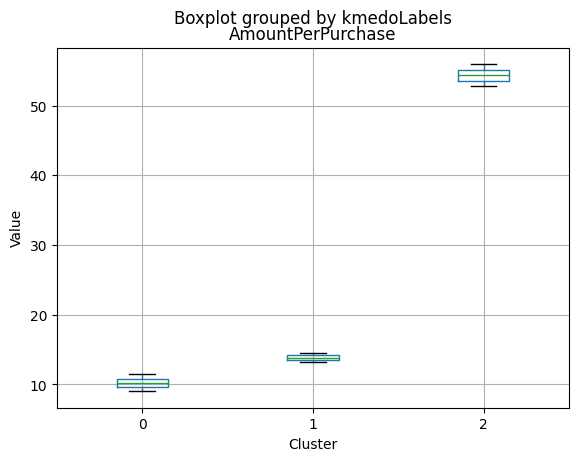

<Figure size 640x480 with 0 Axes>

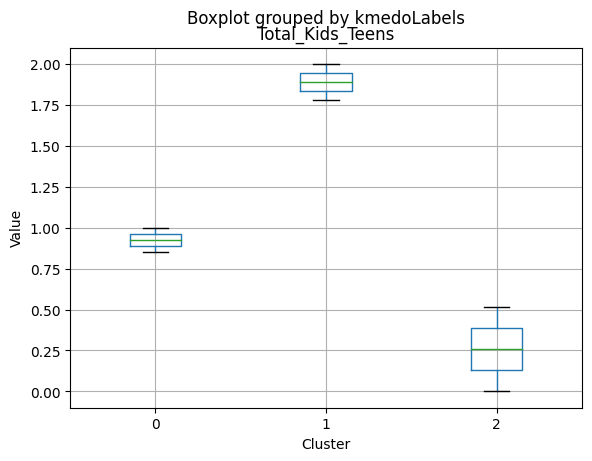

<Figure size 640x480 with 0 Axes>

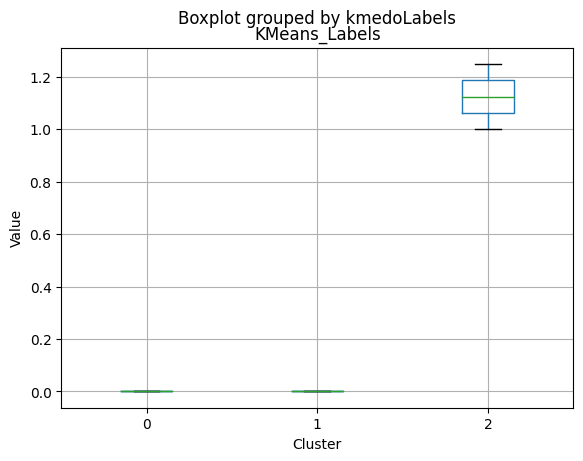

<Figure size 640x480 with 0 Axes>

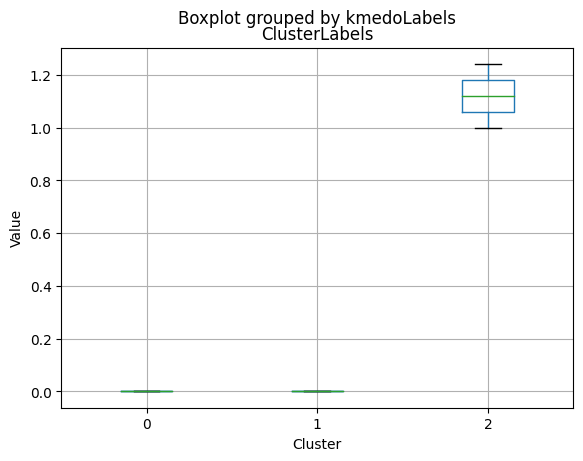

In [200]:
# For each variable
for col in df_kmeans.columns:
    #  Creating a boxplot chart for each cluster
    plt.figure()
    df_kmeans.boxplot(column=[col], by='kmedoLabels')
    plt.title(col)
    plt.xlabel('Cluster')
    plt.ylabel('Value')

## **Gaussian Mixture Model**

In [340]:
gmm = GaussianMixture(n_components = 3, random_state = 1)

gmm.fit(data_scaled)

data_with_labels['GmmLabels'] = gmm.predict(data_scaled)


In [341]:
data_with_labels.GmmLabels.value_counts()

0    1190
1     741
2     277
Name: GmmLabels, dtype: int64

In [342]:
# Calculating the mean and the median of the original data for each label
mean = data_with_labels.groupby('GmmLabels').mean()

median = data_with_labels.groupby('GmmLabels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

#df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

GmmLabels                            0             1             2  \
Income                    37439.544538  65589.304993  77749.317690   
Kidhome                       0.768908      0.066127      0.046931   
Teenhome                      0.536975      0.572200      0.194946   
Recency                      48.547899     50.240216     48.083032   
MntWines                     76.266387    485.896086    805.541516   
MntFruits                     5.913445     49.273954     52.407942   
MntMeatProducts              32.886555    280.990553    438.252708   
MntFishProducts               8.204202     68.114710     81.675090   
MntSweetProducts              6.010084     48.388664     60.476534   
MntGoldProds                 20.239496     69.607287     75.841155   
NumDealsPurchases             2.496639      2.419703      1.314079   
NumWebPurchases               2.713445      5.727395      5.592058   
NumCatalogPurchases           0.745378      4.558704      5.880866   
NumStorePurchases             3.607563      8.443995      8.191336   
NumWebVisitsMonth             6.482353      4.130904      3.527076   
AcceptedCmp3                  0.068908      0.044534      0.173285   
AcceptedCmp4                  0.015966      0.062078      0.357401   
AcceptedCmp5                  0.000000      0.000000      0.577617   
AcceptedCmp1                  0.000000      0.005398      0.494585   
AcceptedCmp2                  0.001681      0.000000      0.097473   
Complain                      0.010924      0.008097      0.003610   
Response                      0.095798      0.116059      0.472924   
Family_Size                   2.973109      2.253711      1.884477   
Years_Since_Registration      2.441345      2.581646      2.495668   
Age                          45.078151     50.094467     47.740072   
Total_Spent                 149.520168   1002.271255   1514.194946   
Total_Accepted_Offers         0.182353      0.228070      2.173285   
AmountPerPurchase            12.868616     48.426336     75.099342   
Total_Kids_Teens              1.305882      0.638327      0.241877   
KMeans_Labels                 0.982353      0.271255      1.198556   
ClusterLabels                 0.000000      0.987854      1.877256   
kmedoLabels                   0.489916      1.986505      2.000000   
HCLabels                      3.000000      0.905533      0.411552   
DBSLabels                    -1.000000     -1.000000     -1.000000   

GmmLabels                            0          1             2  
Income                    36967.000000  66334.000  79174.000000  
Kidhome                       1.000000      0.000      0.000000  
Teenhome                      1.000000      1.000      0.000000  
Recency                      49.000000     51.000     46.000000  
MntWines                     28.000000    459.000    823.000000  
MntFruits                     3.000000     35.000     31.000000  
MntMeatProducts              17.000000    217.000    415.000000  
MntFishProducts               4.000000     50.000     63.000000  
MntSweetProducts              3.000000     33.000     42.000000  
MntGoldProds                 12.000000     51.000     54.000000  
NumDealsPurchases             2.000000      2.000      1.000000  
NumWebPurchases               2.000000      5.000      5.000000  
NumCatalogPurchases           1.000000      4.000      6.000000  
NumStorePurchases             3.000000      8.000      8.000000  
NumWebVisitsMonth             7.000000      4.000      3.000000  
AcceptedCmp3                  0.000000      0.000      0.000000  
AcceptedCmp4                  0.000000      0.000      0.000000  
AcceptedCmp5                  0.000000      0.000      1.000000  
AcceptedCmp1                  0.000000      0.000      0.000000  
AcceptedCmp2                  0.000000      0.000      0.000000  
Complain                      0.000000      0.000      0.000000  
Response                      0.000000      0.000      0.000000  
Family_Size                   3

### **Cluster Profiling**

#### Cluster 0:

- **Lower income, with an average of 37,439.54.**
- **Higher number of kids at home (0.77) and teenagers at home (0.54).**
- **Less spending on all product categories, with the lowest total spent (149.52) among the clusters.**
- **Lowest amount per purchase (12.87).**
- **Highest number of web visits per month (6.48).**
- **Lowest acceptance rates for marketing campaigns.**
- **Largest family size (2.97) and highest total kids and teens (1.31).**
- **Slightly younger age group, with an average age of 45.08.**

#### Cluster 1:

- **Middle income, with an average of 65,589.30.**
- **Fewer kids at home (0.07) and a similar number of teenagers at home (0.57) compared to Cluster 0.**
- **Moderate spending on all product categories, with a total spent of 1,002.27.**
- **Moderate amount per purchase (48.43).**
- **Moderate number of web visits per month (4.13).**
- **Moderate acceptance rates for marketing campaigns.**
- **Smaller family size (2.25) and lower total kids and teens (0.64) compared to Cluster 0.**
- **Older age group, with an average age of 50.09.**

#### Cluster 2:

- **Highest income, with an average of 77,749.32.**
- **Very few kids at home (0.05) and the lowest number of teenagers at home (0.19).**
- **Highest spending on all product categories, with the highest total spent (1,514.19) among the clusters.**
- **Highest amount per purchase (75.10).**
- **Lowest number of web visits per month (3.53).**
- **Highest acceptance rates for marketing campaigns.**
- **Smallest family size (1.88) and lowest total kids and teens (0.24) among the clusters.**
- **Middle-aged group, with an average age of 47.74.**

#### In summary:

***Cluster 0 represents lower-income families with more children and teenagers at home, spending less on products and having a lower acceptance rate for marketing campaigns.
Cluster 1 represents middle-income families with fewer kids at home, moderate spending on products, and a moderate acceptance rate for marketing campaigns.
Cluster 2 represents high-income families with the smallest family size and very few kids at home, spending the most on products, and having the highest acceptance rate for marketing campaigns.***

### **Visualize the clusters using PCA**

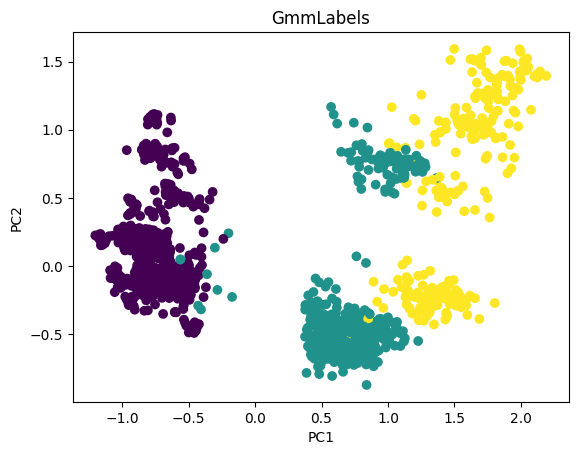

In [353]:
# Apply PCA
pca = PCA(n_components=2)
scaler = MinMaxScaler()
data_scaled_N = pd.DataFrame(scaler.fit_transform(data_with_labels), columns = data_with_labels.columns)

pca.fit(data_scaled_N)
pca_df = pd.DataFrame(pca.transform(data_scaled_N), columns=['PC1', 'PC2'])

# Plot the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=data_with_labels['GmmLabels'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GmmLabels')
plt.show()

C:\Users\dvmes\AppData\Local\Temp\ipykernel_5196\404400333.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

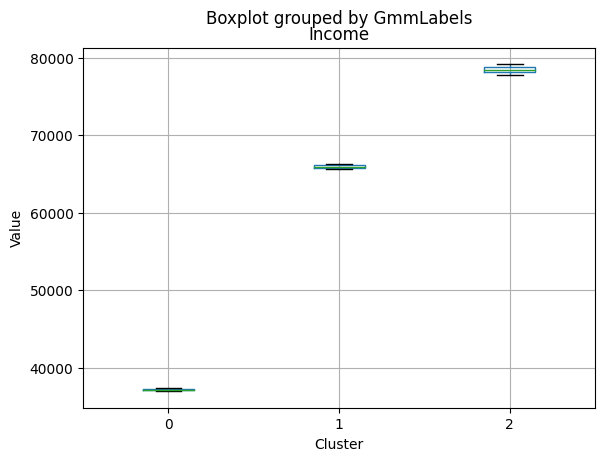

<Figure size 640x480 with 0 Axes>

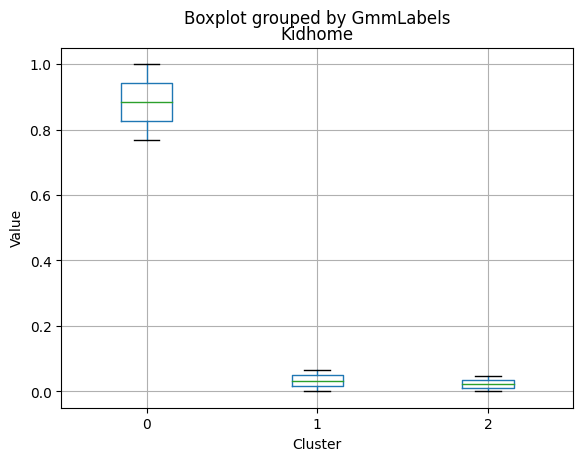

<Figure size 640x480 with 0 Axes>

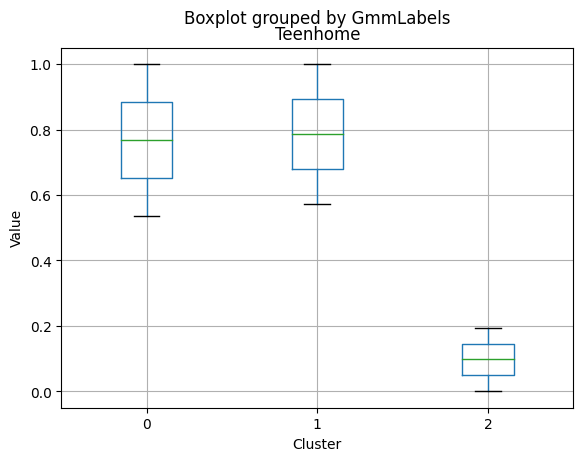

<Figure size 640x480 with 0 Axes>

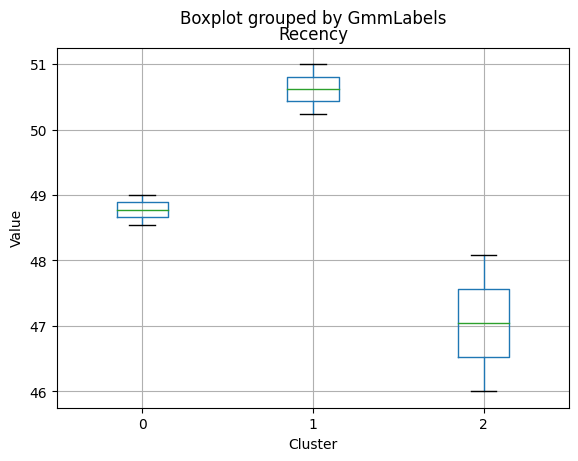

<Figure size 640x480 with 0 Axes>

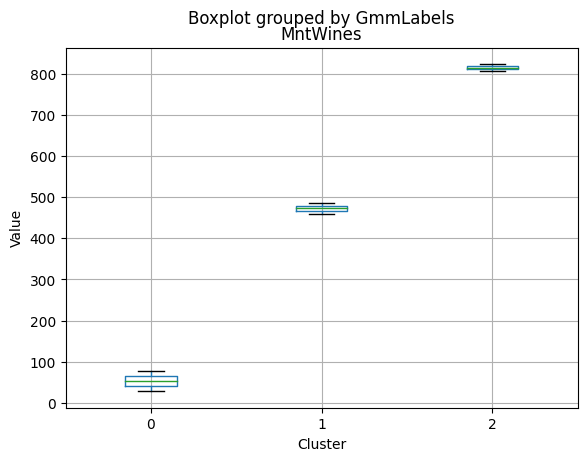

<Figure size 640x480 with 0 Axes>

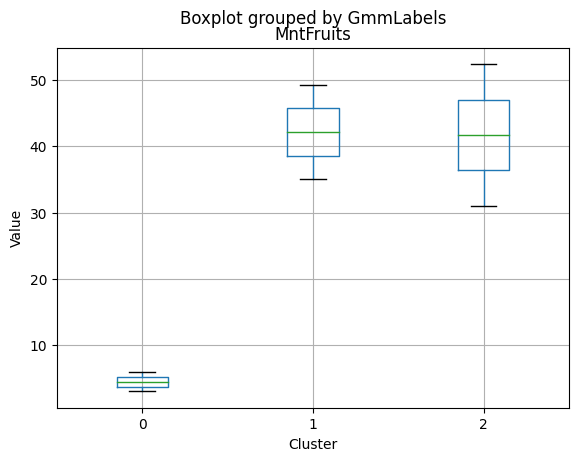

<Figure size 640x480 with 0 Axes>

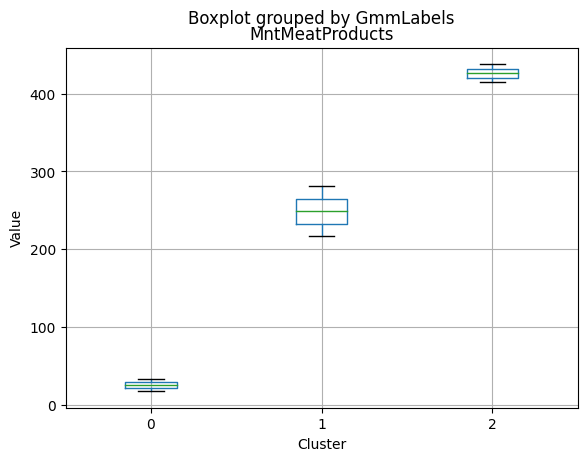

<Figure size 640x480 with 0 Axes>

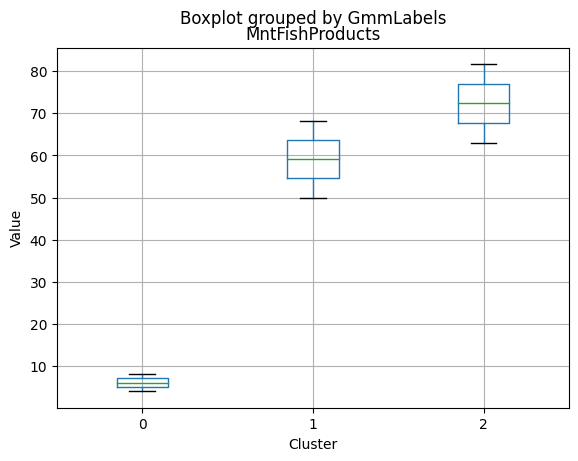

<Figure size 640x480 with 0 Axes>

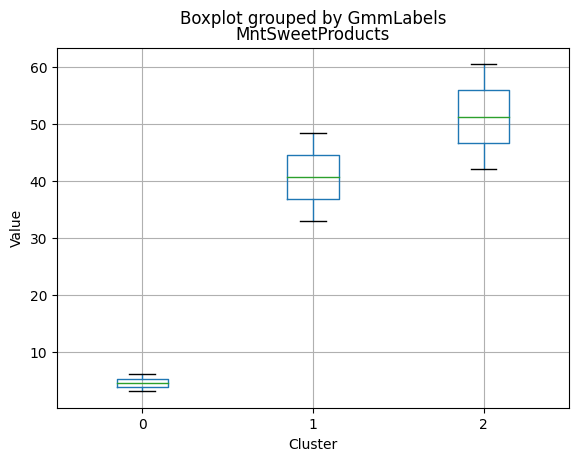

<Figure size 640x480 with 0 Axes>

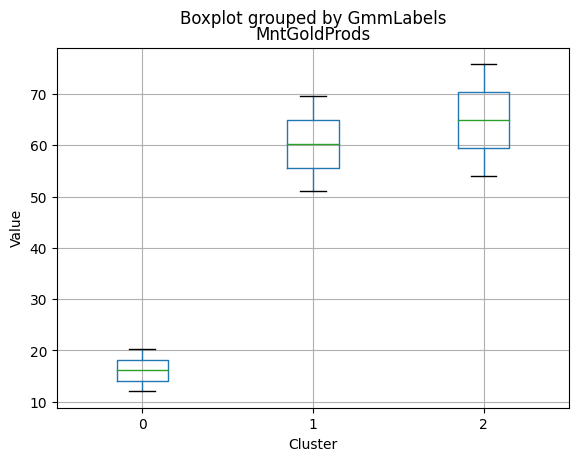

<Figure size 640x480 with 0 Axes>

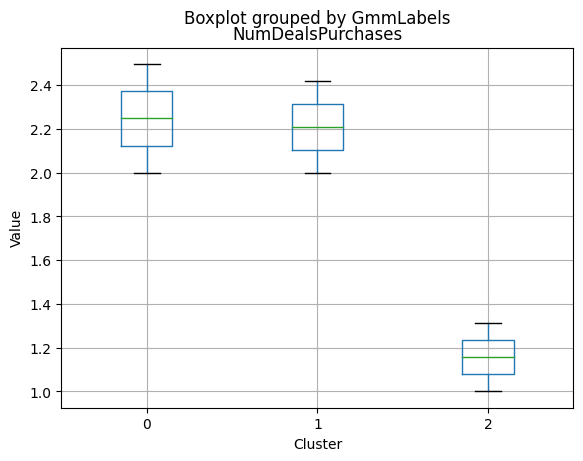

<Figure size 640x480 with 0 Axes>

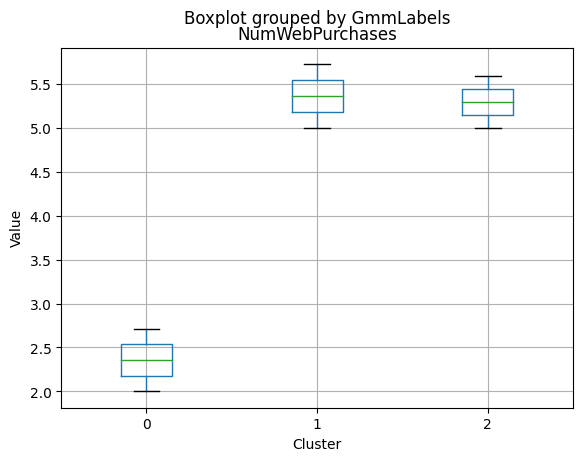

<Figure size 640x480 with 0 Axes>

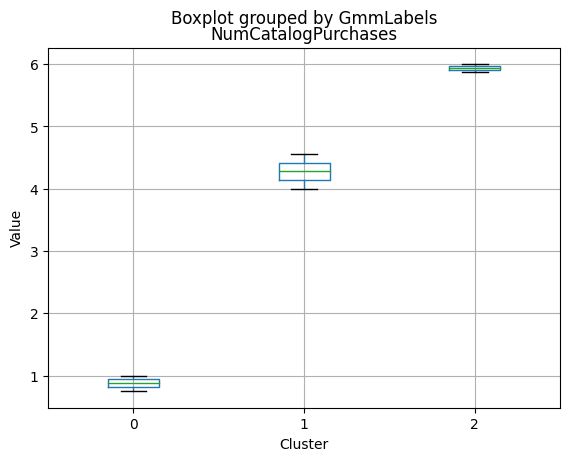

<Figure size 640x480 with 0 Axes>

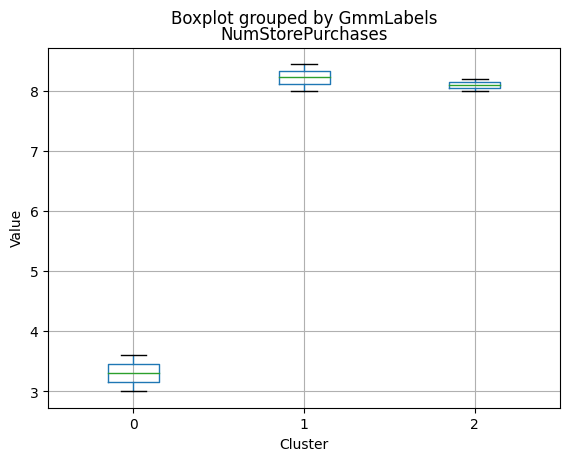

<Figure size 640x480 with 0 Axes>

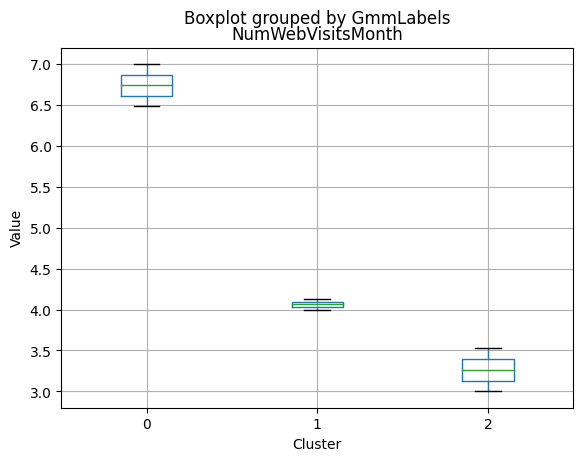

<Figure size 640x480 with 0 Axes>

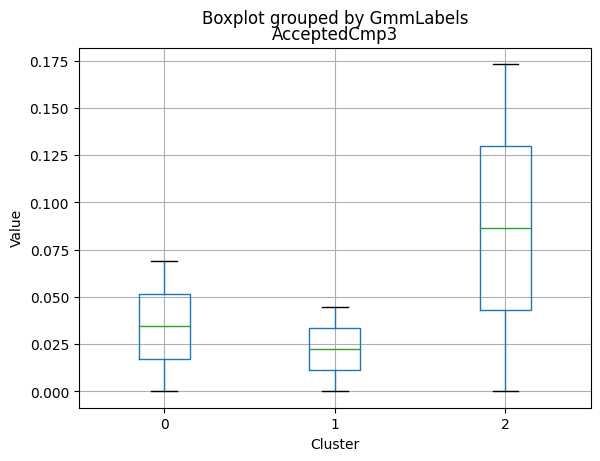

<Figure size 640x480 with 0 Axes>

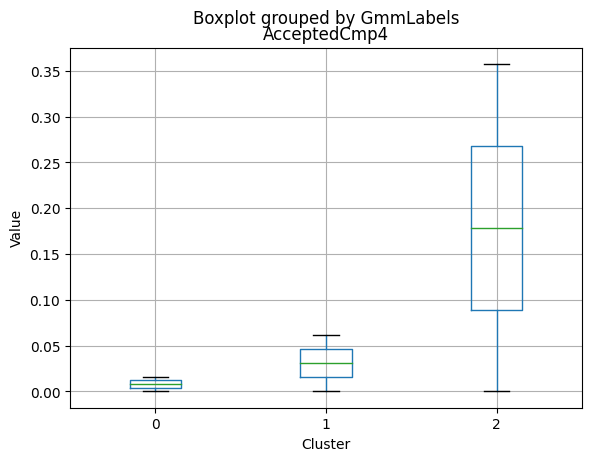

<Figure size 640x480 with 0 Axes>

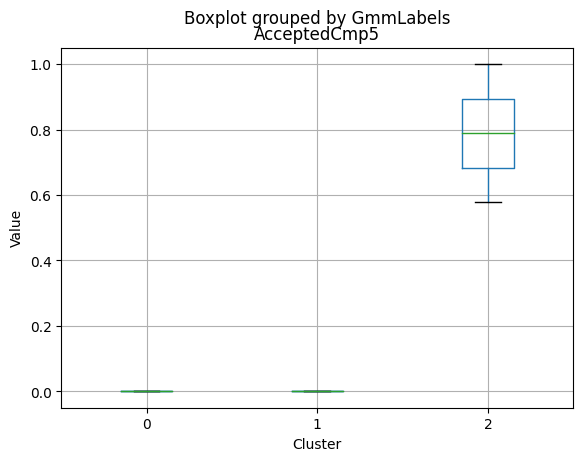

<Figure size 640x480 with 0 Axes>

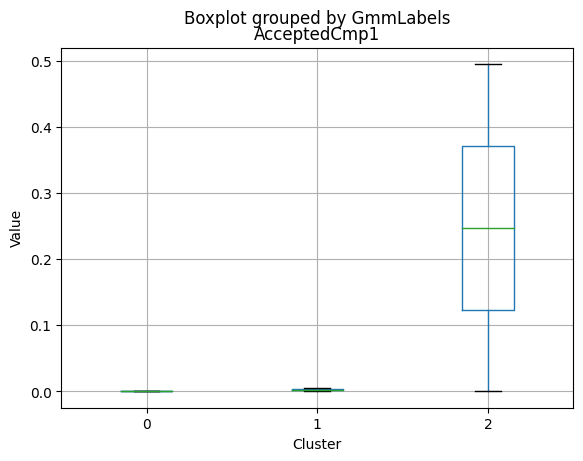

<Figure size 640x480 with 0 Axes>

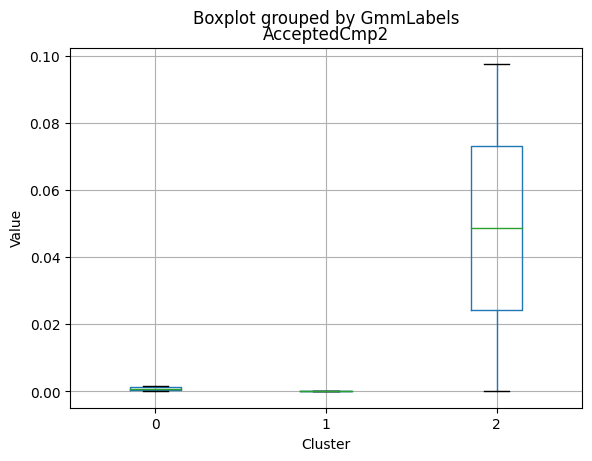

<Figure size 640x480 with 0 Axes>

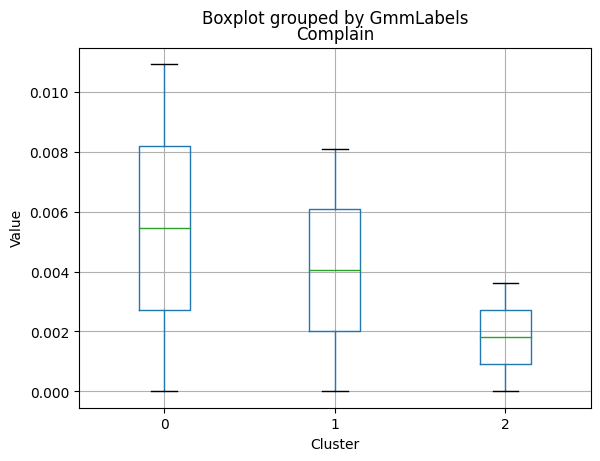

<Figure size 640x480 with 0 Axes>

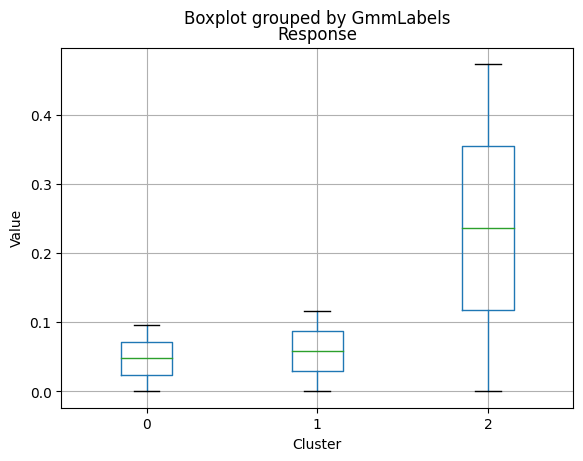

<Figure size 640x480 with 0 Axes>

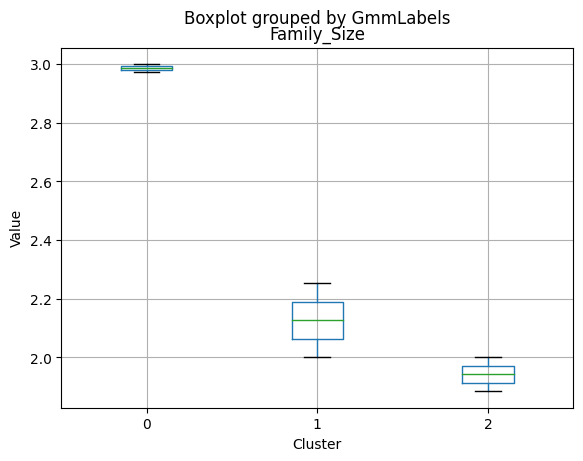

<Figure size 640x480 with 0 Axes>

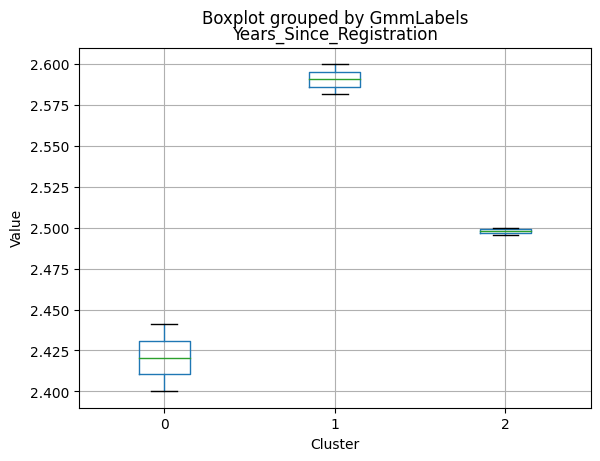

<Figure size 640x480 with 0 Axes>

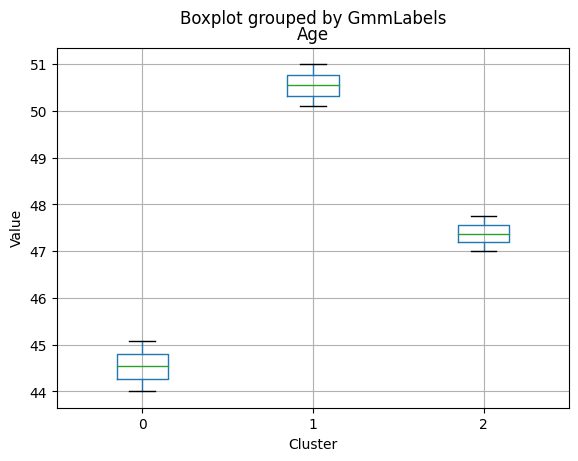

<Figure size 640x480 with 0 Axes>

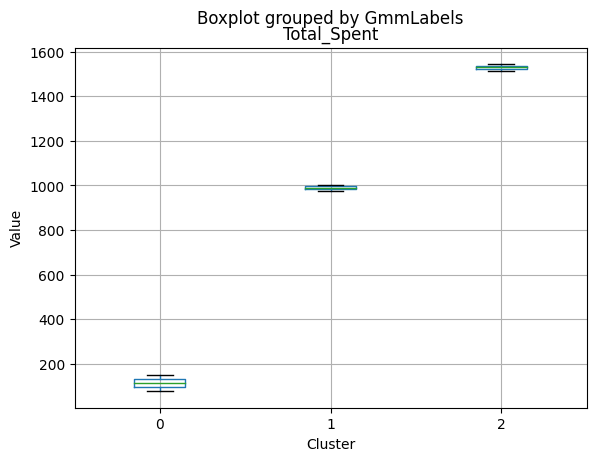

<Figure size 640x480 with 0 Axes>

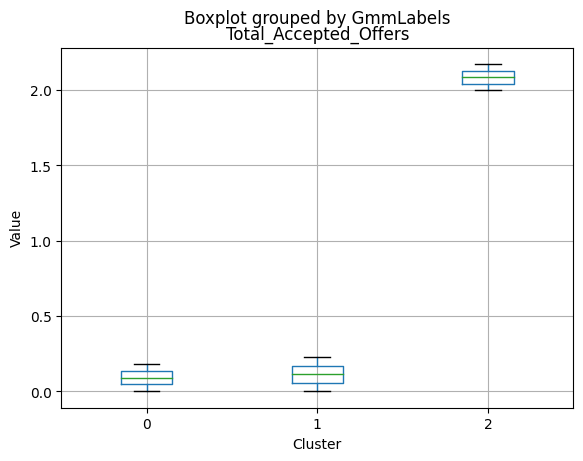

<Figure size 640x480 with 0 Axes>

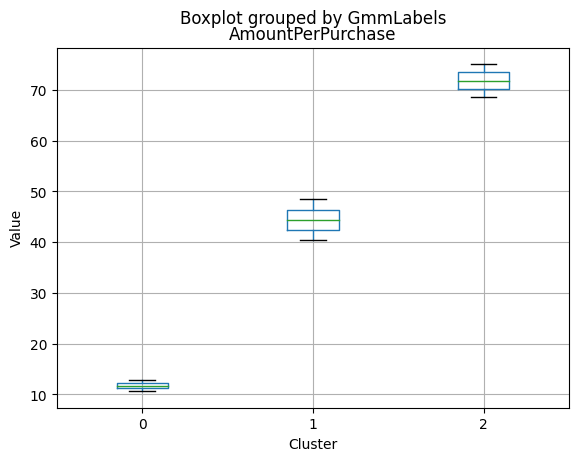

<Figure size 640x480 with 0 Axes>

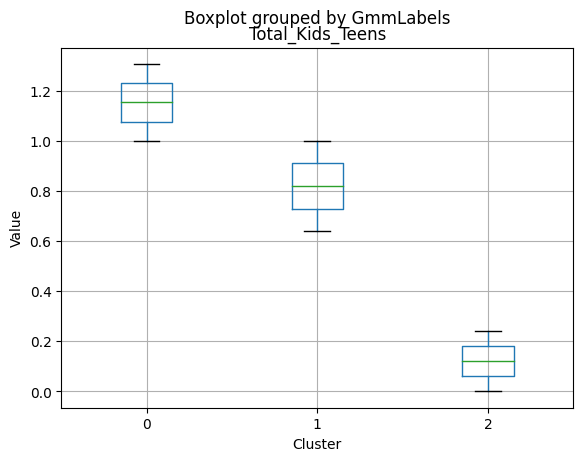

<Figure size 640x480 with 0 Axes>

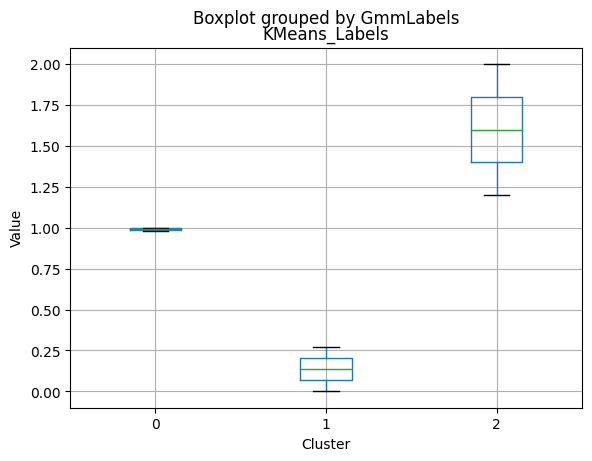

<Figure size 640x480 with 0 Axes>

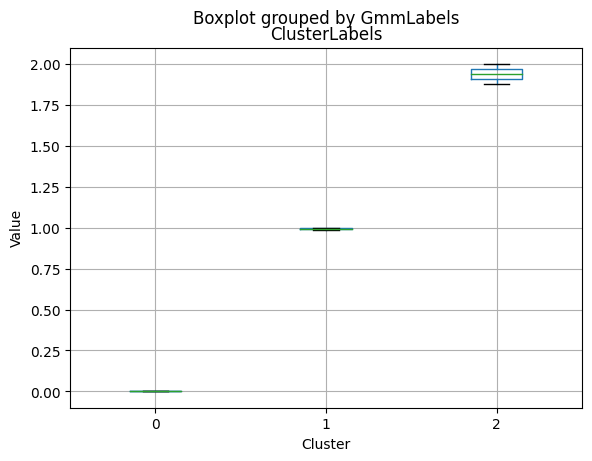

<Figure size 640x480 with 0 Axes>

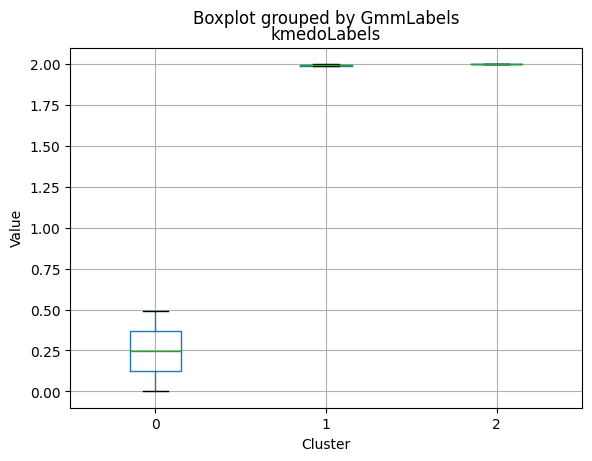

<Figure size 640x480 with 0 Axes>

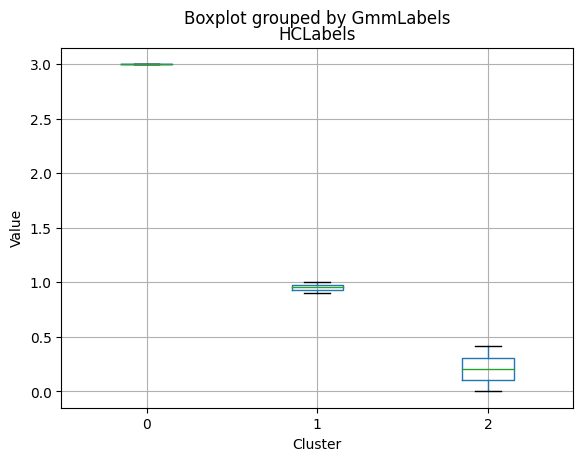

<Figure size 640x480 with 0 Axes>

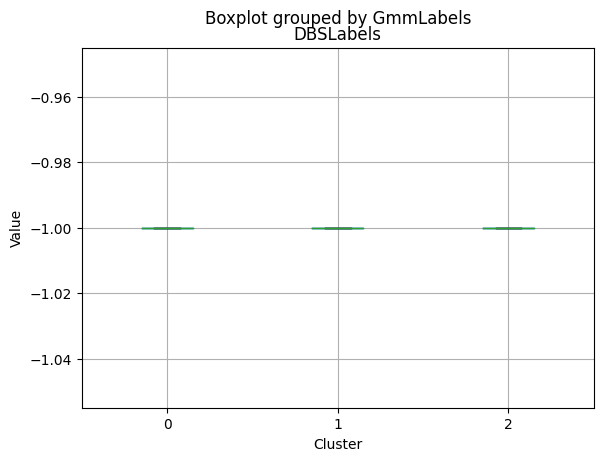

In [344]:
# For each variable
for col in df_kmeans.columns:
    #  Creating a boxplot chart for each cluster
    plt.figure()
    df_kmeans.boxplot(column=[col], by='GmmLabels')
    plt.title(col)
    plt.xlabel('Cluster')
    plt.ylabel('Value')

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

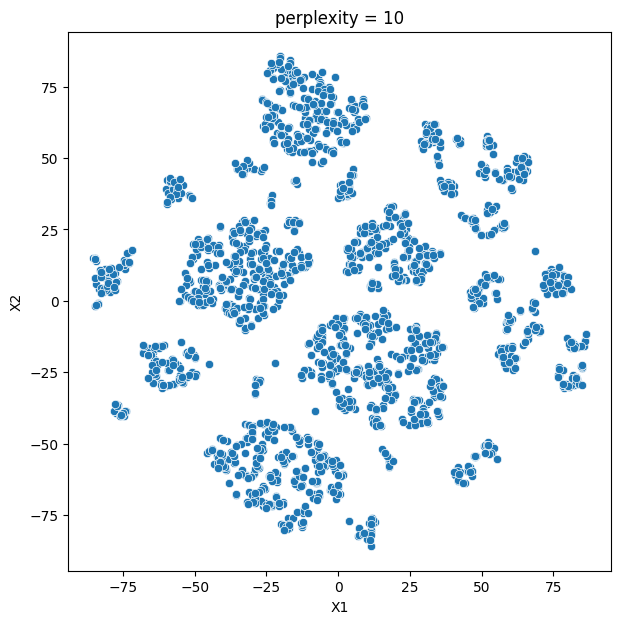

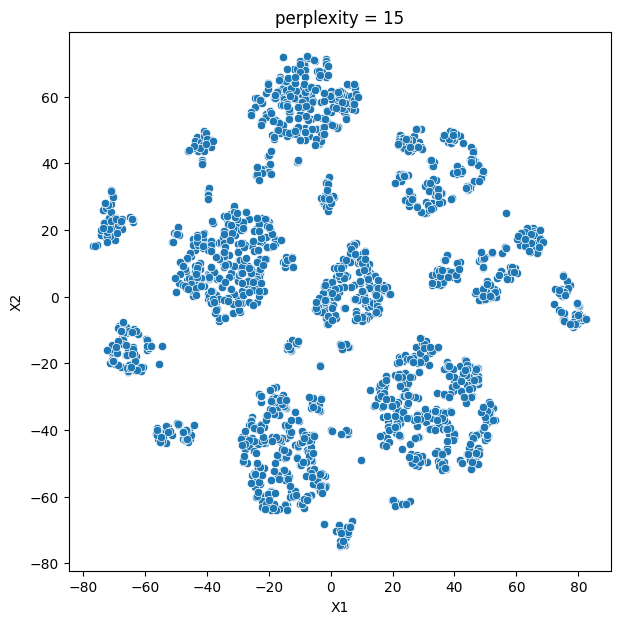

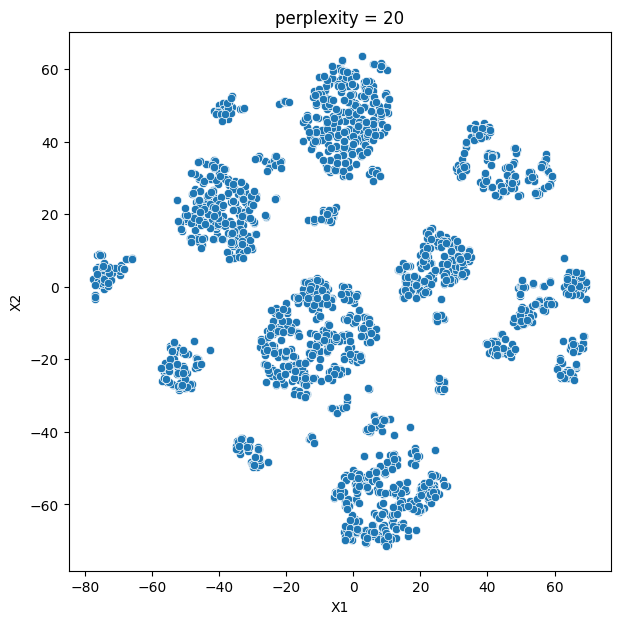

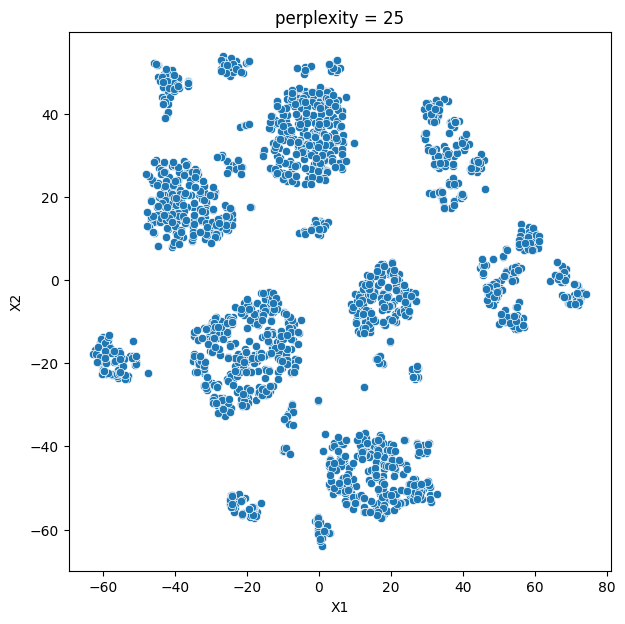

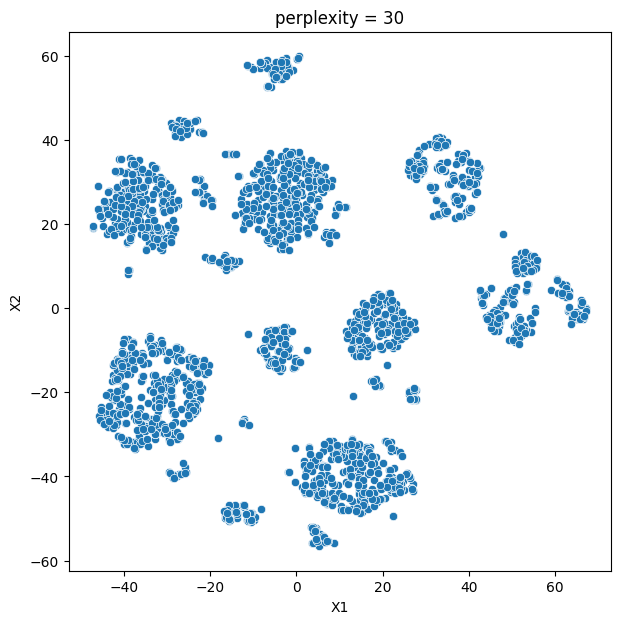

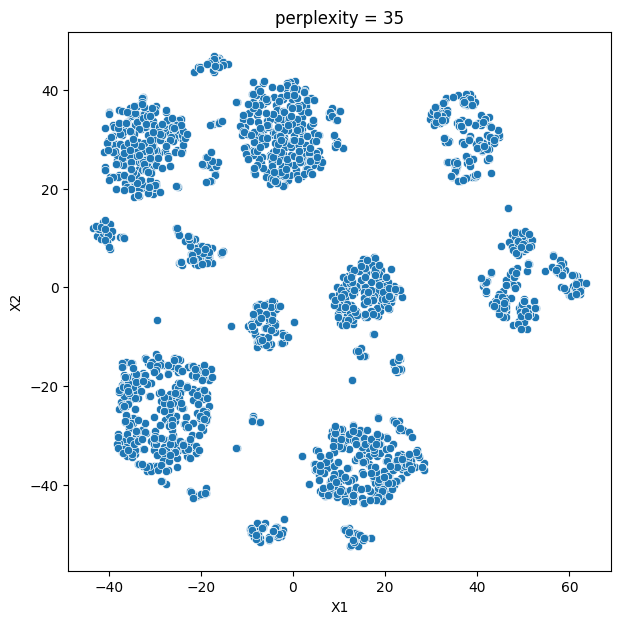

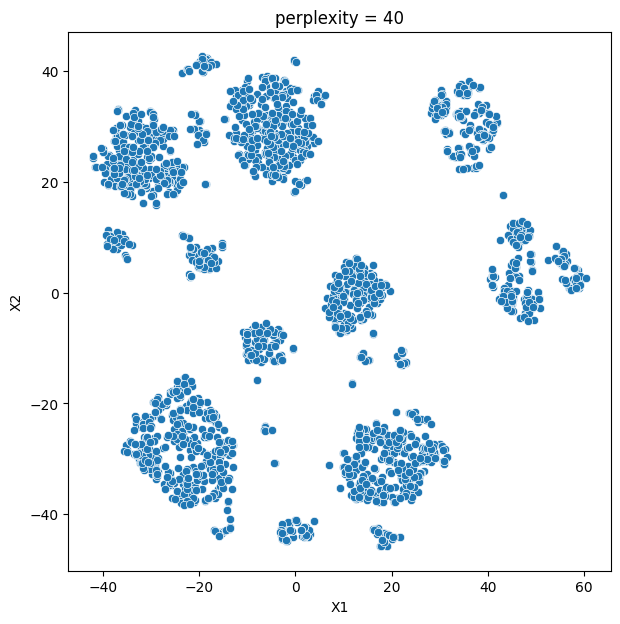

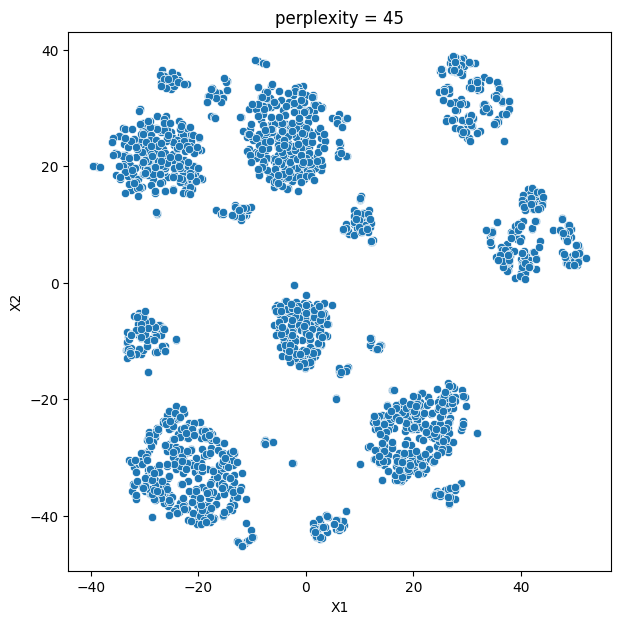

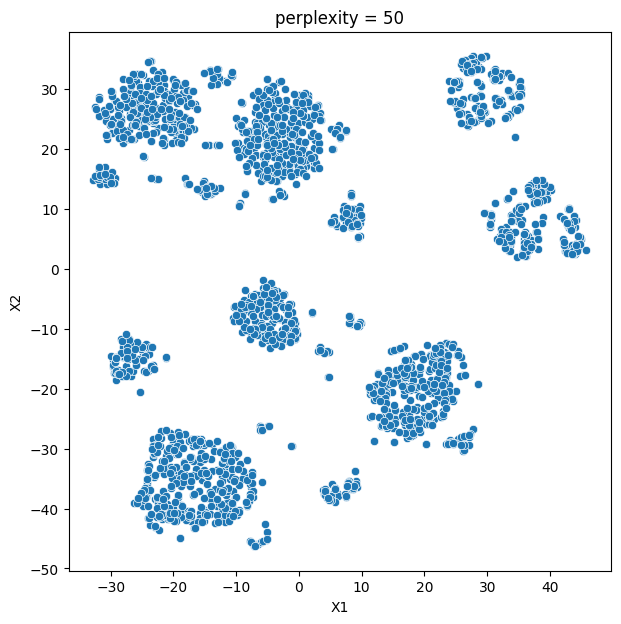

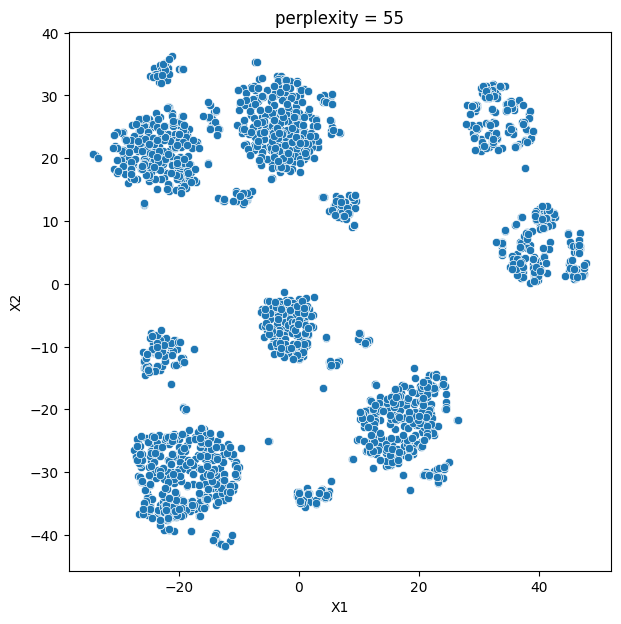

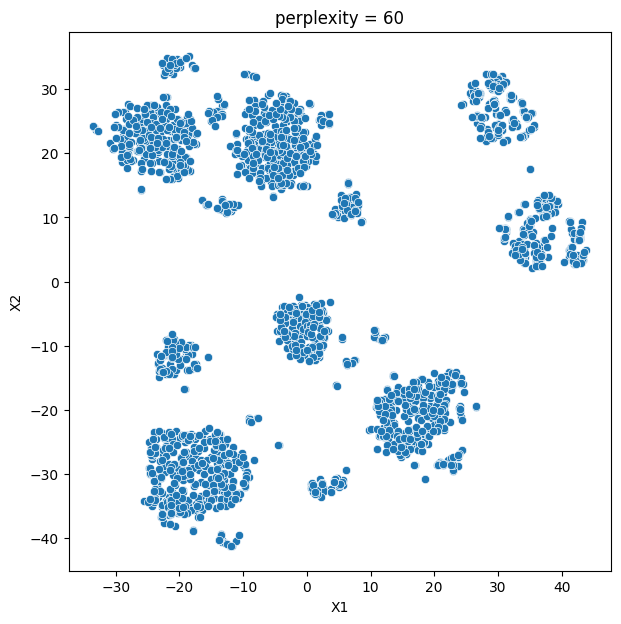

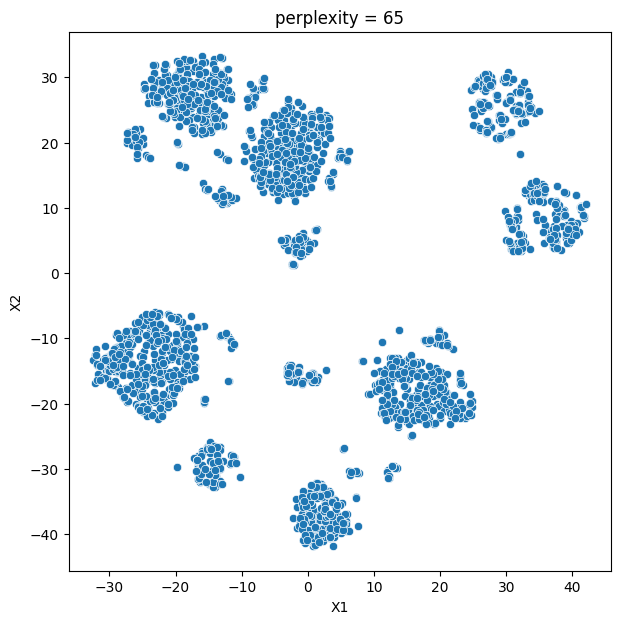

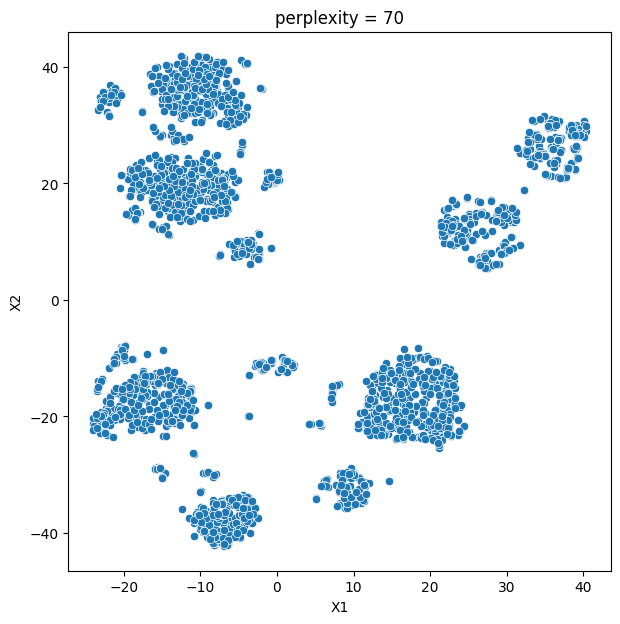

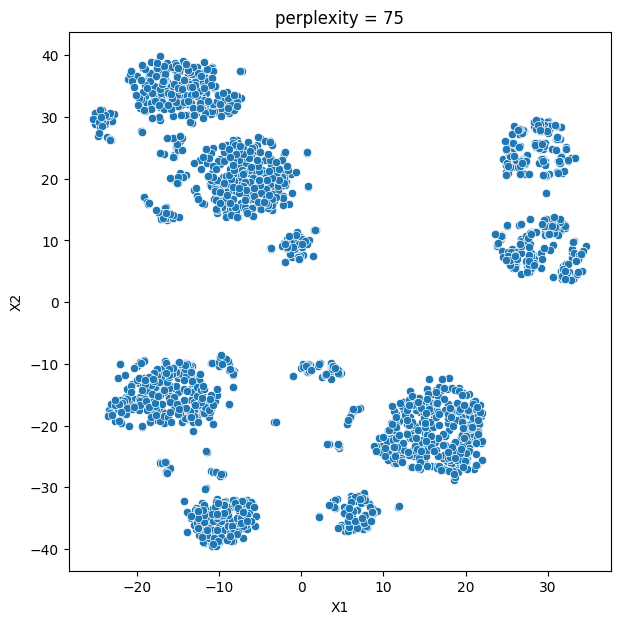

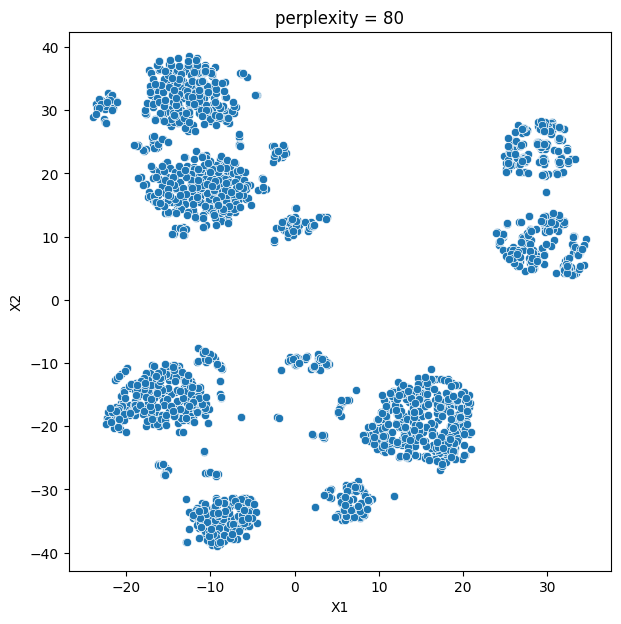

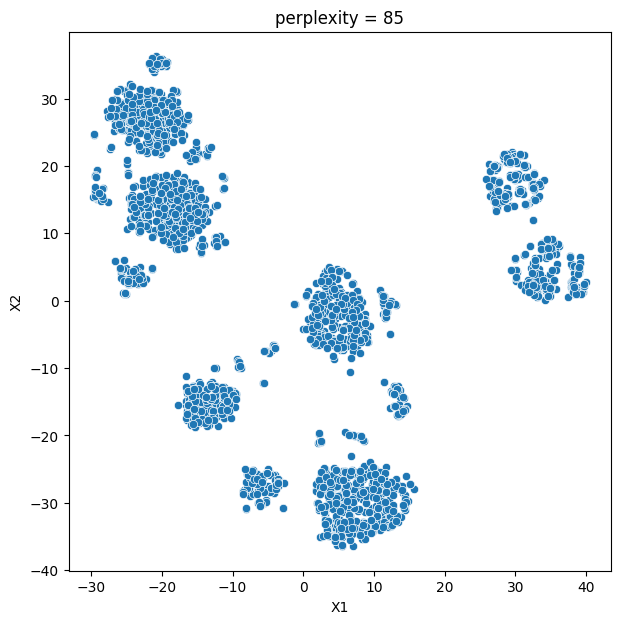

In [131]:
for i in range(10, 90, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(data_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)

    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7,7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))

In [156]:
# Add the cluster labels as a new column to the original dataset
data_with_labels = dataS.copy()
data_with_labels['ClusterLabels_TSNE'] = kmeans_labels

In [157]:
data_with_labels['ClusterLabels_TSNE'].value_counts()

2    1073
1     733
0     402
Name: ClusterLabels_TSNE, dtype: int64

In [135]:
# Calculating the mean and the median of the original data for each label
mean = data_with_labels.groupby('ClusterLabels_TSNE').mean()

median = data_with_labels.groupby('ClusterLabels_TSNE').median()

df_kmeans = pd.concat([mean, median], axis = 0)

#df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

ClusterLabels_TSNE                   0             1             2  \
Income                    63948.136816  66295.001364  37642.038211   
Kidhome                       0.293532      0.057299      0.761417   
Teenhome                      0.278607      0.566166      0.549860   
Recency                      39.728856     51.504775     50.880708   
MntWines                    566.721393    500.802183     73.654240   
MntFruits                    41.039801     48.435198      5.652377   
MntMeatProducts             324.651741    277.094134     32.735322   
MntFishProducts              56.907960     69.914052      8.141659   
MntSweetProducts             44.179104     48.705321      5.870457   
MntGoldProds                 62.343284     70.484311     18.588071   
NumDealsPurchases             2.124378      2.283765      2.423113   
NumWebPurchases               5.099502      5.612551      2.663560   
NumCatalogPurchases           4.480100      4.540246      0.712954   
NumStorePurchases             6.539801      8.618008      3.609506   
NumWebVisitsMonth             4.838308      4.075034      6.356011   
AcceptedCmp3                  0.213930      0.038199      0.045666   
AcceptedCmp4                  0.203980      0.088677      0.015843   
AcceptedCmp5                  0.393035      0.002729      0.000000   
AcceptedCmp1                  0.238806      0.055935      0.003728   
AcceptedCmp2                  0.054726      0.006821      0.001864   
Complain                      0.007463      0.009550      0.009320   
Response                      0.823383      0.000000      0.000000   
Family_Size                   2.116915      2.272851      2.994408   
Years_Since_Registration      2.671393      2.540246      2.398509   
Age                          46.977612     49.986357     45.164958   
Total_Spent                1095.843284   1015.435198    144.642125   
Total_Accepted_Offers         1.927861      0.192360      0.067102   
AmountPerPurchase            55.667561     49.459610     12.458372   
Total_Kids_Teens              0.572139      0.623465      1.311277   
KMeans_Labels                 1.251244      1.549795      1.381174   

ClusterLabels_TSNE                   0             1             2  
Income                    70947.500000  66825.000000  37085.000000  
Kidhome                       0.000000      0.000000      1.000000  
Teenhome                      0.000000      1.000000      1.000000  
Recency                      35.000000     54.000000     51.000000  
MntWines                    549.000000    466.000000     27.000000  
MntFruits                    23.000000     33.000000      3.000000  
MntMeatProducts             254.000000    216.000000     16.000000  
MntFishProducts              32.000000     50.000000      4.000000  
MntSweetProducts             25.500000     33.000000      3.000000  
MntGoldProds                 40.000000     53.000000     10.000000  
NumDealsPurchases             1.000000      2.000000      2.000000  
NumWebPurchases               5.000000      5.000000      2.000000  
NumCatalogPurchases           4.000000      4.000000      0.000000  
NumStorePurchases             6.000000      9.000000      3.000000  
NumWebVisitsMonth             5.000000      4.000000      7.000000  
AcceptedCmp3                  0.000000      0.000000      0.000000  
AcceptedCmp4                  0.000000      0.000000      0.000000  
AcceptedCmp5                  0.000000      0.000000      0.000000  
AcceptedCmp1                  0.000000      0.000000      0.000000  
AcceptedCmp2                  0.000000      0.000000      0.000000  
Complain                      0.000000      0.000000      0.000000  
Response                      1.000000      0.000000      0.000000  
Family_Size                   2.000000      2.000000      3.000000  
Years_Since_Registration      2.800000      2.600000      2.400000  
Age                          46.000000     51.000000     44.000000  
Total_Spent                1213.000

**The t-SNE clustering result shows that the customers can be grouped into three distinct clusters based on their purchasing behavior, demographic characteristics, and response to marketing campaigns. The first cluster, labeled as 0, has the highest average income, the highest amount spent on purchases, and the highest number of accepted marketing campaigns. They are mostly middle-aged, with relatively small families, and have made a significant number of purchases from the store and through the website. The second cluster, labeled as 1, has a lower average income and a lower amount spent on purchases compared to the first cluster. They have a moderate number of accepted marketing campaigns and tend to have more teenage children. The third cluster, labeled as 2, has the lowest average income, the lowest amount spent on purchases, and the lowest number of accepted marketing campaigns. They tend to have more kids and teens in their families and are less likely to make purchases through the website.**


C:\Users\dvmes\AppData\Local\Temp\ipykernel_5196\3974133964.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

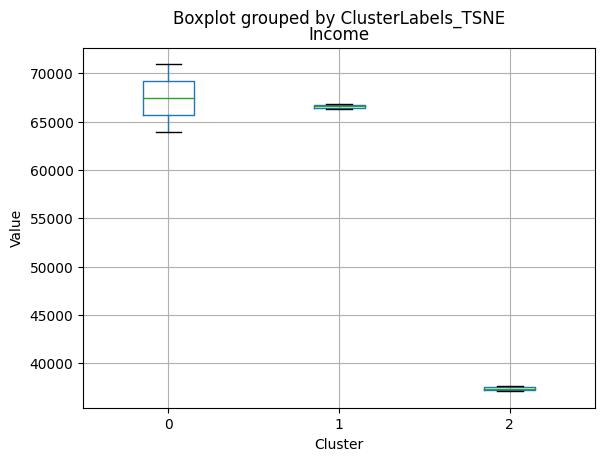

<Figure size 640x480 with 0 Axes>

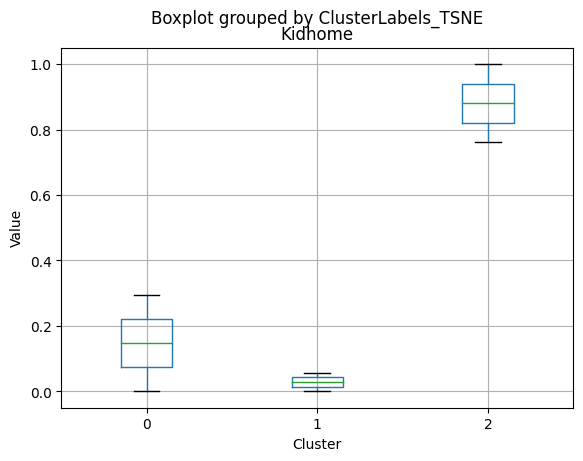

<Figure size 640x480 with 0 Axes>

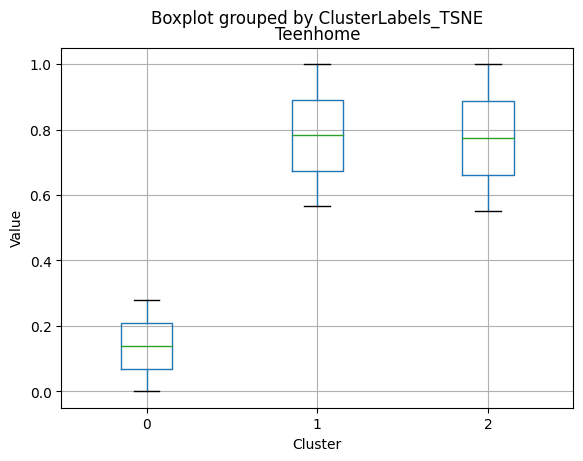

<Figure size 640x480 with 0 Axes>

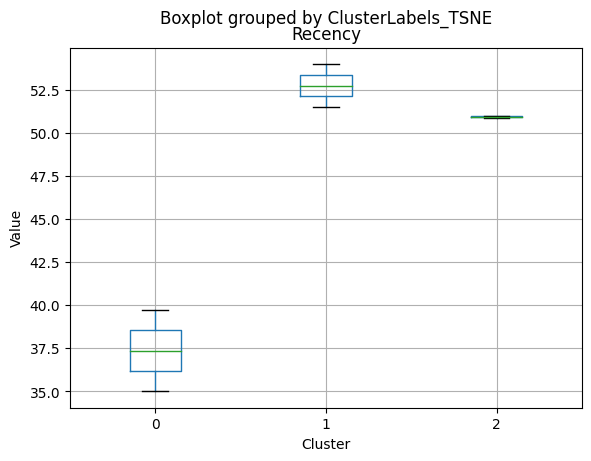

<Figure size 640x480 with 0 Axes>

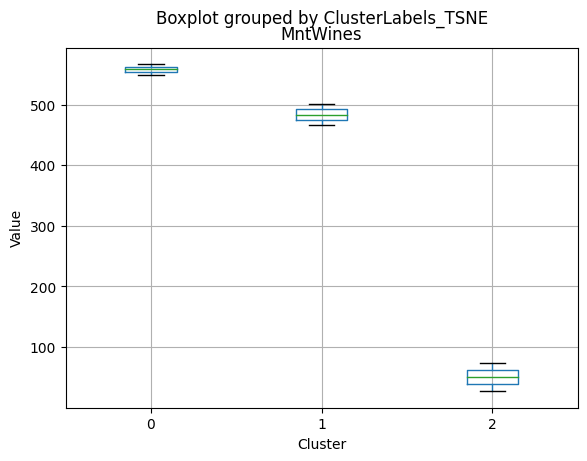

<Figure size 640x480 with 0 Axes>

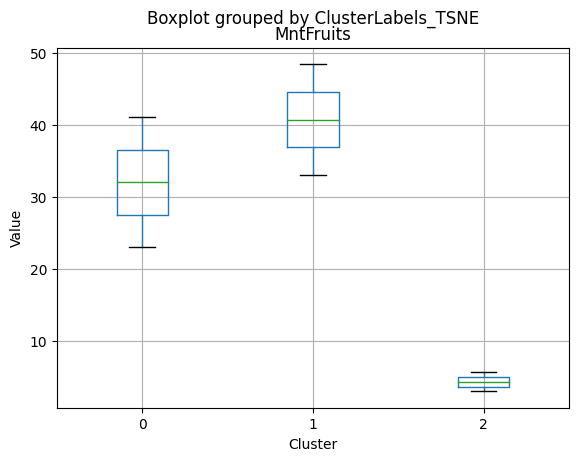

<Figure size 640x480 with 0 Axes>

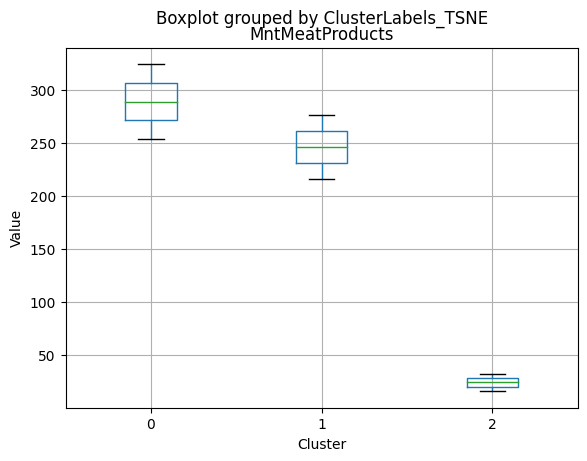

<Figure size 640x480 with 0 Axes>

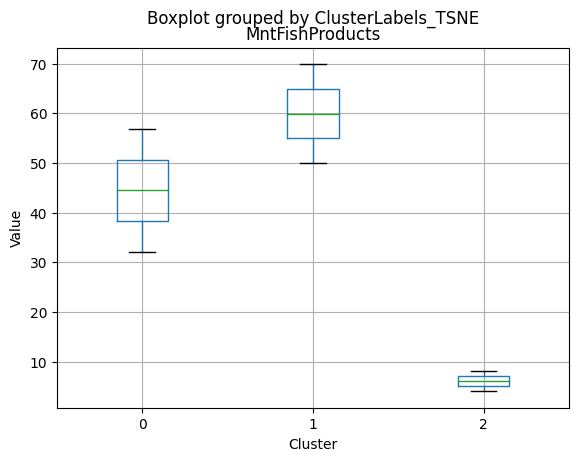

<Figure size 640x480 with 0 Axes>

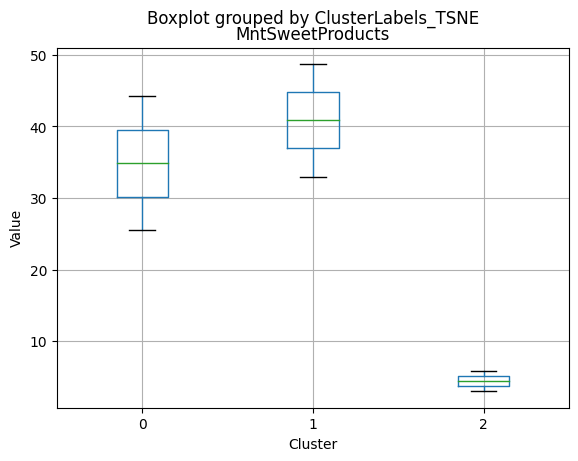

<Figure size 640x480 with 0 Axes>

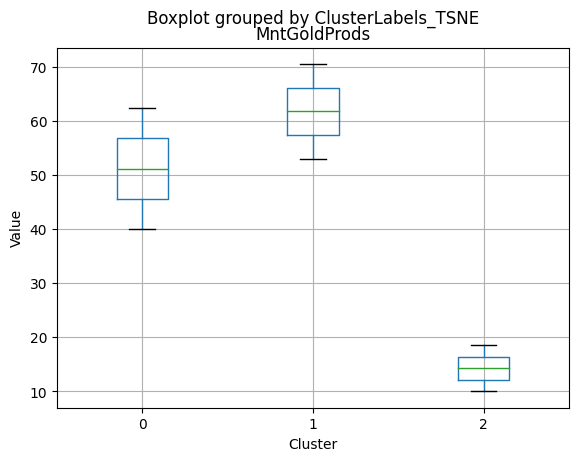

<Figure size 640x480 with 0 Axes>

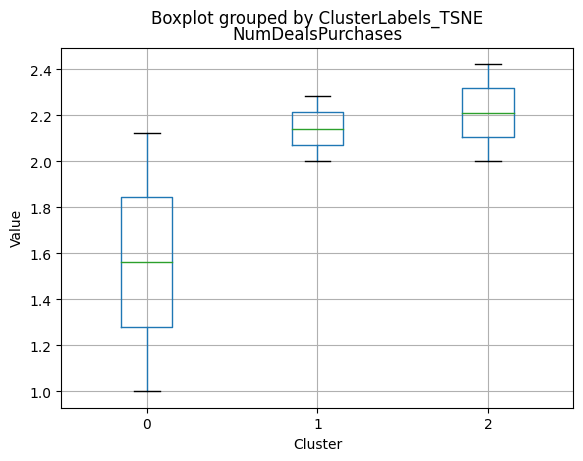

<Figure size 640x480 with 0 Axes>

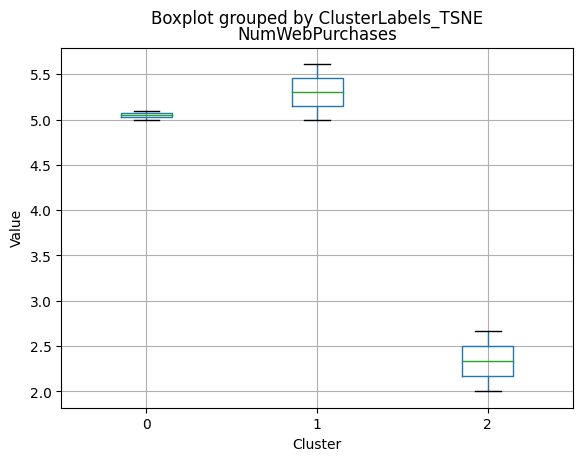

<Figure size 640x480 with 0 Axes>

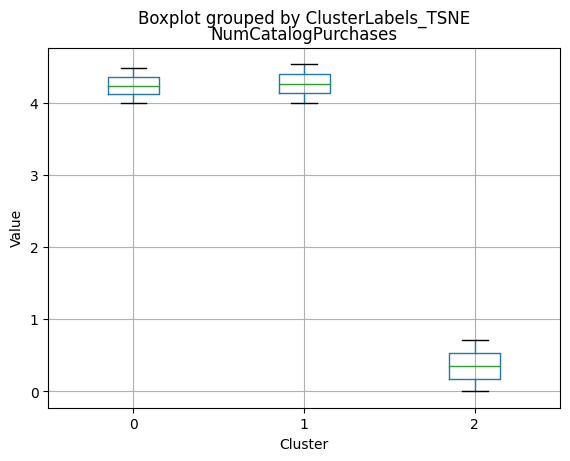

<Figure size 640x480 with 0 Axes>

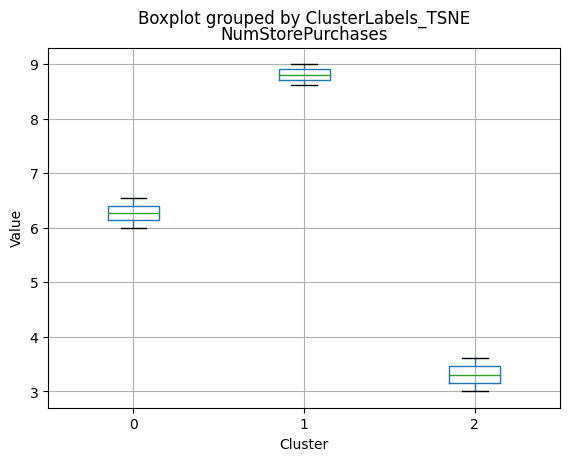

<Figure size 640x480 with 0 Axes>

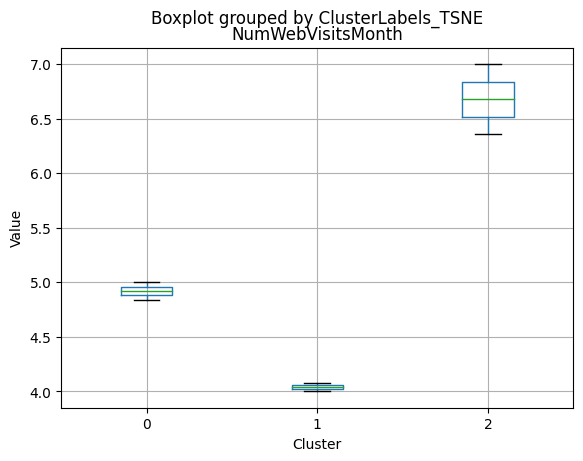

<Figure size 640x480 with 0 Axes>

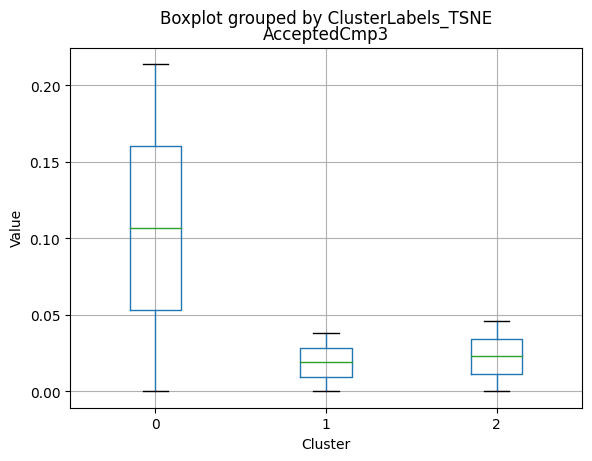

<Figure size 640x480 with 0 Axes>

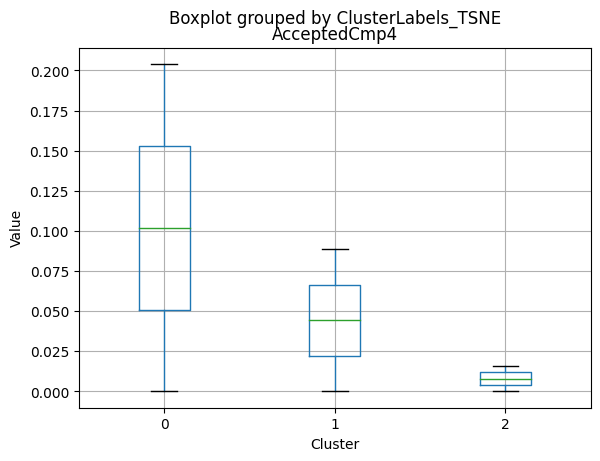

<Figure size 640x480 with 0 Axes>

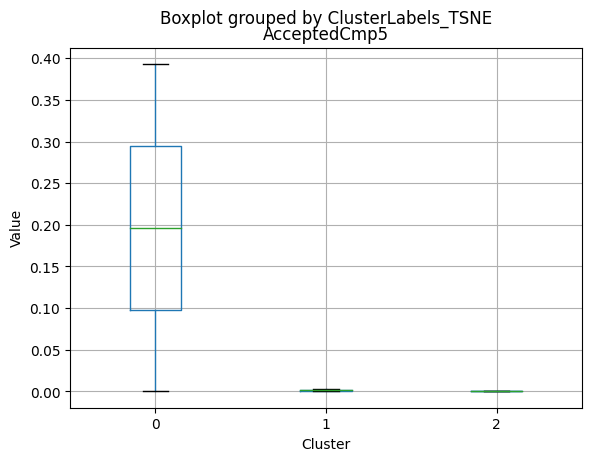

<Figure size 640x480 with 0 Axes>

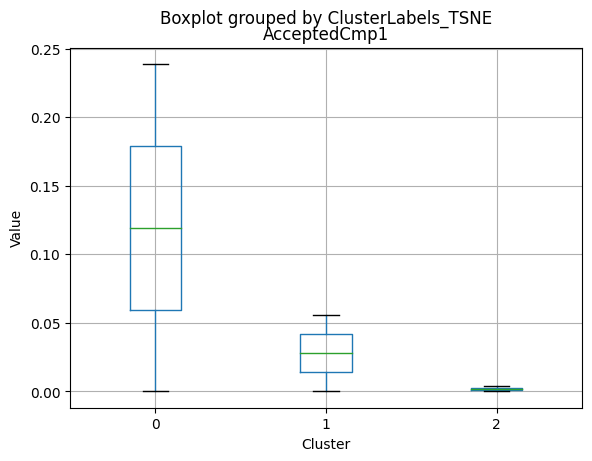

<Figure size 640x480 with 0 Axes>

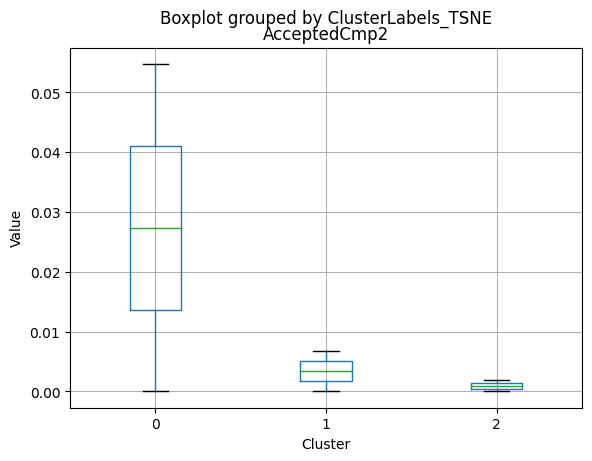

<Figure size 640x480 with 0 Axes>

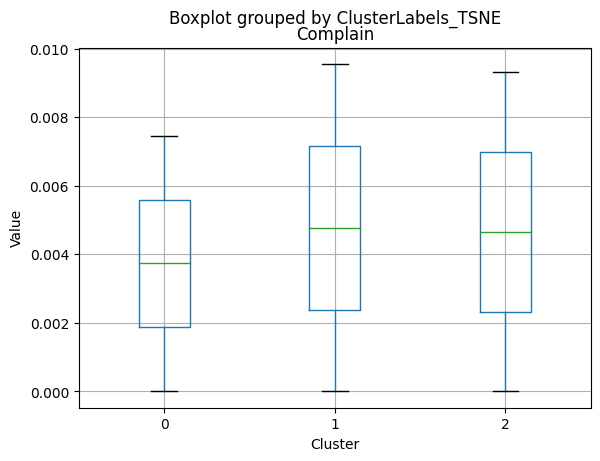

<Figure size 640x480 with 0 Axes>

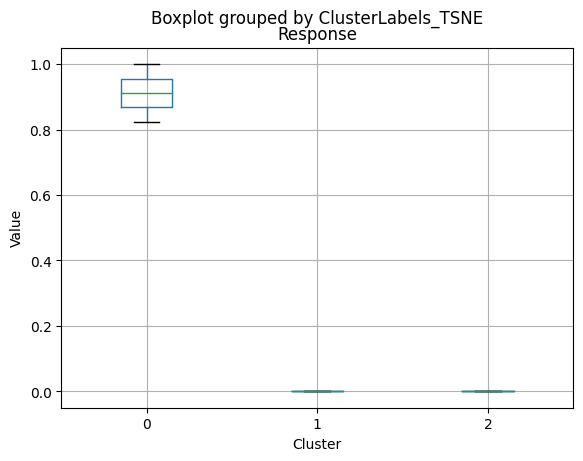

<Figure size 640x480 with 0 Axes>

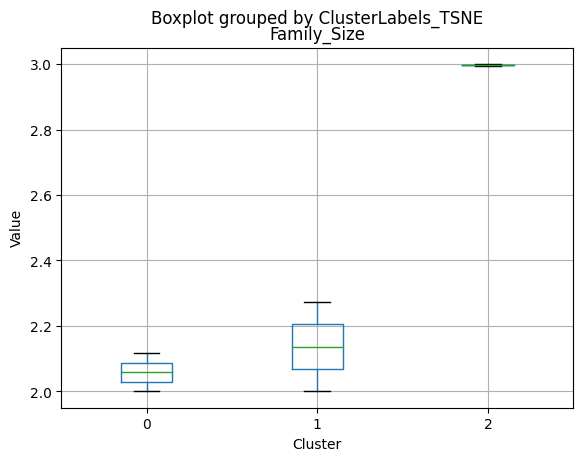

<Figure size 640x480 with 0 Axes>

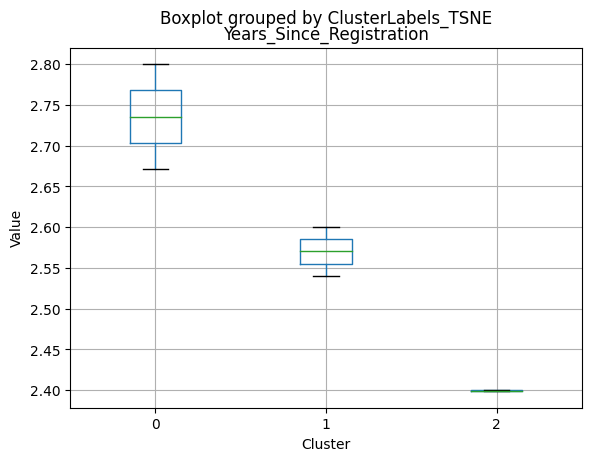

<Figure size 640x480 with 0 Axes>

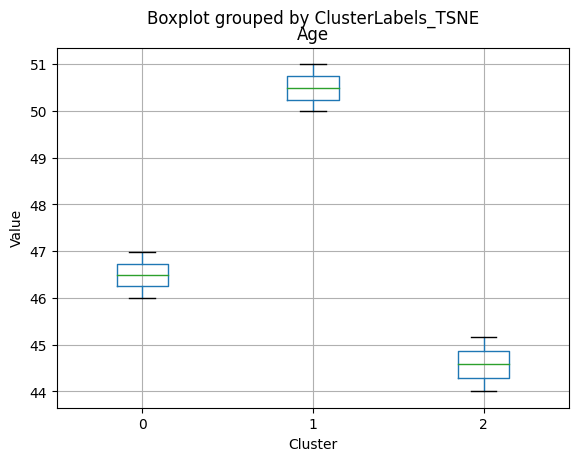

<Figure size 640x480 with 0 Axes>

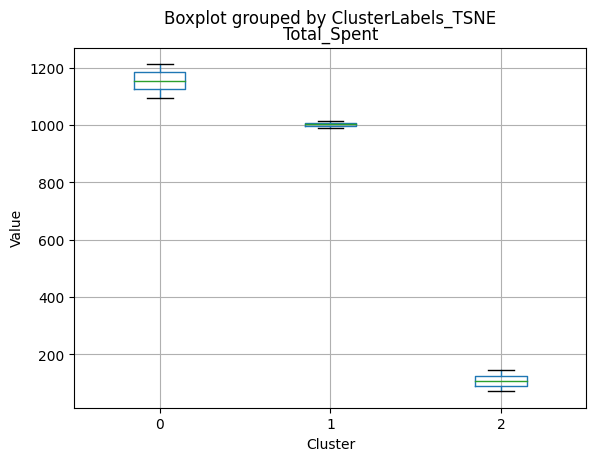

<Figure size 640x480 with 0 Axes>

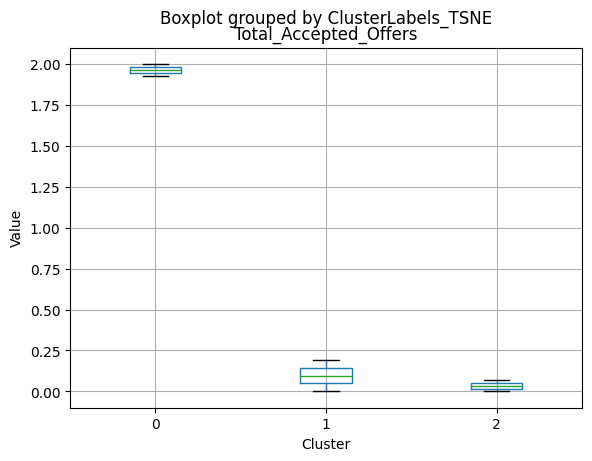

<Figure size 640x480 with 0 Axes>

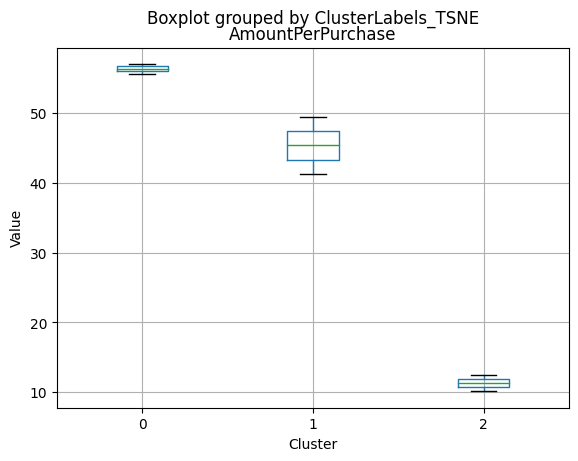

<Figure size 640x480 with 0 Axes>

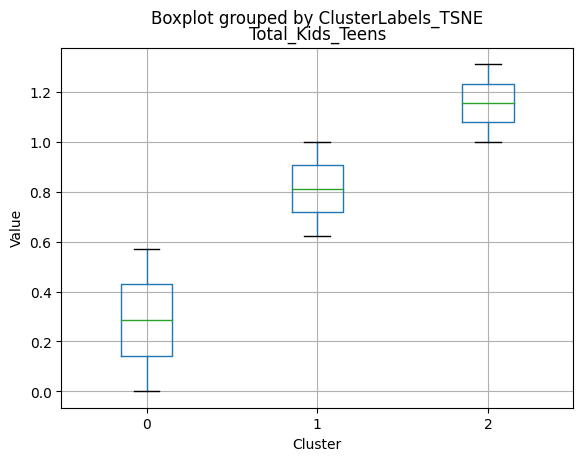

<Figure size 640x480 with 0 Axes>

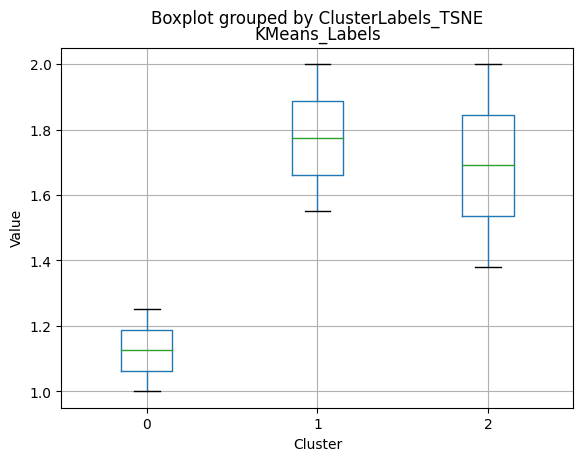

In [136]:
# Для каждой переменной
for col in df_kmeans.columns:
    # Создание графика boxplot для каждого кластера
    plt.figure()
    df_kmeans.boxplot(column=[col], by='ClusterLabels_TSNE')
    plt.title(col)
    plt.xlabel('Cluster')
    plt.ylabel('Value')

## **Conclusion and Recommendations**

#### t-SNE:
- **Cluster 0: Higher income, less kids and teens at home, higher spending on various products, and more accepted offers.**
- **Cluster 1: Slightly lower income than cluster 0, more teens at home, and lower spending on products.**
- **Cluster 2: Lowest income, more kids at home, lowest spending on products, and the least number of accepted offers.**

#### K-means:
- **Cluster 0: Similar to t-SNE's cluster 0, high-income customers with fewer kids and teens, higher spending on products, and a higher number of accepted offers.**
- **Cluster 1: Similar to t-SNE's cluster 1, moderately high-income customers with more teens at home and lower spending on products.**
- **Cluster 2: Similar to t-SNE's cluster 2, low-income customers with more kids at home, the lowest spending on products, and the least number of accepted offers.**

#### K-medoids:
- **Cluster 0: High income, no kids or teens at home, high spending on products, and more accepted offers.**
- **Cluster 1: Moderate income, no kids but one teen at home, lower spending on products, and fewer accepted offers.**
- **Cluster 2: Low income, one kid and one teen at home, the lowest spending on products, and the least number of accepted offers.**

#### GMM:
- **Cluster 0: Similar to K-medoids' cluster 0, high-income customers with no kids or teens, high spending on products, and more accepted offers.**
- **Cluster 1: Similar to K-medoids' cluster 1, moderate-income customers with one teen at home and lower spending on products.**
- **Cluster 2: Similar to K-medoids' cluster 2, low-income customers with one kid and one teen at home, the lowest spending on products, and the least number of accepted offers.**

**Based on the comparison, we can observe that the clusters derived from each method have similar characteristics. K-means and t-SNE produce almost identical cluster profiles, while K-medoids and GMM generate clusters with slightly different family structures. However, the general trend among all methods is that they divide customers into three segments:**

- **High-income customers with fewer kids and teens, high spending on products, and more accepted offers.**
- **Moderate-income customers with more teens at home and lower spending on products.**
- **Low-income customers with more kids at home, the lowest spending on products, and the least number of accepted offers.**
- **The choice of the best method for this dataset would depend on the specific goals of the analysis and the preference for the characteristics of the resulting clusters. Overall, K-means and t-SNE provide very similar results, while K-medoids and GMM might offer a more nuanced view of the customers' family structures.**